In [24]:
import gym
from gym import spaces
import numpy as np
import random
from enum import IntEnum

class Action(IntEnum):
    LEFT = 0
    DOWN = 1
    RIGHT = 2
    UP = 3

def actions_to_dxdy(action: Action) -> Tuple[int, int]:
    mapping = {
        Action.LEFT: (-1, 0),
        Action.DOWN: (0, -1),
        Action.RIGHT: (1, 0),
        Action.UP: (0, 1),
    }
    return mapping[action]

class WarehouseEnvironmentA(gym.Env):
    def __init__(self, size: int = 10, num_boxes: int = 5, max_steps: int = 100):
        super(WarehouseEnvironmentA, self).__init__()
        self.size = size
        self.num_boxes = num_boxes
        self.max_steps = max_steps
        self.walls = [
            (0, 5),
            (2, 5),
            (3, 5),
            (4, 5),
            (5, 0),
            (5, 2),
            (5, 3),
            (5, 4),
            (5, 5),
            (5, 6),
            (5, 7),
            (5, 9),
            (5, 10),
            (6, 4),
            (7, 4),
            (9, 4),
            (10, 4),
         ]
        self.size = size
        self.num_boxes = num_boxes
        self.reset()
        self.action_space = spaces.Discrete(len(Action))
        self.observation_space = spaces.Box(low=0, high=2, shape=(size, size), dtype=np.int32)

    def reset(self):
        self.robot_position = (0, 0)
        self.boxes = self._generate_boxes()
        self.current_step = 0  # Initialize the step counter here
        return self._get_state()
    
    def _generate_boxes(self) -> List[Tuple[int, int]]:
        boxes = []
        while len(boxes) < self.num_boxes:
            box_position = (random.randint(0, self.size - 1), random.randint(0, self.size - 1))
            if box_position not in boxes and box_position != self.robot_position and box_position not in self.walls:
                boxes.append(box_position)
        return boxes

    def step(self, action: Action):
        dx, dy = actions_to_dxdy(action)
        new_x = max(0, min(self.robot_position[0] + dx, self.size - 1))
        new_y = max(0, min(self.robot_position[1] + dy, self.size - 1))
        new_position = (new_x, new_y)

        # Check if the new position is a wall
        if new_position in self.walls:
            return self._get_state(), 0, False, {}  # No reward, not done, and empty info

        self.robot_position = new_position

        reward = 0
        if self.robot_position in self.boxes:
            self.boxes.remove(self.robot_position)
            reward = 1  # Reward for picking up a box

        self.current_step += 1
        done = len(self.boxes) == 0 or self.current_step >= self.max_steps
        info = {}  # Additional information; can be empty if not used
        return self._get_state(), reward, done, info



    def _get_state(self):
        state = np.zeros((self.size, self.size))
        x, y = self.robot_position
        state[x, y] = 1  # Robot position
        for bx, by in self.boxes:
            state[bx, by] = 2  # Box position
        return state

Early termination at Episode 1
Episode: 1, Total Reward: 4
Debug: Episode 1, Step 200, Total Reward: 4
Early termination at Episode 2
Episode: 2, Total Reward: 3
Early termination at Episode 3
Episode: 3, Total Reward: 6
Early termination at Episode 4
Episode: 4, Total Reward: 5
Early termination at Episode 5
Episode: 5, Total Reward: 3
Early termination at Episode 6
Episode: 6, Total Reward: 0
Early termination at Episode 7
Episode: 7, Total Reward: 7
Early termination at Episode 8
Episode: 8, Total Reward: 3
Early termination at Episode 9
Episode: 9, Total Reward: 5
Early termination at Episode 10
Episode: 10, Total Reward: 2
Early termination at Episode 11
Episode: 11, Total Reward: 3
Debug: Episode 11, Step 200, Total Reward: 3
Early termination at Episode 12
Episode: 12, Total Reward: 1
Early termination at Episode 13
Episode: 13, Total Reward: 3
Early termination at Episode 14
Episode: 14, Total Reward: 3
Early termination at Episode 15
Episode: 15, Total Reward: 3
Early terminat

Early termination at Episode 126
Episode: 126, Total Reward: 4
Early termination at Episode 127
Episode: 127, Total Reward: 2
Early termination at Episode 128
Episode: 128, Total Reward: 2
Early termination at Episode 129
Episode: 129, Total Reward: 3
Early termination at Episode 130
Episode: 130, Total Reward: 0
Early termination at Episode 131
Episode: 131, Total Reward: 0
Debug: Episode 131, Step 200, Total Reward: 0
Early termination at Episode 132
Episode: 132, Total Reward: 1
Early termination at Episode 133
Episode: 133, Total Reward: 0
Early termination at Episode 134
Episode: 134, Total Reward: 0
Early termination at Episode 135
Episode: 135, Total Reward: 1
Early termination at Episode 136
Episode: 136, Total Reward: 0
Early termination at Episode 137
Episode: 137, Total Reward: 1
Early termination at Episode 138
Episode: 138, Total Reward: 1
Early termination at Episode 139
Episode: 139, Total Reward: 1
Early termination at Episode 140
Episode: 140, Total Reward: 2
Early ter

Early termination at Episode 248
Episode: 248, Total Reward: 0
Early termination at Episode 249
Episode: 249, Total Reward: 0
Early termination at Episode 250
Episode: 250, Total Reward: 1
Early termination at Episode 251
Episode: 251, Total Reward: 1
Debug: Episode 251, Step 200, Total Reward: 1
Early termination at Episode 252
Episode: 252, Total Reward: 1
Early termination at Episode 253
Episode: 253, Total Reward: 3
Early termination at Episode 254
Episode: 254, Total Reward: 0
Early termination at Episode 255
Episode: 255, Total Reward: 1
Early termination at Episode 256
Episode: 256, Total Reward: 0
Early termination at Episode 257
Episode: 257, Total Reward: 0
Early termination at Episode 258
Episode: 258, Total Reward: 0
Early termination at Episode 259
Episode: 259, Total Reward: 1
Early termination at Episode 260
Episode: 260, Total Reward: 0
Early termination at Episode 261
Episode: 261, Total Reward: 1
Debug: Episode 261, Step 200, Total Reward: 1
Early termination at Episo

Early termination at Episode 370
Episode: 370, Total Reward: 0
Early termination at Episode 371
Episode: 371, Total Reward: 2
Debug: Episode 371, Step 200, Total Reward: 2
Early termination at Episode 372
Episode: 372, Total Reward: 0
Early termination at Episode 373
Episode: 373, Total Reward: 0
Early termination at Episode 374
Episode: 374, Total Reward: 0
Early termination at Episode 375
Episode: 375, Total Reward: 0
Early termination at Episode 376
Episode: 376, Total Reward: 0
Early termination at Episode 377
Episode: 377, Total Reward: 0
Early termination at Episode 378
Episode: 378, Total Reward: 0
Early termination at Episode 379
Episode: 379, Total Reward: 0
Early termination at Episode 380
Episode: 380, Total Reward: 1
Early termination at Episode 381
Episode: 381, Total Reward: 0
Debug: Episode 381, Step 200, Total Reward: 0
Early termination at Episode 382
Episode: 382, Total Reward: 1
Early termination at Episode 383
Episode: 383, Total Reward: 1
Early termination at Episo

Early termination at Episode 492
Episode: 492, Total Reward: 0
Early termination at Episode 493
Episode: 493, Total Reward: 0
Early termination at Episode 494
Episode: 494, Total Reward: 1
Early termination at Episode 495
Episode: 495, Total Reward: 0
Early termination at Episode 496
Episode: 496, Total Reward: 0
Early termination at Episode 497
Episode: 497, Total Reward: 0
Early termination at Episode 498
Episode: 498, Total Reward: 0
Early termination at Episode 499
Episode: 499, Total Reward: 0
Early termination at Episode 500
Episode: 500, Total Reward: 0
Early termination at Episode 501
Episode: 501, Total Reward: 0
Debug: Episode 501, Step 200, Total Reward: 0
Early termination at Episode 502
Episode: 502, Total Reward: 1
Early termination at Episode 503
Episode: 503, Total Reward: 0
Early termination at Episode 504
Episode: 504, Total Reward: 1
Early termination at Episode 505
Episode: 505, Total Reward: 0
Early termination at Episode 506
Episode: 506, Total Reward: 1
Early ter

Early termination at Episode 614
Episode: 614, Total Reward: 0
Early termination at Episode 615
Episode: 615, Total Reward: 1
Early termination at Episode 616
Episode: 616, Total Reward: 1
Early termination at Episode 617
Episode: 617, Total Reward: 1
Early termination at Episode 618
Episode: 618, Total Reward: 0
Early termination at Episode 619
Episode: 619, Total Reward: 1
Early termination at Episode 620
Episode: 620, Total Reward: 0
Early termination at Episode 621
Episode: 621, Total Reward: 1
Debug: Episode 621, Step 200, Total Reward: 1
Early termination at Episode 622
Episode: 622, Total Reward: 1
Early termination at Episode 623
Episode: 623, Total Reward: 0
Early termination at Episode 624
Episode: 624, Total Reward: 1
Early termination at Episode 625
Episode: 625, Total Reward: 1
Early termination at Episode 626
Episode: 626, Total Reward: 0
Early termination at Episode 627
Episode: 627, Total Reward: 0
Early termination at Episode 628
Episode: 628, Total Reward: 1
Early ter

Early termination at Episode 736
Episode: 736, Total Reward: 1
Early termination at Episode 737
Episode: 737, Total Reward: 1
Early termination at Episode 738
Episode: 738, Total Reward: 0
Early termination at Episode 739
Episode: 739, Total Reward: 0
Early termination at Episode 740
Episode: 740, Total Reward: 2
Early termination at Episode 741
Episode: 741, Total Reward: 1
Debug: Episode 741, Step 200, Total Reward: 1
Early termination at Episode 742
Episode: 742, Total Reward: 0
Early termination at Episode 743
Episode: 743, Total Reward: 1
Early termination at Episode 744
Episode: 744, Total Reward: 1
Early termination at Episode 745
Episode: 745, Total Reward: 1
Early termination at Episode 746
Episode: 746, Total Reward: 1
Early termination at Episode 747
Episode: 747, Total Reward: 0
Early termination at Episode 748
Episode: 748, Total Reward: 0
Early termination at Episode 749
Episode: 749, Total Reward: 0
Early termination at Episode 750
Episode: 750, Total Reward: 0
Early ter

Early termination at Episode 858
Episode: 858, Total Reward: 0
Early termination at Episode 859
Episode: 859, Total Reward: 1
Early termination at Episode 860
Episode: 860, Total Reward: 1
Early termination at Episode 861
Episode: 861, Total Reward: 1
Debug: Episode 861, Step 200, Total Reward: 1
Early termination at Episode 862
Episode: 862, Total Reward: 0
Early termination at Episode 863
Episode: 863, Total Reward: 0
Early termination at Episode 864
Episode: 864, Total Reward: 0
Early termination at Episode 865
Episode: 865, Total Reward: 1
Early termination at Episode 866
Episode: 866, Total Reward: 1
Early termination at Episode 867
Episode: 867, Total Reward: 0
Early termination at Episode 868
Episode: 868, Total Reward: 0
Early termination at Episode 869
Episode: 869, Total Reward: 0
Early termination at Episode 870
Episode: 870, Total Reward: 0
Early termination at Episode 871
Episode: 871, Total Reward: 0
Debug: Episode 871, Step 200, Total Reward: 0
Early termination at Episo

Early termination at Episode 980
Episode: 980, Total Reward: 0
Early termination at Episode 981
Episode: 981, Total Reward: 1
Debug: Episode 981, Step 200, Total Reward: 1
Early termination at Episode 982
Episode: 982, Total Reward: 1
Early termination at Episode 983
Episode: 983, Total Reward: 1
Early termination at Episode 984
Episode: 984, Total Reward: 0
Early termination at Episode 985
Episode: 985, Total Reward: 3
Early termination at Episode 986
Episode: 986, Total Reward: 0
Early termination at Episode 987
Episode: 987, Total Reward: 1
Early termination at Episode 988
Episode: 988, Total Reward: 1
Early termination at Episode 989
Episode: 989, Total Reward: 1
Early termination at Episode 990
Episode: 990, Total Reward: 0
Early termination at Episode 991
Episode: 991, Total Reward: 0
Debug: Episode 991, Step 200, Total Reward: 0
Early termination at Episode 992
Episode: 992, Total Reward: 2
Early termination at Episode 993
Episode: 993, Total Reward: 0
Early termination at Episo

Early termination at Episode 1099
Episode: 1099, Total Reward: 0
Early termination at Episode 1100
Episode: 1100, Total Reward: 0
Early termination at Episode 1101
Episode: 1101, Total Reward: 1
Debug: Episode 1101, Step 200, Total Reward: 1
Early termination at Episode 1102
Episode: 1102, Total Reward: 1
Early termination at Episode 1103
Episode: 1103, Total Reward: 0
Early termination at Episode 1104
Episode: 1104, Total Reward: 1
Early termination at Episode 1105
Episode: 1105, Total Reward: 1
Early termination at Episode 1106
Episode: 1106, Total Reward: 1
Early termination at Episode 1107
Episode: 1107, Total Reward: 2
Early termination at Episode 1108
Episode: 1108, Total Reward: 0
Early termination at Episode 1109
Episode: 1109, Total Reward: 2
Early termination at Episode 1110
Episode: 1110, Total Reward: 0
Early termination at Episode 1111
Episode: 1111, Total Reward: 1
Debug: Episode 1111, Step 200, Total Reward: 1
Early termination at Episode 1112
Episode: 1112, Total Reward

Early termination at Episode 1217
Episode: 1217, Total Reward: 1
Early termination at Episode 1218
Episode: 1218, Total Reward: 1
Early termination at Episode 1219
Episode: 1219, Total Reward: 0
Early termination at Episode 1220
Episode: 1220, Total Reward: 1
Early termination at Episode 1221
Episode: 1221, Total Reward: 0
Debug: Episode 1221, Step 200, Total Reward: 0
Early termination at Episode 1222
Episode: 1222, Total Reward: 1
Early termination at Episode 1223
Episode: 1223, Total Reward: 0
Early termination at Episode 1224
Episode: 1224, Total Reward: 0
Early termination at Episode 1225
Episode: 1225, Total Reward: 0
Early termination at Episode 1226
Episode: 1226, Total Reward: 1
Early termination at Episode 1227
Episode: 1227, Total Reward: 1
Early termination at Episode 1228
Episode: 1228, Total Reward: 1
Early termination at Episode 1229
Episode: 1229, Total Reward: 0
Early termination at Episode 1230
Episode: 1230, Total Reward: 2
Early termination at Episode 1231
Episode: 

Early termination at Episode 1335
Episode: 1335, Total Reward: 0
Early termination at Episode 1336
Episode: 1336, Total Reward: 0
Early termination at Episode 1337
Episode: 1337, Total Reward: 1
Early termination at Episode 1338
Episode: 1338, Total Reward: 0
Early termination at Episode 1339
Episode: 1339, Total Reward: 1
Early termination at Episode 1340
Episode: 1340, Total Reward: 0
Early termination at Episode 1341
Episode: 1341, Total Reward: 0
Debug: Episode 1341, Step 200, Total Reward: 0
Early termination at Episode 1342
Episode: 1342, Total Reward: 0
Early termination at Episode 1343
Episode: 1343, Total Reward: 0
Early termination at Episode 1344
Episode: 1344, Total Reward: 1
Early termination at Episode 1345
Episode: 1345, Total Reward: 0
Early termination at Episode 1346
Episode: 1346, Total Reward: 0
Early termination at Episode 1347
Episode: 1347, Total Reward: 0
Early termination at Episode 1348
Episode: 1348, Total Reward: 0
Early termination at Episode 1349
Episode: 

Early termination at Episode 1453
Episode: 1453, Total Reward: 0
Early termination at Episode 1454
Episode: 1454, Total Reward: 0
Early termination at Episode 1455
Episode: 1455, Total Reward: 1
Early termination at Episode 1456
Episode: 1456, Total Reward: 0
Early termination at Episode 1457
Episode: 1457, Total Reward: 1
Early termination at Episode 1458
Episode: 1458, Total Reward: 0
Early termination at Episode 1459
Episode: 1459, Total Reward: 0
Early termination at Episode 1460
Episode: 1460, Total Reward: 1
Early termination at Episode 1461
Episode: 1461, Total Reward: 1
Debug: Episode 1461, Step 200, Total Reward: 1
Early termination at Episode 1462
Episode: 1462, Total Reward: 1
Early termination at Episode 1463
Episode: 1463, Total Reward: 0
Early termination at Episode 1464
Episode: 1464, Total Reward: 0
Early termination at Episode 1465
Episode: 1465, Total Reward: 1
Early termination at Episode 1466
Episode: 1466, Total Reward: 0
Early termination at Episode 1467
Episode: 

Early termination at Episode 1572
Episode: 1572, Total Reward: 0
Early termination at Episode 1573
Episode: 1573, Total Reward: 0
Early termination at Episode 1574
Episode: 1574, Total Reward: 1
Early termination at Episode 1575
Episode: 1575, Total Reward: 0
Early termination at Episode 1576
Episode: 1576, Total Reward: 0
Early termination at Episode 1577
Episode: 1577, Total Reward: 0
Early termination at Episode 1578
Episode: 1578, Total Reward: 0
Early termination at Episode 1579
Episode: 1579, Total Reward: 1
Early termination at Episode 1580
Episode: 1580, Total Reward: 0
Early termination at Episode 1581
Episode: 1581, Total Reward: 1
Debug: Episode 1581, Step 200, Total Reward: 1
Early termination at Episode 1582
Episode: 1582, Total Reward: 1
Early termination at Episode 1583
Episode: 1583, Total Reward: 2
Early termination at Episode 1584
Episode: 1584, Total Reward: 0
Early termination at Episode 1585
Episode: 1585, Total Reward: 2
Early termination at Episode 1586
Episode: 

Early termination at Episode 1691
Episode: 1691, Total Reward: 0
Debug: Episode 1691, Step 200, Total Reward: 0
Early termination at Episode 1692
Episode: 1692, Total Reward: 0
Early termination at Episode 1693
Episode: 1693, Total Reward: 0
Early termination at Episode 1694
Episode: 1694, Total Reward: 1
Early termination at Episode 1695
Episode: 1695, Total Reward: 0
Early termination at Episode 1696
Episode: 1696, Total Reward: 0
Early termination at Episode 1697
Episode: 1697, Total Reward: 1
Early termination at Episode 1698
Episode: 1698, Total Reward: 0
Early termination at Episode 1699
Episode: 1699, Total Reward: 1
Early termination at Episode 1700
Episode: 1700, Total Reward: 0
Early termination at Episode 1701
Episode: 1701, Total Reward: 1
Debug: Episode 1701, Step 200, Total Reward: 1
Early termination at Episode 1702
Episode: 1702, Total Reward: 0
Early termination at Episode 1703
Episode: 1703, Total Reward: 1
Early termination at Episode 1704
Episode: 1704, Total Reward

Early termination at Episode 1809
Episode: 1809, Total Reward: 0
Early termination at Episode 1810
Episode: 1810, Total Reward: 0
Early termination at Episode 1811
Episode: 1811, Total Reward: 1
Debug: Episode 1811, Step 200, Total Reward: 1
Early termination at Episode 1812
Episode: 1812, Total Reward: 0
Early termination at Episode 1813
Episode: 1813, Total Reward: 0
Early termination at Episode 1814
Episode: 1814, Total Reward: 0
Early termination at Episode 1815
Episode: 1815, Total Reward: 0
Early termination at Episode 1816
Episode: 1816, Total Reward: 1
Early termination at Episode 1817
Episode: 1817, Total Reward: 1
Early termination at Episode 1818
Episode: 1818, Total Reward: 1
Early termination at Episode 1819
Episode: 1819, Total Reward: 0
Early termination at Episode 1820
Episode: 1820, Total Reward: 1
Early termination at Episode 1821
Episode: 1821, Total Reward: 0
Debug: Episode 1821, Step 200, Total Reward: 0
Early termination at Episode 1822
Episode: 1822, Total Reward

Early termination at Episode 1927
Episode: 1927, Total Reward: 1
Early termination at Episode 1928
Episode: 1928, Total Reward: 0
Early termination at Episode 1929
Episode: 1929, Total Reward: 0
Early termination at Episode 1930
Episode: 1930, Total Reward: 0
Early termination at Episode 1931
Episode: 1931, Total Reward: 1
Debug: Episode 1931, Step 200, Total Reward: 1
Early termination at Episode 1932
Episode: 1932, Total Reward: 0
Early termination at Episode 1933
Episode: 1933, Total Reward: 2
Early termination at Episode 1934
Episode: 1934, Total Reward: 0
Early termination at Episode 1935
Episode: 1935, Total Reward: 1
Early termination at Episode 1936
Episode: 1936, Total Reward: 0
Early termination at Episode 1937
Episode: 1937, Total Reward: 1
Early termination at Episode 1938
Episode: 1938, Total Reward: 0
Early termination at Episode 1939
Episode: 1939, Total Reward: 0
Early termination at Episode 1940
Episode: 1940, Total Reward: 1
Early termination at Episode 1941
Episode: 

Early termination at Episode 2045
Episode: 2045, Total Reward: 0
Early termination at Episode 2046
Episode: 2046, Total Reward: 0
Early termination at Episode 2047
Episode: 2047, Total Reward: 0
Early termination at Episode 2048
Episode: 2048, Total Reward: 0
Early termination at Episode 2049
Episode: 2049, Total Reward: 0
Early termination at Episode 2050
Episode: 2050, Total Reward: 1
Early termination at Episode 2051
Episode: 2051, Total Reward: 0
Debug: Episode 2051, Step 200, Total Reward: 0
Early termination at Episode 2052
Episode: 2052, Total Reward: 0
Early termination at Episode 2053
Episode: 2053, Total Reward: 0
Early termination at Episode 2054
Episode: 2054, Total Reward: 1
Early termination at Episode 2055
Episode: 2055, Total Reward: 0
Early termination at Episode 2056
Episode: 2056, Total Reward: 0
Early termination at Episode 2057
Episode: 2057, Total Reward: 1
Early termination at Episode 2058
Episode: 2058, Total Reward: 1
Early termination at Episode 2059
Episode: 

Early termination at Episode 2163
Episode: 2163, Total Reward: 3
Early termination at Episode 2164
Episode: 2164, Total Reward: 0
Early termination at Episode 2165
Episode: 2165, Total Reward: 0
Early termination at Episode 2166
Episode: 2166, Total Reward: 0
Early termination at Episode 2167
Episode: 2167, Total Reward: 0
Early termination at Episode 2168
Episode: 2168, Total Reward: 0
Early termination at Episode 2169
Episode: 2169, Total Reward: 1
Early termination at Episode 2170
Episode: 2170, Total Reward: 1
Early termination at Episode 2171
Episode: 2171, Total Reward: 1
Debug: Episode 2171, Step 200, Total Reward: 1
Early termination at Episode 2172
Episode: 2172, Total Reward: 1
Early termination at Episode 2173
Episode: 2173, Total Reward: 0
Early termination at Episode 2174
Episode: 2174, Total Reward: 0
Early termination at Episode 2175
Episode: 2175, Total Reward: 0
Early termination at Episode 2176
Episode: 2176, Total Reward: 0
Early termination at Episode 2177
Episode: 

Early termination at Episode 2282
Episode: 2282, Total Reward: 0
Early termination at Episode 2283
Episode: 2283, Total Reward: 0
Early termination at Episode 2284
Episode: 2284, Total Reward: 0
Early termination at Episode 2285
Episode: 2285, Total Reward: 0
Early termination at Episode 2286
Episode: 2286, Total Reward: 0
Early termination at Episode 2287
Episode: 2287, Total Reward: 2
Early termination at Episode 2288
Episode: 2288, Total Reward: 2
Early termination at Episode 2289
Episode: 2289, Total Reward: 0
Early termination at Episode 2290
Episode: 2290, Total Reward: 0
Early termination at Episode 2291
Episode: 2291, Total Reward: 0
Debug: Episode 2291, Step 200, Total Reward: 0
Early termination at Episode 2292
Episode: 2292, Total Reward: 0
Early termination at Episode 2293
Episode: 2293, Total Reward: 0
Early termination at Episode 2294
Episode: 2294, Total Reward: 1
Early termination at Episode 2295
Episode: 2295, Total Reward: 0
Early termination at Episode 2296
Episode: 

Early termination at Episode 2401
Episode: 2401, Total Reward: 0
Debug: Episode 2401, Step 200, Total Reward: 0
Early termination at Episode 2402
Episode: 2402, Total Reward: 1
Early termination at Episode 2403
Episode: 2403, Total Reward: 0
Early termination at Episode 2404
Episode: 2404, Total Reward: 0
Early termination at Episode 2405
Episode: 2405, Total Reward: 1
Early termination at Episode 2406
Episode: 2406, Total Reward: 1
Early termination at Episode 2407
Episode: 2407, Total Reward: 0
Early termination at Episode 2408
Episode: 2408, Total Reward: 2
Early termination at Episode 2409
Episode: 2409, Total Reward: 0
Early termination at Episode 2410
Episode: 2410, Total Reward: 0
Early termination at Episode 2411
Episode: 2411, Total Reward: 1
Debug: Episode 2411, Step 200, Total Reward: 1
Early termination at Episode 2412
Episode: 2412, Total Reward: 1
Early termination at Episode 2413
Episode: 2413, Total Reward: 1
Early termination at Episode 2414
Episode: 2414, Total Reward

Early termination at Episode 2519
Episode: 2519, Total Reward: 0
Early termination at Episode 2520
Episode: 2520, Total Reward: 0
Early termination at Episode 2521
Episode: 2521, Total Reward: 0
Debug: Episode 2521, Step 200, Total Reward: 0
Early termination at Episode 2522
Episode: 2522, Total Reward: 0
Early termination at Episode 2523
Episode: 2523, Total Reward: 0
Early termination at Episode 2524
Episode: 2524, Total Reward: 0
Early termination at Episode 2525
Episode: 2525, Total Reward: 0
Early termination at Episode 2526
Episode: 2526, Total Reward: 0
Early termination at Episode 2527
Episode: 2527, Total Reward: 1
Early termination at Episode 2528
Episode: 2528, Total Reward: 0
Early termination at Episode 2529
Episode: 2529, Total Reward: 0
Early termination at Episode 2530
Episode: 2530, Total Reward: 0
Early termination at Episode 2531
Episode: 2531, Total Reward: 0
Debug: Episode 2531, Step 200, Total Reward: 0
Early termination at Episode 2532
Episode: 2532, Total Reward

Early termination at Episode 2637
Episode: 2637, Total Reward: 0
Early termination at Episode 2638
Episode: 2638, Total Reward: 0
Early termination at Episode 2639
Episode: 2639, Total Reward: 0
Early termination at Episode 2640
Episode: 2640, Total Reward: 0
Early termination at Episode 2641
Episode: 2641, Total Reward: 0
Debug: Episode 2641, Step 200, Total Reward: 0
Early termination at Episode 2642
Episode: 2642, Total Reward: 1
Early termination at Episode 2643
Episode: 2643, Total Reward: 0
Early termination at Episode 2644
Episode: 2644, Total Reward: 1
Early termination at Episode 2645
Episode: 2645, Total Reward: 0
Early termination at Episode 2646
Episode: 2646, Total Reward: 0
Early termination at Episode 2647
Episode: 2647, Total Reward: 0
Early termination at Episode 2648
Episode: 2648, Total Reward: 0
Early termination at Episode 2649
Episode: 2649, Total Reward: 0
Early termination at Episode 2650
Episode: 2650, Total Reward: 0
Early termination at Episode 2651
Episode: 

Early termination at Episode 2755
Episode: 2755, Total Reward: 0
Early termination at Episode 2756
Episode: 2756, Total Reward: 0
Early termination at Episode 2757
Episode: 2757, Total Reward: 1
Early termination at Episode 2758
Episode: 2758, Total Reward: 0
Early termination at Episode 2759
Episode: 2759, Total Reward: 0
Early termination at Episode 2760
Episode: 2760, Total Reward: 0
Early termination at Episode 2761
Episode: 2761, Total Reward: 0
Debug: Episode 2761, Step 200, Total Reward: 0
Early termination at Episode 2762
Episode: 2762, Total Reward: 1
Early termination at Episode 2763
Episode: 2763, Total Reward: 0
Early termination at Episode 2764
Episode: 2764, Total Reward: 1
Early termination at Episode 2765
Episode: 2765, Total Reward: 1
Early termination at Episode 2766
Episode: 2766, Total Reward: 0
Early termination at Episode 2767
Episode: 2767, Total Reward: 0
Early termination at Episode 2768
Episode: 2768, Total Reward: 1
Early termination at Episode 2769
Episode: 

Early termination at Episode 2873
Episode: 2873, Total Reward: 0
Early termination at Episode 2874
Episode: 2874, Total Reward: 1
Early termination at Episode 2875
Episode: 2875, Total Reward: 0
Early termination at Episode 2876
Episode: 2876, Total Reward: 1
Early termination at Episode 2877
Episode: 2877, Total Reward: 1
Early termination at Episode 2878
Episode: 2878, Total Reward: 0
Early termination at Episode 2879
Episode: 2879, Total Reward: 1
Early termination at Episode 2880
Episode: 2880, Total Reward: 0
Early termination at Episode 2881
Episode: 2881, Total Reward: 1
Debug: Episode 2881, Step 200, Total Reward: 1
Early termination at Episode 2882
Episode: 2882, Total Reward: 0
Early termination at Episode 2883
Episode: 2883, Total Reward: 1
Early termination at Episode 2884
Episode: 2884, Total Reward: 0
Early termination at Episode 2885
Episode: 2885, Total Reward: 1
Early termination at Episode 2886
Episode: 2886, Total Reward: 0
Early termination at Episode 2887
Episode: 

Early termination at Episode 2992
Episode: 2992, Total Reward: 1
Early termination at Episode 2993
Episode: 2993, Total Reward: 0
Early termination at Episode 2994
Episode: 2994, Total Reward: 0
Early termination at Episode 2995
Episode: 2995, Total Reward: 1
Early termination at Episode 2996
Episode: 2996, Total Reward: 0
Early termination at Episode 2997
Episode: 2997, Total Reward: 1
Early termination at Episode 2998
Episode: 2998, Total Reward: 2
Early termination at Episode 2999
Episode: 2999, Total Reward: 1
Early termination at Episode 3000
Episode: 3000, Total Reward: 1
Early termination at Episode 3001
Episode: 3001, Total Reward: 1
Debug: Episode 3001, Step 200, Total Reward: 1
Early termination at Episode 3002
Episode: 3002, Total Reward: 1
Early termination at Episode 3003
Episode: 3003, Total Reward: 0
Early termination at Episode 3004
Episode: 3004, Total Reward: 1
Early termination at Episode 3005
Episode: 3005, Total Reward: 0
Early termination at Episode 3006
Episode: 

Early termination at Episode 3111
Episode: 3111, Total Reward: 0
Debug: Episode 3111, Step 200, Total Reward: 0
Early termination at Episode 3112
Episode: 3112, Total Reward: 0
Early termination at Episode 3113
Episode: 3113, Total Reward: 0
Early termination at Episode 3114
Episode: 3114, Total Reward: 1
Early termination at Episode 3115
Episode: 3115, Total Reward: 0
Early termination at Episode 3116
Episode: 3116, Total Reward: 1
Early termination at Episode 3117
Episode: 3117, Total Reward: 1
Early termination at Episode 3118
Episode: 3118, Total Reward: 1
Early termination at Episode 3119
Episode: 3119, Total Reward: 0
Early termination at Episode 3120
Episode: 3120, Total Reward: 0
Early termination at Episode 3121
Episode: 3121, Total Reward: 1
Debug: Episode 3121, Step 200, Total Reward: 1
Early termination at Episode 3122
Episode: 3122, Total Reward: 0
Early termination at Episode 3123
Episode: 3123, Total Reward: 0
Early termination at Episode 3124
Episode: 3124, Total Reward

Early termination at Episode 3229
Episode: 3229, Total Reward: 0
Early termination at Episode 3230
Episode: 3230, Total Reward: 0
Early termination at Episode 3231
Episode: 3231, Total Reward: 1
Debug: Episode 3231, Step 200, Total Reward: 1
Early termination at Episode 3232
Episode: 3232, Total Reward: 1
Early termination at Episode 3233
Episode: 3233, Total Reward: 0
Early termination at Episode 3234
Episode: 3234, Total Reward: 0
Early termination at Episode 3235
Episode: 3235, Total Reward: 1
Early termination at Episode 3236
Episode: 3236, Total Reward: 0
Early termination at Episode 3237
Episode: 3237, Total Reward: 0
Early termination at Episode 3238
Episode: 3238, Total Reward: 0
Early termination at Episode 3239
Episode: 3239, Total Reward: 0
Early termination at Episode 3240
Episode: 3240, Total Reward: 0
Early termination at Episode 3241
Episode: 3241, Total Reward: 0
Debug: Episode 3241, Step 200, Total Reward: 0
Early termination at Episode 3242
Episode: 3242, Total Reward

Early termination at Episode 3347
Episode: 3347, Total Reward: 0
Early termination at Episode 3348
Episode: 3348, Total Reward: 2
Early termination at Episode 3349
Episode: 3349, Total Reward: 0
Early termination at Episode 3350
Episode: 3350, Total Reward: 0
Early termination at Episode 3351
Episode: 3351, Total Reward: 1
Debug: Episode 3351, Step 200, Total Reward: 1
Early termination at Episode 3352
Episode: 3352, Total Reward: 0
Early termination at Episode 3353
Episode: 3353, Total Reward: 2
Early termination at Episode 3354
Episode: 3354, Total Reward: 0
Early termination at Episode 3355
Episode: 3355, Total Reward: 1
Early termination at Episode 3356
Episode: 3356, Total Reward: 0
Early termination at Episode 3357
Episode: 3357, Total Reward: 1
Early termination at Episode 3358
Episode: 3358, Total Reward: 0
Early termination at Episode 3359
Episode: 3359, Total Reward: 0
Early termination at Episode 3360
Episode: 3360, Total Reward: 0
Early termination at Episode 3361
Episode: 

Early termination at Episode 3465
Episode: 3465, Total Reward: 1
Early termination at Episode 3466
Episode: 3466, Total Reward: 2
Early termination at Episode 3467
Episode: 3467, Total Reward: 1
Early termination at Episode 3468
Episode: 3468, Total Reward: 1
Early termination at Episode 3469
Episode: 3469, Total Reward: 1
Early termination at Episode 3470
Episode: 3470, Total Reward: 0
Early termination at Episode 3471
Episode: 3471, Total Reward: 1
Debug: Episode 3471, Step 200, Total Reward: 1
Early termination at Episode 3472
Episode: 3472, Total Reward: 0
Early termination at Episode 3473
Episode: 3473, Total Reward: 0
Early termination at Episode 3474
Episode: 3474, Total Reward: 0
Early termination at Episode 3475
Episode: 3475, Total Reward: 0
Early termination at Episode 3476
Episode: 3476, Total Reward: 0
Early termination at Episode 3477
Episode: 3477, Total Reward: 0
Early termination at Episode 3478
Episode: 3478, Total Reward: 0
Early termination at Episode 3479
Episode: 

Early termination at Episode 3583
Episode: 3583, Total Reward: 0
Early termination at Episode 3584
Episode: 3584, Total Reward: 0
Early termination at Episode 3585
Episode: 3585, Total Reward: 1
Early termination at Episode 3586
Episode: 3586, Total Reward: 0
Early termination at Episode 3587
Episode: 3587, Total Reward: 1
Early termination at Episode 3588
Episode: 3588, Total Reward: 0
Early termination at Episode 3589
Episode: 3589, Total Reward: 0
Early termination at Episode 3590
Episode: 3590, Total Reward: 0
Early termination at Episode 3591
Episode: 3591, Total Reward: 1
Debug: Episode 3591, Step 200, Total Reward: 1
Early termination at Episode 3592
Episode: 3592, Total Reward: 1
Early termination at Episode 3593
Episode: 3593, Total Reward: 0
Early termination at Episode 3594
Episode: 3594, Total Reward: 0
Early termination at Episode 3595
Episode: 3595, Total Reward: 0
Early termination at Episode 3596
Episode: 3596, Total Reward: 1
Early termination at Episode 3597
Episode: 

Early termination at Episode 3702
Episode: 3702, Total Reward: 0
Early termination at Episode 3703
Episode: 3703, Total Reward: 0
Early termination at Episode 3704
Episode: 3704, Total Reward: 0
Early termination at Episode 3705
Episode: 3705, Total Reward: 1
Early termination at Episode 3706
Episode: 3706, Total Reward: 0
Early termination at Episode 3707
Episode: 3707, Total Reward: 1
Early termination at Episode 3708
Episode: 3708, Total Reward: 0
Early termination at Episode 3709
Episode: 3709, Total Reward: 2
Early termination at Episode 3710
Episode: 3710, Total Reward: 0
Early termination at Episode 3711
Episode: 3711, Total Reward: 0
Debug: Episode 3711, Step 200, Total Reward: 0
Early termination at Episode 3712
Episode: 3712, Total Reward: 0
Early termination at Episode 3713
Episode: 3713, Total Reward: 1
Early termination at Episode 3714
Episode: 3714, Total Reward: 1
Early termination at Episode 3715
Episode: 3715, Total Reward: 1
Early termination at Episode 3716
Episode: 

Early termination at Episode 3821
Episode: 3821, Total Reward: 0
Debug: Episode 3821, Step 200, Total Reward: 0
Early termination at Episode 3822
Episode: 3822, Total Reward: 0
Early termination at Episode 3823
Episode: 3823, Total Reward: 2
Early termination at Episode 3824
Episode: 3824, Total Reward: 0
Early termination at Episode 3825
Episode: 3825, Total Reward: 0
Early termination at Episode 3826
Episode: 3826, Total Reward: 1
Early termination at Episode 3827
Episode: 3827, Total Reward: 0
Early termination at Episode 3828
Episode: 3828, Total Reward: 1
Early termination at Episode 3829
Episode: 3829, Total Reward: 0
Early termination at Episode 3830
Episode: 3830, Total Reward: 0
Early termination at Episode 3831
Episode: 3831, Total Reward: 1
Debug: Episode 3831, Step 200, Total Reward: 1
Early termination at Episode 3832
Episode: 3832, Total Reward: 0
Early termination at Episode 3833
Episode: 3833, Total Reward: 0
Early termination at Episode 3834
Episode: 3834, Total Reward

Early termination at Episode 3939
Episode: 3939, Total Reward: 0
Early termination at Episode 3940
Episode: 3940, Total Reward: 1
Early termination at Episode 3941
Episode: 3941, Total Reward: 1
Debug: Episode 3941, Step 200, Total Reward: 1
Early termination at Episode 3942
Episode: 3942, Total Reward: 1
Early termination at Episode 3943
Episode: 3943, Total Reward: 0
Early termination at Episode 3944
Episode: 3944, Total Reward: 1
Early termination at Episode 3945
Episode: 3945, Total Reward: 0
Early termination at Episode 3946
Episode: 3946, Total Reward: 0
Early termination at Episode 3947
Episode: 3947, Total Reward: 1
Early termination at Episode 3948
Episode: 3948, Total Reward: 1
Early termination at Episode 3949
Episode: 3949, Total Reward: 0
Early termination at Episode 3950
Episode: 3950, Total Reward: 0
Early termination at Episode 3951
Episode: 3951, Total Reward: 0
Debug: Episode 3951, Step 200, Total Reward: 0
Early termination at Episode 3952
Episode: 3952, Total Reward

Early termination at Episode 4057
Episode: 4057, Total Reward: 0
Early termination at Episode 4058
Episode: 4058, Total Reward: 0
Early termination at Episode 4059
Episode: 4059, Total Reward: 0
Early termination at Episode 4060
Episode: 4060, Total Reward: 0
Early termination at Episode 4061
Episode: 4061, Total Reward: 1
Debug: Episode 4061, Step 200, Total Reward: 1
Early termination at Episode 4062
Episode: 4062, Total Reward: 0
Early termination at Episode 4063
Episode: 4063, Total Reward: 0
Early termination at Episode 4064
Episode: 4064, Total Reward: 3
Early termination at Episode 4065
Episode: 4065, Total Reward: 2
Early termination at Episode 4066
Episode: 4066, Total Reward: 0
Early termination at Episode 4067
Episode: 4067, Total Reward: 0
Early termination at Episode 4068
Episode: 4068, Total Reward: 0
Early termination at Episode 4069
Episode: 4069, Total Reward: 0
Early termination at Episode 4070
Episode: 4070, Total Reward: 1
Early termination at Episode 4071
Episode: 

Early termination at Episode 4175
Episode: 4175, Total Reward: 1
Early termination at Episode 4176
Episode: 4176, Total Reward: 1
Early termination at Episode 4177
Episode: 4177, Total Reward: 0
Early termination at Episode 4178
Episode: 4178, Total Reward: 1
Early termination at Episode 4179
Episode: 4179, Total Reward: 0
Early termination at Episode 4180
Episode: 4180, Total Reward: 2
Early termination at Episode 4181
Episode: 4181, Total Reward: 1
Debug: Episode 4181, Step 200, Total Reward: 1
Early termination at Episode 4182
Episode: 4182, Total Reward: 1
Early termination at Episode 4183
Episode: 4183, Total Reward: 1
Early termination at Episode 4184
Episode: 4184, Total Reward: 0
Early termination at Episode 4185
Episode: 4185, Total Reward: 0
Early termination at Episode 4186
Episode: 4186, Total Reward: 0
Early termination at Episode 4187
Episode: 4187, Total Reward: 0
Early termination at Episode 4188
Episode: 4188, Total Reward: 1
Early termination at Episode 4189
Episode: 

Early termination at Episode 4293
Episode: 4293, Total Reward: 0
Early termination at Episode 4294
Episode: 4294, Total Reward: 1
Early termination at Episode 4295
Episode: 4295, Total Reward: 0
Early termination at Episode 4296
Episode: 4296, Total Reward: 1
Early termination at Episode 4297
Episode: 4297, Total Reward: 0
Early termination at Episode 4298
Episode: 4298, Total Reward: 1
Early termination at Episode 4299
Episode: 4299, Total Reward: 0
Early termination at Episode 4300
Episode: 4300, Total Reward: 0
Early termination at Episode 4301
Episode: 4301, Total Reward: 0
Debug: Episode 4301, Step 200, Total Reward: 0
Early termination at Episode 4302
Episode: 4302, Total Reward: 0
Early termination at Episode 4303
Episode: 4303, Total Reward: 1
Early termination at Episode 4304
Episode: 4304, Total Reward: 0
Early termination at Episode 4305
Episode: 4305, Total Reward: 1
Early termination at Episode 4306
Episode: 4306, Total Reward: 0
Early termination at Episode 4307
Episode: 

Early termination at Episode 4412
Episode: 4412, Total Reward: 0
Early termination at Episode 4413
Episode: 4413, Total Reward: 0
Early termination at Episode 4414
Episode: 4414, Total Reward: 0
Early termination at Episode 4415
Episode: 4415, Total Reward: 0
Early termination at Episode 4416
Episode: 4416, Total Reward: 2
Early termination at Episode 4417
Episode: 4417, Total Reward: 0
Early termination at Episode 4418
Episode: 4418, Total Reward: 0
Early termination at Episode 4419
Episode: 4419, Total Reward: 0
Early termination at Episode 4420
Episode: 4420, Total Reward: 1
Early termination at Episode 4421
Episode: 4421, Total Reward: 0
Debug: Episode 4421, Step 200, Total Reward: 0
Early termination at Episode 4422
Episode: 4422, Total Reward: 1
Early termination at Episode 4423
Episode: 4423, Total Reward: 0
Early termination at Episode 4424
Episode: 4424, Total Reward: 0
Early termination at Episode 4425
Episode: 4425, Total Reward: 1
Early termination at Episode 4426
Episode: 

Early termination at Episode 4531
Episode: 4531, Total Reward: 1
Debug: Episode 4531, Step 200, Total Reward: 1
Early termination at Episode 4532
Episode: 4532, Total Reward: 0
Early termination at Episode 4533
Episode: 4533, Total Reward: 1
Early termination at Episode 4534
Episode: 4534, Total Reward: 0
Early termination at Episode 4535
Episode: 4535, Total Reward: 0
Early termination at Episode 4536
Episode: 4536, Total Reward: 2
Early termination at Episode 4537
Episode: 4537, Total Reward: 0
Early termination at Episode 4538
Episode: 4538, Total Reward: 0
Early termination at Episode 4539
Episode: 4539, Total Reward: 0
Early termination at Episode 4540
Episode: 4540, Total Reward: 1
Early termination at Episode 4541
Episode: 4541, Total Reward: 2
Debug: Episode 4541, Step 200, Total Reward: 2
Early termination at Episode 4542
Episode: 4542, Total Reward: 0
Early termination at Episode 4543
Episode: 4543, Total Reward: 0
Early termination at Episode 4544
Episode: 4544, Total Reward

Early termination at Episode 4649
Episode: 4649, Total Reward: 1
Early termination at Episode 4650
Episode: 4650, Total Reward: 0
Early termination at Episode 4651
Episode: 4651, Total Reward: 1
Debug: Episode 4651, Step 200, Total Reward: 1
Early termination at Episode 4652
Episode: 4652, Total Reward: 1
Early termination at Episode 4653
Episode: 4653, Total Reward: 0
Early termination at Episode 4654
Episode: 4654, Total Reward: 0
Early termination at Episode 4655
Episode: 4655, Total Reward: 2
Early termination at Episode 4656
Episode: 4656, Total Reward: 0
Early termination at Episode 4657
Episode: 4657, Total Reward: 0
Early termination at Episode 4658
Episode: 4658, Total Reward: 1
Early termination at Episode 4659
Episode: 4659, Total Reward: 0
Early termination at Episode 4660
Episode: 4660, Total Reward: 1
Early termination at Episode 4661
Episode: 4661, Total Reward: 1
Debug: Episode 4661, Step 200, Total Reward: 1
Early termination at Episode 4662
Episode: 4662, Total Reward

Early termination at Episode 4767
Episode: 4767, Total Reward: 0
Early termination at Episode 4768
Episode: 4768, Total Reward: 2
Early termination at Episode 4769
Episode: 4769, Total Reward: 1
Early termination at Episode 4770
Episode: 4770, Total Reward: 0
Early termination at Episode 4771
Episode: 4771, Total Reward: 0
Debug: Episode 4771, Step 200, Total Reward: 0
Early termination at Episode 4772
Episode: 4772, Total Reward: 0
Early termination at Episode 4773
Episode: 4773, Total Reward: 1
Early termination at Episode 4774
Episode: 4774, Total Reward: 0
Early termination at Episode 4775
Episode: 4775, Total Reward: 0
Early termination at Episode 4776
Episode: 4776, Total Reward: 1
Early termination at Episode 4777
Episode: 4777, Total Reward: 0
Early termination at Episode 4778
Episode: 4778, Total Reward: 0
Early termination at Episode 4779
Episode: 4779, Total Reward: 2
Early termination at Episode 4780
Episode: 4780, Total Reward: 1
Early termination at Episode 4781
Episode: 

Early termination at Episode 4885
Episode: 4885, Total Reward: 0
Early termination at Episode 4886
Episode: 4886, Total Reward: 1
Early termination at Episode 4887
Episode: 4887, Total Reward: 0
Early termination at Episode 4888
Episode: 4888, Total Reward: 1
Early termination at Episode 4889
Episode: 4889, Total Reward: 1
Early termination at Episode 4890
Episode: 4890, Total Reward: 0
Early termination at Episode 4891
Episode: 4891, Total Reward: 0
Debug: Episode 4891, Step 200, Total Reward: 0
Early termination at Episode 4892
Episode: 4892, Total Reward: 0
Early termination at Episode 4893
Episode: 4893, Total Reward: 1
Early termination at Episode 4894
Episode: 4894, Total Reward: 0
Early termination at Episode 4895
Episode: 4895, Total Reward: 1
Early termination at Episode 4896
Episode: 4896, Total Reward: 1
Early termination at Episode 4897
Episode: 4897, Total Reward: 0
Early termination at Episode 4898
Episode: 4898, Total Reward: 0
Early termination at Episode 4899
Episode: 

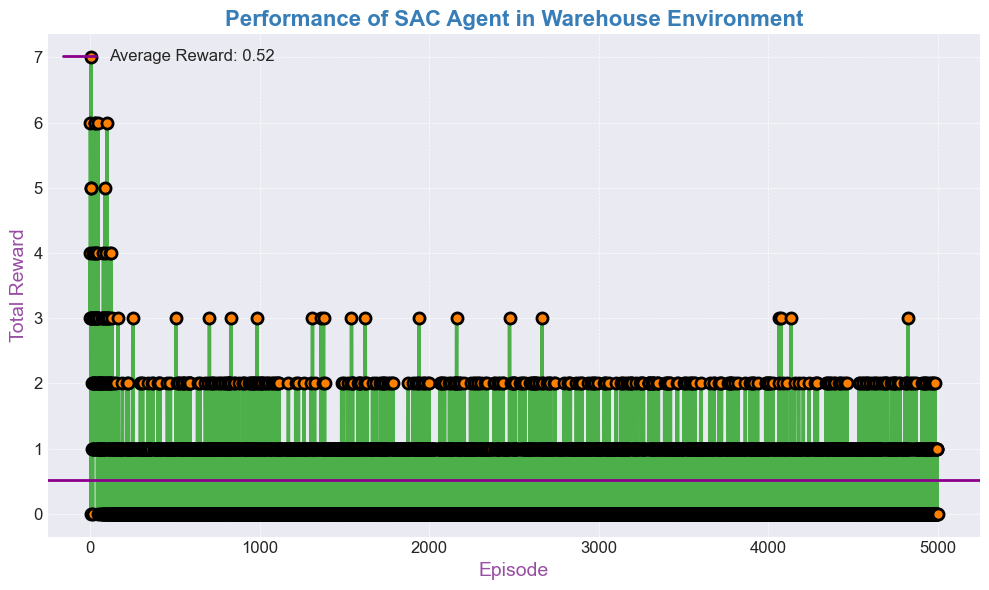

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.distributions import Categorical
import gym

# Actor-Critic Model
class ActorCritic(nn.Module):
    def __init__(self, state_dim, action_dim, hidden_size=256):
        super(ActorCritic, self).__init__()
        self.fc = nn.Linear(state_dim, hidden_size)
        self.actor = nn.Linear(hidden_size, action_dim)
        self.critic = nn.Linear(hidden_size, 1)

    def forward(self, state):
        x = torch.relu(self.fc(state))
        action_probs = torch.softmax(self.actor(x), dim=-1)
        value = self.critic(x)
        return action_probs, value

# SAC Agent
class SACAgent:
    def __init__(self, state_dim, action_dim, hidden_size=256, lr=3e-4, gamma=0.99, alpha=0.2):
        self.actor_critic = ActorCritic(state_dim, action_dim, hidden_size)
        self.optimizer = optim.Adam(self.actor_critic.parameters(), lr=lr)
        self.gamma = gamma
        self.alpha = alpha

    def select_action(self, state):
        state = torch.FloatTensor(state).unsqueeze(0)
        with torch.no_grad():
            action_probs, _ = self.actor_critic(state)
        action_dist = Categorical(action_probs)
        action = action_dist.sample()
        return action.item()

    def update_parameters(self, state, action, reward, next_state, done):
        state = torch.FloatTensor(state).unsqueeze(0)
        action = torch.tensor([action])
        reward = torch.tensor([reward], dtype=torch.float32)
        next_state = torch.FloatTensor(next_state).unsqueeze(0)
        done = torch.tensor([done], dtype=torch.float32)

        action_probs, state_value = self.actor_critic(state)
        _, next_state_value = self.actor_critic(next_state)
        action_log_prob = torch.log(action_probs.squeeze(0)[action])

        target_value = reward + self.gamma * next_state_value * (1 - done)
        advantage = target_value - state_value

        actor_loss = -action_log_prob * advantage.detach()
        critic_loss = 0.5 * advantage.pow(2)

        loss = actor_loss + critic_loss - self.alpha * action_log_prob

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

# Environment Interaction Function
def run_environment(agent, env, num_episodes, early_termination_threshold=200):
    episode_rewards = []  # List to store total rewards per episode

    for episode in range(num_episodes):
        state = env.reset().flatten()
        total_reward = 0
        step_count = 0  # Track the number of steps

        while True:
            action = agent.select_action(state)
            next_state, reward, done, _ = env.step(action)
            next_state = next_state.flatten()
            agent.update_parameters(state, action, reward, next_state, done)
            state = next_state
            total_reward += reward
            step_count += 1

            if step_count >= env.max_steps or (step_count > early_termination_threshold and total_reward < 1):
                print(f"Early termination at Episode {episode + 1}")
                break

            if done:
                break

        episode_rewards.append(total_reward)
        print(f"Episode: {episode + 1}, Total Reward: {total_reward}")

        if episode % 10 == 0:  # Debugging output every 10 episodes
            print(f"Debug: Episode {episode + 1}, Step {step_count}, Total Reward: {total_reward}")

    return episode_rewards

# Main Execution
env = WarehouseEnvironmentA(size=10, num_boxes=10, max_steps=200)
state_dim = env.observation_space.shape[0] * env.observation_space.shape[1]  # Flatten the state
action_dim = env.action_space.n
agent = SACAgent(state_dim=state_dim, action_dim=action_dim)

# Run the environment and collect rewards
rewards = run_environment(agent, env, num_episodes=5000)

# Plot the rewards
plot_rewards(rewards, title="Performance of SAC Agent in Warehouse Environment")

C:\Northeastern\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Northeastern\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Northeastern\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Northeastern\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

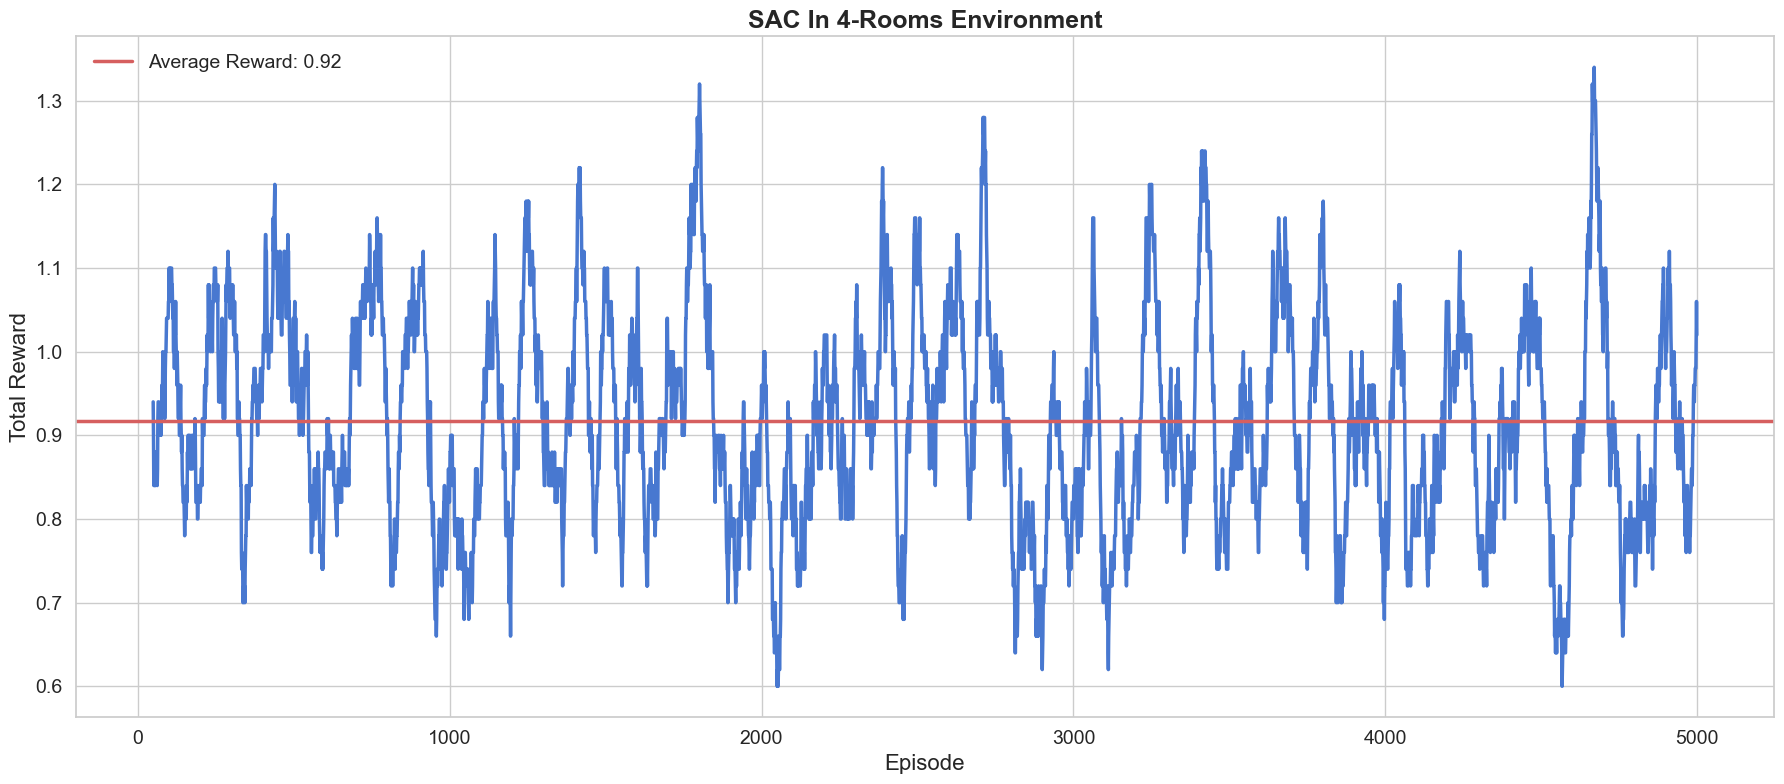

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

np.random.seed(42)  

# Convert rewards to DataFrame for rolling window calculation
df_rewards = pd.DataFrame(rewards, columns=['Reward'])

# Calculate rolling average with a window of 50 episodes
rolling_avg_reward = df_rewards['Reward'].rolling(window=50).mean()

sns.set(style="whitegrid", palette="muted", color_codes=True)
plt.figure(figsize=(18, 8))  # Set the figure size

sns.lineplot(data=rolling_avg_reward, lw=2.5, color='b')

# Title and labels
plt.title("SAC In 4-Rooms Environment", fontsize=18, fontweight='bold')
plt.xlabel("Episode", fontsize=16)
plt.ylabel("Total Reward", fontsize=16)

# Setting the size for tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

avg_reward = sum(rewards) / len(rewards)
plt.axhline(y=avg_reward, color='r', linestyle='-', linewidth=2.5, label=f'Average Reward: {avg_reward:.2f}')
plt.legend(fontsize=14, loc='upper left')

plt.tight_layout()
plt.show()

import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, List
from enum import IntEnum
import random

class Action(IntEnum):
    LEFT = 0
    DOWN = 1
    RIGHT = 2
    UP = 3

def actions_to_dxdy(action: Action) -> Tuple[int, int]:
    mapping = {
        Action.LEFT: (-1, 0),
        Action.DOWN: (0, -1),
        Action.RIGHT: (1, 0),
        Action.UP: (0, 1),
    }
    return mapping[action]

class WarehouseEnvironment(gym.Env):
    def __init__(self, size: int = 10, num_boxes: int = 10, max_steps: int = 100):
        super(WarehouseEnvironment, self).__init__()
        self.size = size
        self.num_boxes = num_boxes
        self.max_steps = max_steps
        self.walls = [
            (0, 5),
            (2, 5),
            (3, 5),
            (4, 5),
            (5, 0),
            (5, 2),
            (5, 3),
            (5, 4),
            (5, 5),
            (5, 6),
            (5, 7),
            (5, 9),
            (5, 10),
            (6, 4),
            (7, 4),
            (9, 4),
            (10, 4),
         ]
        self.size = size
        self.num_boxes = num_boxes
        self.reset()

    def reset(self):
        self.robot_position = (0, 0)
        self.boxes = self._generate_boxes()
        return self._get_state()

    def _generate_boxes(self) -> List[Tuple[int, int]]:
        boxes = []
        while len(boxes) < self.num_boxes:
            box_position = (random.randint(0, self.size - 1), random.randint(0, self.size - 1))
            if box_position not in boxes and box_position != self.robot_position and box_position not in self.walls:
                boxes.append(box_position)
        return boxes

    def step(self, action: Action):
        dx, dy = actions_to_dxdy(action)
        new_x = max(0, min(self.robot_position[0] + dx, self.size - 1))
        new_y = max(0, min(self.robot_position[1] + dy, self.size - 1))
        new_position = (new_x, new_y)

        # Check if the new position is a wall
        if new_position in self.walls:
            return self._get_state(), 0  # No reward and no movement if it's a wall

        self.robot_position = new_position

        reward = 0
        if self.robot_position in self.boxes:
            self.boxes.remove(self.robot_position)
            reward = 1  # Reward for picking up a box

        return self._get_state(), reward


    def _get_state(self):
        state = np.zeros((self.size, self.size))
        x, y = self.robot_position
        state[x, y] = 1  # Robot position
        for bx, by in self.boxes:
            state[bx, by] = 2  # Box position
        return state

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

class Actor(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(Actor, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(state_dim, 64),
            nn.ReLU(),
            nn.Linear(64, action_dim),
            nn.Softmax(dim=-1)
        )

    def forward(self, x):
        return self.fc(x)

class Critic(nn.Module):
    def __init__(self, state_dim):
        super(Critic, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(state_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.fc(x)

In [6]:
class PPO:
    def __init__(self, state_dim, action_dim):
        self.state_dim = state_dim
        self.action_dim = action_dim
        self.actor = Actor(self.state_dim, self.action_dim)
        self.critic = Critic(self.state_dim)
        self.actor_optimizer = optim.Adam(self.actor.parameters(), lr=1e-3)
        self.critic_optimizer = optim.Adam(self.critic.parameters(), lr=1e-3)
        self.eps_clip = 0.2
        self.gamma = 0.99

    def select_action(self, state):
        state = torch.from_numpy(state).float().unsqueeze(0)
        probs = self.actor(state)
        dist = torch.distributions.Categorical(probs)
        action = dist.sample()
        return action.item(), dist.log_prob(action)

    def update(self, memory):
        for _ in range(5):
            for states, actions, old_log_probs, rewards, next_states, dones in memory.generate_batches():
                states = torch.tensor(states, dtype=torch.float)
                actions = torch.tensor(actions, dtype=torch.float)
                old_log_probs = torch.tensor(old_log_probs, dtype=torch.float)
                rewards = torch.tensor(rewards, dtype=torch.float)
                next_states = torch.tensor(next_states, dtype=torch.float)
                dones = torch.tensor(dones, dtype=torch.float)

                # Critic loss
                critic_values = self.critic(states)
                target_values = rewards + self.gamma * self.critic(next_states).detach() * (1 - dones)
                critic_loss = (target_values - critic_values).pow(2).mean()

                # Actor loss
                probs = self.actor(states)
                dist = torch.distributions.Categorical(probs)
                new_log_probs = dist.log_prob(actions)
                ratios = torch.exp(new_log_probs - old_log_probs)
                advantages = target_values - critic_values.detach()
                surr1 = ratios * advantages
                surr2 = torch.clamp(ratios, 1-self.eps_clip, 1+self.eps_clip) * advantages
                actor_loss = -torch.min(surr1, surr2).mean()

                # Update networks
                self.actor_optimizer.zero_grad()
                actor_loss.backward()
                self.actor_optimizer.step()

                self.critic_optimizer.zero_grad()
                critic_loss.backward()
                self.critic_optimizer.step()


In [7]:
class Memory:
    def __init__(self):
        self.states = []
        self.actions = []
        self.log_probs = []
        self.rewards = []
        self.next_states = []
        self.dones = []

    def add(self, state, action, log_prob, reward, next_state, done):
        self.states.append(state)
        self.actions.append(action)
        self.log_probs.append(log_prob)
        self.rewards.append(reward)
        self.next_states.append(next_state)
        self.dones.append(done)

    def generate_batches(self):
        batch_size = 5
        n_states = len(self.states)
        for _ in range(n_states // batch_size):
            idx = np.random.randint(0, n_states, batch_size)
            yield [self.states[i] for i in idx], [self.actions[i] for i in idx], [self.log_probs[i] for i in idx], [self.rewards[i] for i in idx], [self.next_states[i] for i in idx], [self.dones[i] for i in idx]

    def clear(self):
        self.states = []
        self.actions = []
        self.log_probs = []
        self.rewards = []
        self.next_states = []
        self.dones = []

In [8]:
def train(env, ppo, episodes=1000, max_timesteps=200):
    memory = Memory()
    episode_rewards = []

    for episode in range(episodes):
        state = env.reset().flatten()
        total_reward = 0

        for t in range(max_timesteps):
            action, log_prob = ppo.select_action(state)
            next_state, reward = env.step(Action(action))
            next_state = next_state.flatten()
            memory.add(state, action, log_prob, reward, next_state, reward == 1)
            state = next_state
            total_reward += reward

            if reward == 1:  # If a box is picked up
                ppo.update(memory)
                memory.clear()

        episode_rewards.append(total_reward)
        print(f"Episode: {episode}, Total Reward: {total_reward}")

    return episode_rewards

In [9]:
import matplotlib.pyplot as plt

def plot_rewards(rewards, title="PPO In Gridworld Environment"):
    plt.figure(figsize=(10, 6))  # Set the figure size

    # Use a more vibrant color scheme and style
    plt.style.use('seaborn-darkgrid')
    palette = plt.get_cmap('Set1')  # Color palette

    plt.plot(rewards, color=palette(2), linewidth=2.5, marker='o', markersize=8, markerfacecolor=palette(4), markeredgewidth=2, markeredgecolor='black')
    plt.title(title, fontsize=16, fontweight='bold', color=palette(1))
    plt.xlabel("Episode", fontsize=14, color=palette(3))
    plt.ylabel("Total Reward", fontsize=14, color=palette(3))
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping

    # Optional: Add a horizontal line for average reward
    avg_reward = sum(rewards) / len(rewards)
    plt.axhline(y=avg_reward, color='darkmagenta', linestyle='-', linewidth=2, label=f'Average Reward: {avg_reward:.2f}')
    plt.legend(fontsize=12, loc='upper left')

    plt.show()

Episode: 0, Total Reward: 1
Episode: 1, Total Reward: 4
Episode: 2, Total Reward: 6
Episode: 3, Total Reward: 2
Episode: 4, Total Reward: 4
Episode: 5, Total Reward: 5
Episode: 6, Total Reward: 7
Episode: 7, Total Reward: 3
Episode: 8, Total Reward: 3
Episode: 9, Total Reward: 3
Episode: 10, Total Reward: 4
Episode: 11, Total Reward: 4
Episode: 12, Total Reward: 6
Episode: 13, Total Reward: 5
Episode: 14, Total Reward: 6
Episode: 15, Total Reward: 5
Episode: 16, Total Reward: 6
Episode: 17, Total Reward: 2
Episode: 18, Total Reward: 2
Episode: 19, Total Reward: 1
Episode: 20, Total Reward: 2
Episode: 21, Total Reward: 3
Episode: 22, Total Reward: 4
Episode: 23, Total Reward: 4
Episode: 24, Total Reward: 4
Episode: 25, Total Reward: 2
Episode: 26, Total Reward: 5
Episode: 27, Total Reward: 9
Episode: 28, Total Reward: 7
Episode: 29, Total Reward: 4
Episode: 30, Total Reward: 5
Episode: 31, Total Reward: 8
Episode: 32, Total Reward: 3
Episode: 33, Total Reward: 3
Episode: 34, Total Rewar

Episode: 277, Total Reward: 5
Episode: 278, Total Reward: 5
Episode: 279, Total Reward: 8
Episode: 280, Total Reward: 5
Episode: 281, Total Reward: 0
Episode: 282, Total Reward: 2
Episode: 283, Total Reward: 3
Episode: 284, Total Reward: 3
Episode: 285, Total Reward: 3
Episode: 286, Total Reward: 6
Episode: 287, Total Reward: 5
Episode: 288, Total Reward: 2
Episode: 289, Total Reward: 6
Episode: 290, Total Reward: 2
Episode: 291, Total Reward: 3
Episode: 292, Total Reward: 4
Episode: 293, Total Reward: 7
Episode: 294, Total Reward: 4
Episode: 295, Total Reward: 6
Episode: 296, Total Reward: 1
Episode: 297, Total Reward: 3
Episode: 298, Total Reward: 4
Episode: 299, Total Reward: 3
Episode: 300, Total Reward: 2
Episode: 301, Total Reward: 6
Episode: 302, Total Reward: 1
Episode: 303, Total Reward: 5
Episode: 304, Total Reward: 4
Episode: 305, Total Reward: 4
Episode: 306, Total Reward: 7
Episode: 307, Total Reward: 3
Episode: 308, Total Reward: 0
Episode: 309, Total Reward: 0
Episode: 3

Episode: 551, Total Reward: 4
Episode: 552, Total Reward: 5
Episode: 553, Total Reward: 0
Episode: 554, Total Reward: 4
Episode: 555, Total Reward: 8
Episode: 556, Total Reward: 8
Episode: 557, Total Reward: 7
Episode: 558, Total Reward: 2
Episode: 559, Total Reward: 4
Episode: 560, Total Reward: 4
Episode: 561, Total Reward: 1
Episode: 562, Total Reward: 1
Episode: 563, Total Reward: 1
Episode: 564, Total Reward: 3
Episode: 565, Total Reward: 5
Episode: 566, Total Reward: 6
Episode: 567, Total Reward: 3
Episode: 568, Total Reward: 4
Episode: 569, Total Reward: 4
Episode: 570, Total Reward: 6
Episode: 571, Total Reward: 4
Episode: 572, Total Reward: 4
Episode: 573, Total Reward: 4
Episode: 574, Total Reward: 1
Episode: 575, Total Reward: 1
Episode: 576, Total Reward: 5
Episode: 577, Total Reward: 6
Episode: 578, Total Reward: 4
Episode: 579, Total Reward: 7
Episode: 580, Total Reward: 4
Episode: 581, Total Reward: 6
Episode: 582, Total Reward: 5
Episode: 583, Total Reward: 3
Episode: 5

Episode: 825, Total Reward: 2
Episode: 826, Total Reward: 5
Episode: 827, Total Reward: 1
Episode: 828, Total Reward: 7
Episode: 829, Total Reward: 2
Episode: 830, Total Reward: 2
Episode: 831, Total Reward: 5
Episode: 832, Total Reward: 4
Episode: 833, Total Reward: 3
Episode: 834, Total Reward: 2
Episode: 835, Total Reward: 2
Episode: 836, Total Reward: 2
Episode: 837, Total Reward: 1
Episode: 838, Total Reward: 4
Episode: 839, Total Reward: 6
Episode: 840, Total Reward: 5
Episode: 841, Total Reward: 4
Episode: 842, Total Reward: 3
Episode: 843, Total Reward: 2
Episode: 844, Total Reward: 6
Episode: 845, Total Reward: 8
Episode: 846, Total Reward: 1
Episode: 847, Total Reward: 0
Episode: 848, Total Reward: 4
Episode: 849, Total Reward: 5
Episode: 850, Total Reward: 5
Episode: 851, Total Reward: 4
Episode: 852, Total Reward: 2
Episode: 853, Total Reward: 4
Episode: 854, Total Reward: 3
Episode: 855, Total Reward: 5
Episode: 856, Total Reward: 3
Episode: 857, Total Reward: 6
Episode: 8

Episode: 1095, Total Reward: 2
Episode: 1096, Total Reward: 4
Episode: 1097, Total Reward: 3
Episode: 1098, Total Reward: 1
Episode: 1099, Total Reward: 5
Episode: 1100, Total Reward: 3
Episode: 1101, Total Reward: 3
Episode: 1102, Total Reward: 1
Episode: 1103, Total Reward: 1
Episode: 1104, Total Reward: 1
Episode: 1105, Total Reward: 8
Episode: 1106, Total Reward: 3
Episode: 1107, Total Reward: 2
Episode: 1108, Total Reward: 3
Episode: 1109, Total Reward: 3
Episode: 1110, Total Reward: 2
Episode: 1111, Total Reward: 4
Episode: 1112, Total Reward: 3
Episode: 1113, Total Reward: 3
Episode: 1114, Total Reward: 5
Episode: 1115, Total Reward: 3
Episode: 1116, Total Reward: 6
Episode: 1117, Total Reward: 4
Episode: 1118, Total Reward: 3
Episode: 1119, Total Reward: 3
Episode: 1120, Total Reward: 2
Episode: 1121, Total Reward: 3
Episode: 1122, Total Reward: 3
Episode: 1123, Total Reward: 1
Episode: 1124, Total Reward: 2
Episode: 1125, Total Reward: 5
Episode: 1126, Total Reward: 1
Episode:

Episode: 1360, Total Reward: 2
Episode: 1361, Total Reward: 4
Episode: 1362, Total Reward: 1
Episode: 1363, Total Reward: 1
Episode: 1364, Total Reward: 4
Episode: 1365, Total Reward: 8
Episode: 1366, Total Reward: 3
Episode: 1367, Total Reward: 4
Episode: 1368, Total Reward: 6
Episode: 1369, Total Reward: 1
Episode: 1370, Total Reward: 6
Episode: 1371, Total Reward: 4
Episode: 1372, Total Reward: 3
Episode: 1373, Total Reward: 2
Episode: 1374, Total Reward: 2
Episode: 1375, Total Reward: 3
Episode: 1376, Total Reward: 3
Episode: 1377, Total Reward: 3
Episode: 1378, Total Reward: 6
Episode: 1379, Total Reward: 3
Episode: 1380, Total Reward: 3
Episode: 1381, Total Reward: 3
Episode: 1382, Total Reward: 7
Episode: 1383, Total Reward: 4
Episode: 1384, Total Reward: 4
Episode: 1385, Total Reward: 1
Episode: 1386, Total Reward: 3
Episode: 1387, Total Reward: 2
Episode: 1388, Total Reward: 2
Episode: 1389, Total Reward: 6
Episode: 1390, Total Reward: 1
Episode: 1391, Total Reward: 1
Episode:

Episode: 1625, Total Reward: 1
Episode: 1626, Total Reward: 3
Episode: 1627, Total Reward: 4
Episode: 1628, Total Reward: 1
Episode: 1629, Total Reward: 4
Episode: 1630, Total Reward: 2
Episode: 1631, Total Reward: 8
Episode: 1632, Total Reward: 3
Episode: 1633, Total Reward: 1
Episode: 1634, Total Reward: 3
Episode: 1635, Total Reward: 2
Episode: 1636, Total Reward: 2
Episode: 1637, Total Reward: 0
Episode: 1638, Total Reward: 0
Episode: 1639, Total Reward: 5
Episode: 1640, Total Reward: 1
Episode: 1641, Total Reward: 6
Episode: 1642, Total Reward: 2
Episode: 1643, Total Reward: 5
Episode: 1644, Total Reward: 4
Episode: 1645, Total Reward: 4
Episode: 1646, Total Reward: 2
Episode: 1647, Total Reward: 3
Episode: 1648, Total Reward: 1
Episode: 1649, Total Reward: 5
Episode: 1650, Total Reward: 4
Episode: 1651, Total Reward: 5
Episode: 1652, Total Reward: 3
Episode: 1653, Total Reward: 3
Episode: 1654, Total Reward: 4
Episode: 1655, Total Reward: 1
Episode: 1656, Total Reward: 4
Episode:

Episode: 1890, Total Reward: 2
Episode: 1891, Total Reward: 5
Episode: 1892, Total Reward: 2
Episode: 1893, Total Reward: 1
Episode: 1894, Total Reward: 2
Episode: 1895, Total Reward: 2
Episode: 1896, Total Reward: 4
Episode: 1897, Total Reward: 6
Episode: 1898, Total Reward: 1
Episode: 1899, Total Reward: 1
Episode: 1900, Total Reward: 7
Episode: 1901, Total Reward: 1
Episode: 1902, Total Reward: 2
Episode: 1903, Total Reward: 7
Episode: 1904, Total Reward: 2
Episode: 1905, Total Reward: 2
Episode: 1906, Total Reward: 3
Episode: 1907, Total Reward: 0
Episode: 1908, Total Reward: 2
Episode: 1909, Total Reward: 2
Episode: 1910, Total Reward: 1
Episode: 1911, Total Reward: 3
Episode: 1912, Total Reward: 7
Episode: 1913, Total Reward: 0
Episode: 1914, Total Reward: 2
Episode: 1915, Total Reward: 2
Episode: 1916, Total Reward: 2
Episode: 1917, Total Reward: 4
Episode: 1918, Total Reward: 2
Episode: 1919, Total Reward: 6
Episode: 1920, Total Reward: 2
Episode: 1921, Total Reward: 4
Episode:

Episode: 2155, Total Reward: 3
Episode: 2156, Total Reward: 1
Episode: 2157, Total Reward: 0
Episode: 2158, Total Reward: 0
Episode: 2159, Total Reward: 1
Episode: 2160, Total Reward: 1
Episode: 2161, Total Reward: 4
Episode: 2162, Total Reward: 2
Episode: 2163, Total Reward: 2
Episode: 2164, Total Reward: 2
Episode: 2165, Total Reward: 4
Episode: 2166, Total Reward: 4
Episode: 2167, Total Reward: 7
Episode: 2168, Total Reward: 6
Episode: 2169, Total Reward: 3
Episode: 2170, Total Reward: 5
Episode: 2171, Total Reward: 3
Episode: 2172, Total Reward: 5
Episode: 2173, Total Reward: 6
Episode: 2174, Total Reward: 0
Episode: 2175, Total Reward: 6
Episode: 2176, Total Reward: 4
Episode: 2177, Total Reward: 4
Episode: 2178, Total Reward: 5
Episode: 2179, Total Reward: 2
Episode: 2180, Total Reward: 3
Episode: 2181, Total Reward: 5
Episode: 2182, Total Reward: 1
Episode: 2183, Total Reward: 4
Episode: 2184, Total Reward: 2
Episode: 2185, Total Reward: 1
Episode: 2186, Total Reward: 5
Episode:

Episode: 2420, Total Reward: 2
Episode: 2421, Total Reward: 2
Episode: 2422, Total Reward: 4
Episode: 2423, Total Reward: 1
Episode: 2424, Total Reward: 4
Episode: 2425, Total Reward: 3
Episode: 2426, Total Reward: 4
Episode: 2427, Total Reward: 4
Episode: 2428, Total Reward: 6
Episode: 2429, Total Reward: 6
Episode: 2430, Total Reward: 2
Episode: 2431, Total Reward: 2
Episode: 2432, Total Reward: 1
Episode: 2433, Total Reward: 3
Episode: 2434, Total Reward: 8
Episode: 2435, Total Reward: 2
Episode: 2436, Total Reward: 4
Episode: 2437, Total Reward: 5
Episode: 2438, Total Reward: 4
Episode: 2439, Total Reward: 3
Episode: 2440, Total Reward: 2
Episode: 2441, Total Reward: 3
Episode: 2442, Total Reward: 2
Episode: 2443, Total Reward: 3
Episode: 2444, Total Reward: 3
Episode: 2445, Total Reward: 6
Episode: 2446, Total Reward: 2
Episode: 2447, Total Reward: 4
Episode: 2448, Total Reward: 0
Episode: 2449, Total Reward: 3
Episode: 2450, Total Reward: 1
Episode: 2451, Total Reward: 0
Episode:

Episode: 2685, Total Reward: 5
Episode: 2686, Total Reward: 0
Episode: 2687, Total Reward: 4
Episode: 2688, Total Reward: 4
Episode: 2689, Total Reward: 1
Episode: 2690, Total Reward: 4
Episode: 2691, Total Reward: 2
Episode: 2692, Total Reward: 3
Episode: 2693, Total Reward: 0
Episode: 2694, Total Reward: 3
Episode: 2695, Total Reward: 3
Episode: 2696, Total Reward: 2
Episode: 2697, Total Reward: 1
Episode: 2698, Total Reward: 2
Episode: 2699, Total Reward: 1
Episode: 2700, Total Reward: 0
Episode: 2701, Total Reward: 4
Episode: 2702, Total Reward: 3
Episode: 2703, Total Reward: 0
Episode: 2704, Total Reward: 2
Episode: 2705, Total Reward: 4
Episode: 2706, Total Reward: 2
Episode: 2707, Total Reward: 7
Episode: 2708, Total Reward: 1
Episode: 2709, Total Reward: 2
Episode: 2710, Total Reward: 6
Episode: 2711, Total Reward: 1
Episode: 2712, Total Reward: 7
Episode: 2713, Total Reward: 1
Episode: 2714, Total Reward: 3
Episode: 2715, Total Reward: 0
Episode: 2716, Total Reward: 5
Episode:

Episode: 2950, Total Reward: 3
Episode: 2951, Total Reward: 1
Episode: 2952, Total Reward: 4
Episode: 2953, Total Reward: 2
Episode: 2954, Total Reward: 0
Episode: 2955, Total Reward: 2
Episode: 2956, Total Reward: 0
Episode: 2957, Total Reward: 4
Episode: 2958, Total Reward: 2
Episode: 2959, Total Reward: 7
Episode: 2960, Total Reward: 3
Episode: 2961, Total Reward: 1
Episode: 2962, Total Reward: 3
Episode: 2963, Total Reward: 3
Episode: 2964, Total Reward: 0
Episode: 2965, Total Reward: 4
Episode: 2966, Total Reward: 1
Episode: 2967, Total Reward: 2
Episode: 2968, Total Reward: 0
Episode: 2969, Total Reward: 4
Episode: 2970, Total Reward: 5
Episode: 2971, Total Reward: 1
Episode: 2972, Total Reward: 1
Episode: 2973, Total Reward: 1
Episode: 2974, Total Reward: 0
Episode: 2975, Total Reward: 5
Episode: 2976, Total Reward: 1
Episode: 2977, Total Reward: 0
Episode: 2978, Total Reward: 2
Episode: 2979, Total Reward: 3
Episode: 2980, Total Reward: 2
Episode: 2981, Total Reward: 0
Episode:

Episode: 3215, Total Reward: 3
Episode: 3216, Total Reward: 3
Episode: 3217, Total Reward: 1
Episode: 3218, Total Reward: 4
Episode: 3219, Total Reward: 1
Episode: 3220, Total Reward: 3
Episode: 3221, Total Reward: 2
Episode: 3222, Total Reward: 1
Episode: 3223, Total Reward: 5
Episode: 3224, Total Reward: 5
Episode: 3225, Total Reward: 3
Episode: 3226, Total Reward: 5
Episode: 3227, Total Reward: 3
Episode: 3228, Total Reward: 3
Episode: 3229, Total Reward: 1
Episode: 3230, Total Reward: 3
Episode: 3231, Total Reward: 1
Episode: 3232, Total Reward: 3
Episode: 3233, Total Reward: 1
Episode: 3234, Total Reward: 2
Episode: 3235, Total Reward: 0
Episode: 3236, Total Reward: 1
Episode: 3237, Total Reward: 1
Episode: 3238, Total Reward: 1
Episode: 3239, Total Reward: 3
Episode: 3240, Total Reward: 4
Episode: 3241, Total Reward: 4
Episode: 3242, Total Reward: 3
Episode: 3243, Total Reward: 0
Episode: 3244, Total Reward: 2
Episode: 3245, Total Reward: 1
Episode: 3246, Total Reward: 4
Episode:

Episode: 3480, Total Reward: 3
Episode: 3481, Total Reward: 2
Episode: 3482, Total Reward: 5
Episode: 3483, Total Reward: 0
Episode: 3484, Total Reward: 1
Episode: 3485, Total Reward: 7
Episode: 3486, Total Reward: 6
Episode: 3487, Total Reward: 1
Episode: 3488, Total Reward: 0
Episode: 3489, Total Reward: 3
Episode: 3490, Total Reward: 4
Episode: 3491, Total Reward: 0
Episode: 3492, Total Reward: 2
Episode: 3493, Total Reward: 5
Episode: 3494, Total Reward: 0
Episode: 3495, Total Reward: 1
Episode: 3496, Total Reward: 2
Episode: 3497, Total Reward: 2
Episode: 3498, Total Reward: 3
Episode: 3499, Total Reward: 2
Episode: 3500, Total Reward: 6
Episode: 3501, Total Reward: 5
Episode: 3502, Total Reward: 2
Episode: 3503, Total Reward: 1
Episode: 3504, Total Reward: 1
Episode: 3505, Total Reward: 1
Episode: 3506, Total Reward: 1
Episode: 3507, Total Reward: 5
Episode: 3508, Total Reward: 2
Episode: 3509, Total Reward: 5
Episode: 3510, Total Reward: 2
Episode: 3511, Total Reward: 3
Episode:

Episode: 3745, Total Reward: 6
Episode: 3746, Total Reward: 3
Episode: 3747, Total Reward: 7
Episode: 3748, Total Reward: 4
Episode: 3749, Total Reward: 1
Episode: 3750, Total Reward: 1
Episode: 3751, Total Reward: 1
Episode: 3752, Total Reward: 2
Episode: 3753, Total Reward: 0
Episode: 3754, Total Reward: 0
Episode: 3755, Total Reward: 2
Episode: 3756, Total Reward: 0
Episode: 3757, Total Reward: 4
Episode: 3758, Total Reward: 2
Episode: 3759, Total Reward: 2
Episode: 3760, Total Reward: 2
Episode: 3761, Total Reward: 1
Episode: 3762, Total Reward: 1
Episode: 3763, Total Reward: 2
Episode: 3764, Total Reward: 3
Episode: 3765, Total Reward: 2
Episode: 3766, Total Reward: 4
Episode: 3767, Total Reward: 2
Episode: 3768, Total Reward: 2
Episode: 3769, Total Reward: 2
Episode: 3770, Total Reward: 2
Episode: 3771, Total Reward: 2
Episode: 3772, Total Reward: 4
Episode: 3773, Total Reward: 0
Episode: 3774, Total Reward: 2
Episode: 3775, Total Reward: 2
Episode: 3776, Total Reward: 0
Episode:

Episode: 4010, Total Reward: 2
Episode: 4011, Total Reward: 2
Episode: 4012, Total Reward: 4
Episode: 4013, Total Reward: 1
Episode: 4014, Total Reward: 2
Episode: 4015, Total Reward: 1
Episode: 4016, Total Reward: 2
Episode: 4017, Total Reward: 1
Episode: 4018, Total Reward: 5
Episode: 4019, Total Reward: 1
Episode: 4020, Total Reward: 4
Episode: 4021, Total Reward: 1
Episode: 4022, Total Reward: 2
Episode: 4023, Total Reward: 4
Episode: 4024, Total Reward: 1
Episode: 4025, Total Reward: 6
Episode: 4026, Total Reward: 1
Episode: 4027, Total Reward: 2
Episode: 4028, Total Reward: 3
Episode: 4029, Total Reward: 0
Episode: 4030, Total Reward: 1
Episode: 4031, Total Reward: 2
Episode: 4032, Total Reward: 5
Episode: 4033, Total Reward: 1
Episode: 4034, Total Reward: 2
Episode: 4035, Total Reward: 3
Episode: 4036, Total Reward: 3
Episode: 4037, Total Reward: 1
Episode: 4038, Total Reward: 6
Episode: 4039, Total Reward: 4
Episode: 4040, Total Reward: 4
Episode: 4041, Total Reward: 3
Episode:

Episode: 4275, Total Reward: 0
Episode: 4276, Total Reward: 2
Episode: 4277, Total Reward: 1
Episode: 4278, Total Reward: 1
Episode: 4279, Total Reward: 2
Episode: 4280, Total Reward: 6
Episode: 4281, Total Reward: 3
Episode: 4282, Total Reward: 3
Episode: 4283, Total Reward: 3
Episode: 4284, Total Reward: 2
Episode: 4285, Total Reward: 7
Episode: 4286, Total Reward: 1
Episode: 4287, Total Reward: 3
Episode: 4288, Total Reward: 2
Episode: 4289, Total Reward: 3
Episode: 4290, Total Reward: 2
Episode: 4291, Total Reward: 2
Episode: 4292, Total Reward: 4
Episode: 4293, Total Reward: 3
Episode: 4294, Total Reward: 2
Episode: 4295, Total Reward: 5
Episode: 4296, Total Reward: 1
Episode: 4297, Total Reward: 1
Episode: 4298, Total Reward: 1
Episode: 4299, Total Reward: 0
Episode: 4300, Total Reward: 3
Episode: 4301, Total Reward: 5
Episode: 4302, Total Reward: 4
Episode: 4303, Total Reward: 2
Episode: 4304, Total Reward: 1
Episode: 4305, Total Reward: 3
Episode: 4306, Total Reward: 1
Episode:

Episode: 4540, Total Reward: 2
Episode: 4541, Total Reward: 4
Episode: 4542, Total Reward: 2
Episode: 4543, Total Reward: 2
Episode: 4544, Total Reward: 3
Episode: 4545, Total Reward: 1
Episode: 4546, Total Reward: 1
Episode: 4547, Total Reward: 3
Episode: 4548, Total Reward: 2
Episode: 4549, Total Reward: 4
Episode: 4550, Total Reward: 0
Episode: 4551, Total Reward: 0
Episode: 4552, Total Reward: 0
Episode: 4553, Total Reward: 3
Episode: 4554, Total Reward: 0
Episode: 4555, Total Reward: 1
Episode: 4556, Total Reward: 4
Episode: 4557, Total Reward: 4
Episode: 4558, Total Reward: 4
Episode: 4559, Total Reward: 1
Episode: 4560, Total Reward: 4
Episode: 4561, Total Reward: 3
Episode: 4562, Total Reward: 0
Episode: 4563, Total Reward: 1
Episode: 4564, Total Reward: 2
Episode: 4565, Total Reward: 1
Episode: 4566, Total Reward: 1
Episode: 4567, Total Reward: 0
Episode: 4568, Total Reward: 4
Episode: 4569, Total Reward: 1
Episode: 4570, Total Reward: 1
Episode: 4571, Total Reward: 0
Episode:

Episode: 4805, Total Reward: 0
Episode: 4806, Total Reward: 3
Episode: 4807, Total Reward: 1
Episode: 4808, Total Reward: 1
Episode: 4809, Total Reward: 1
Episode: 4810, Total Reward: 2
Episode: 4811, Total Reward: 2
Episode: 4812, Total Reward: 5
Episode: 4813, Total Reward: 0
Episode: 4814, Total Reward: 0
Episode: 4815, Total Reward: 2
Episode: 4816, Total Reward: 5
Episode: 4817, Total Reward: 1
Episode: 4818, Total Reward: 4
Episode: 4819, Total Reward: 1
Episode: 4820, Total Reward: 0
Episode: 4821, Total Reward: 2
Episode: 4822, Total Reward: 3
Episode: 4823, Total Reward: 3
Episode: 4824, Total Reward: 3
Episode: 4825, Total Reward: 4
Episode: 4826, Total Reward: 3
Episode: 4827, Total Reward: 1
Episode: 4828, Total Reward: 6
Episode: 4829, Total Reward: 1
Episode: 4830, Total Reward: 6
Episode: 4831, Total Reward: 0
Episode: 4832, Total Reward: 1
Episode: 4833, Total Reward: 2
Episode: 4834, Total Reward: 1
Episode: 4835, Total Reward: 1
Episode: 4836, Total Reward: 0
Episode:

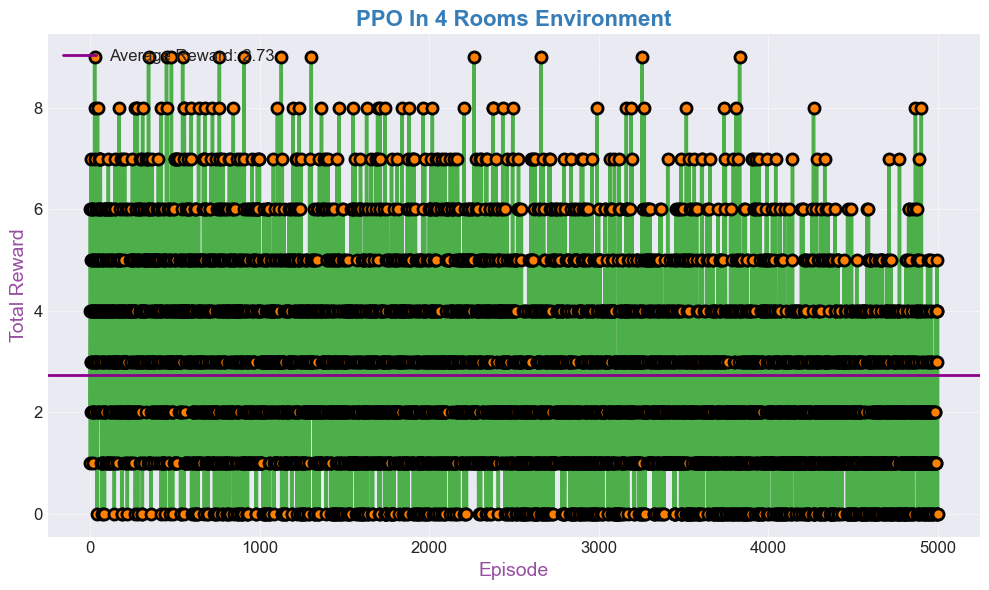

In [16]:
env = WarehouseEnvironment()
state_dim = 100  # Assuming a flat state space of size 100
action_dim = 4
ppo_agent = PPO(state_dim, action_dim)
# Train the agent
rewards = train(env, ppo_agent, episodes=5000, max_timesteps=200)

# Plot the rewards
plot_rewards(rewards)

C:\Northeastern\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Northeastern\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Northeastern\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Northeastern\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

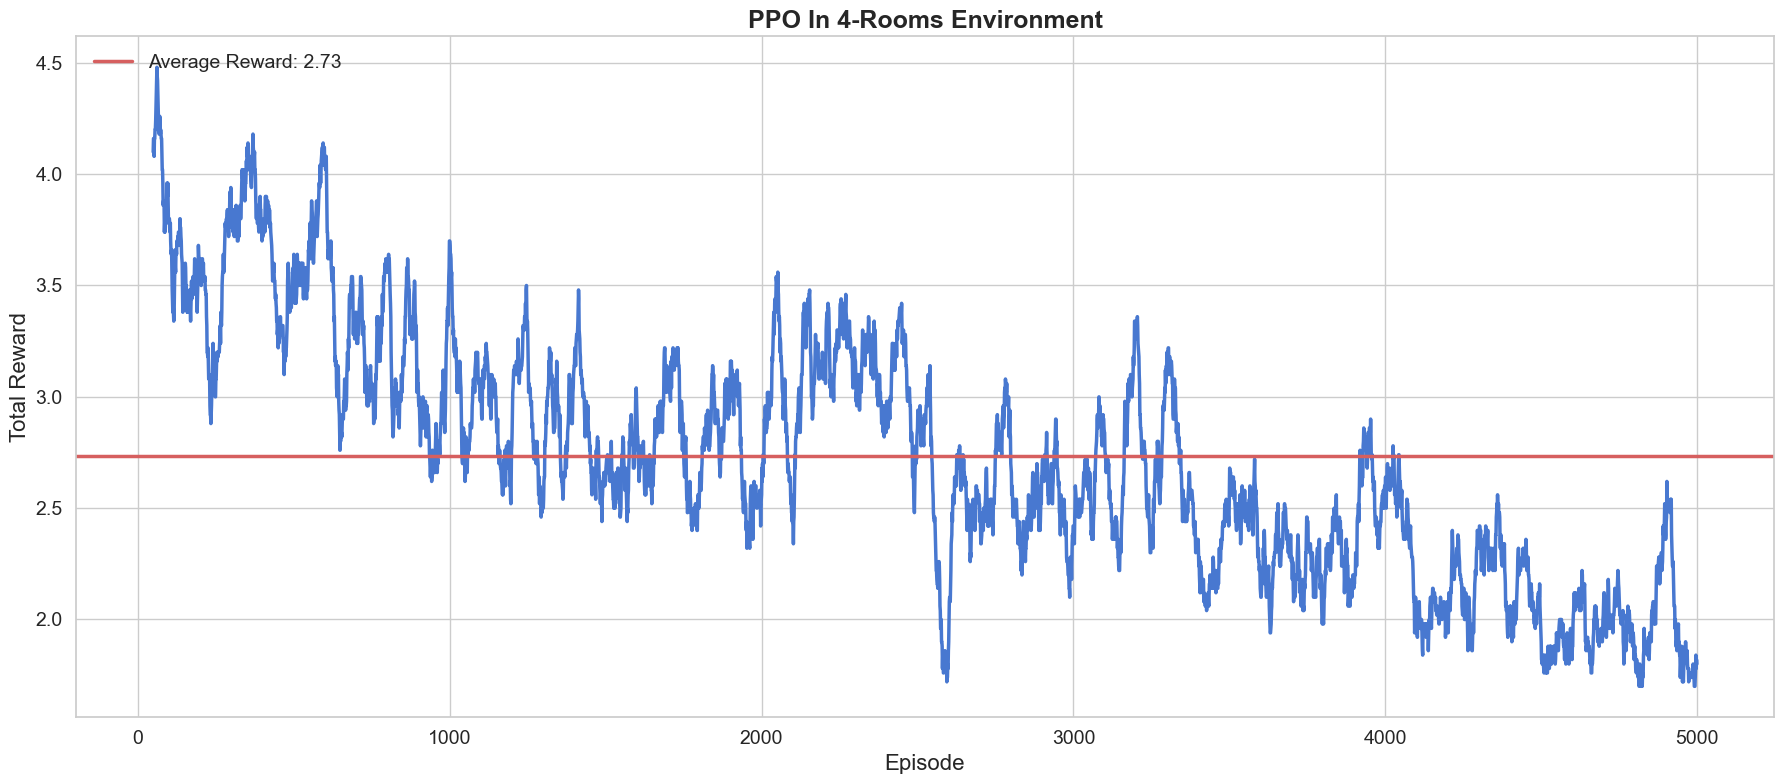

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

np.random.seed(42)  

# Convert rewards to DataFrame for rolling window calculation
df_rewards = pd.DataFrame(rewards, columns=['Reward'])

# Calculate rolling average with a window of 50 episodes
rolling_avg_reward = df_rewards['Reward'].rolling(window=50).mean()

sns.set(style="whitegrid", palette="muted", color_codes=True)
plt.figure(figsize=(18, 8))  # Set the figure size

sns.lineplot(data=rolling_avg_reward, lw=2.5, color='b')

# Title and labels
plt.title("PPO In 4-Rooms Environment", fontsize=18, fontweight='bold')
plt.xlabel("Episode", fontsize=16)
plt.ylabel("Total Reward", fontsize=16)

# Setting the size for tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

avg_reward = sum(rewards) / len(rewards)
plt.axhline(y=avg_reward, color='r', linestyle='-', linewidth=2.5, label=f'Average Reward: {avg_reward:.2f}')
plt.legend(fontsize=14, loc='upper left')

plt.tight_layout()
plt.show()

In [31]:
import gym
from gym import spaces
import numpy as np
import random
from enum import IntEnum

class Action(IntEnum):
    LEFT = 0
    DOWN = 1
    RIGHT = 2
    UP = 3

def actions_to_dxdy(action: Action) -> Tuple[int, int]:
    mapping = {
        Action.LEFT: (-1, 0),
        Action.DOWN: (0, -1),
        Action.RIGHT: (1, 0),
        Action.UP: (0, 1),
    }
    return mapping[action]

class WarehouseEnv(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self, size: int = 10, num_boxes: int = 5, max_steps: int = 100):
            super(WarehouseEnv, self).__init__()
            self.size = size
            self.num_boxes = num_boxes
            self.max_steps = max_steps
            self.action_space = spaces.Discrete(len(Action))
            self.observation_space = spaces.Box(low=0, high=2, shape=(size, size), dtype=np.int32)
            self.reset()

    def reset(self):
        self.robot_position = (0, 0)
        self.boxes = self._generate_boxes()
        self.current_step = 0
        return self._get_state()

    def _generate_boxes(self) -> List[Tuple[int, int]]:
        boxes = []
        while len(boxes) < self.num_boxes:
            box_position = (random.randint(0, self.size - 1), random.randint(0, self.size - 1))
            if box_position not in boxes and box_position != self.robot_position:
                boxes.append(box_position)
        return boxes

    def _get_state(self):
        state = np.zeros((self.size, self.size), dtype=np.int32)
        x, y = self.robot_position
        state[x, y] = 1  # Robot position
        for bx, by in self.boxes:
            state[bx, by] = 2  # Box position
        return state

    def step(self, action: Action):
        dx, dy = actions_to_dxdy(action)
        new_x = max(0, min(self.robot_position[0] + dx, self.size - 1))
        new_y = max(0, min(self.robot_position[1] + dy, self.size - 1))
        self.robot_position = (new_x, new_y)

        reward = 0
        if self.robot_position in self.boxes:
            self.boxes.remove(self.robot_position)
            reward = 1  # Reward for picking up a box

        self.current_step += 1
        done = len(self.boxes) == 0 or self.current_step >= self.max_steps
        return self._get_state(), reward, done, {}  # Added empty dictionary


    def render(self, mode='human', close=False):
        pass

Early termination at Episode 1
Episode: 1, Total Reward: 2
Debug: Episode 1, Step 100, Total Reward: 2
Early termination at Episode 2
Episode: 2, Total Reward: 3
Early termination at Episode 3
Episode: 3, Total Reward: 0
Early termination at Episode 4
Episode: 4, Total Reward: 1
Early termination at Episode 5
Episode: 5, Total Reward: 1
Early termination at Episode 6
Episode: 6, Total Reward: 0
Early termination at Episode 7
Episode: 7, Total Reward: 1
Early termination at Episode 8
Episode: 8, Total Reward: 1
Early termination at Episode 9
Episode: 9, Total Reward: 0
Early termination at Episode 10
Episode: 10, Total Reward: 1
Early termination at Episode 11
Episode: 11, Total Reward: 2
Debug: Episode 11, Step 100, Total Reward: 2
Early termination at Episode 12
Episode: 12, Total Reward: 1
Early termination at Episode 13
Episode: 13, Total Reward: 2
Early termination at Episode 14
Episode: 14, Total Reward: 0
Early termination at Episode 15
Episode: 15, Total Reward: 0
Early terminat

Early termination at Episode 126
Episode: 126, Total Reward: 0
Early termination at Episode 127
Episode: 127, Total Reward: 2
Early termination at Episode 128
Episode: 128, Total Reward: 1
Early termination at Episode 129
Episode: 129, Total Reward: 0
Early termination at Episode 130
Episode: 130, Total Reward: 1
Early termination at Episode 131
Episode: 131, Total Reward: 1
Debug: Episode 131, Step 100, Total Reward: 1
Early termination at Episode 132
Episode: 132, Total Reward: 2
Early termination at Episode 133
Episode: 133, Total Reward: 0
Early termination at Episode 134
Episode: 134, Total Reward: 1
Early termination at Episode 135
Episode: 135, Total Reward: 1
Early termination at Episode 136
Episode: 136, Total Reward: 2
Early termination at Episode 137
Episode: 137, Total Reward: 2
Early termination at Episode 138
Episode: 138, Total Reward: 2
Early termination at Episode 139
Episode: 139, Total Reward: 1
Early termination at Episode 140
Episode: 140, Total Reward: 1
Early ter

Early termination at Episode 248
Episode: 248, Total Reward: 1
Early termination at Episode 249
Episode: 249, Total Reward: 0
Early termination at Episode 250
Episode: 250, Total Reward: 0
Early termination at Episode 251
Episode: 251, Total Reward: 0
Debug: Episode 251, Step 100, Total Reward: 0
Early termination at Episode 252
Episode: 252, Total Reward: 2
Early termination at Episode 253
Episode: 253, Total Reward: 1
Early termination at Episode 254
Episode: 254, Total Reward: 1
Early termination at Episode 255
Episode: 255, Total Reward: 0
Early termination at Episode 256
Episode: 256, Total Reward: 1
Early termination at Episode 257
Episode: 257, Total Reward: 2
Early termination at Episode 258
Episode: 258, Total Reward: 1
Early termination at Episode 259
Episode: 259, Total Reward: 0
Early termination at Episode 260
Episode: 260, Total Reward: 0
Early termination at Episode 261
Episode: 261, Total Reward: 0
Debug: Episode 261, Step 100, Total Reward: 0
Early termination at Episo

Early termination at Episode 370
Episode: 370, Total Reward: 1
Early termination at Episode 371
Episode: 371, Total Reward: 0
Debug: Episode 371, Step 100, Total Reward: 0
Early termination at Episode 372
Episode: 372, Total Reward: 1
Early termination at Episode 373
Episode: 373, Total Reward: 1
Early termination at Episode 374
Episode: 374, Total Reward: 0
Early termination at Episode 375
Episode: 375, Total Reward: 2
Early termination at Episode 376
Episode: 376, Total Reward: 1
Early termination at Episode 377
Episode: 377, Total Reward: 1
Early termination at Episode 378
Episode: 378, Total Reward: 0
Early termination at Episode 379
Episode: 379, Total Reward: 0
Early termination at Episode 380
Episode: 380, Total Reward: 0
Early termination at Episode 381
Episode: 381, Total Reward: 0
Debug: Episode 381, Step 100, Total Reward: 0
Early termination at Episode 382
Episode: 382, Total Reward: 0
Early termination at Episode 383
Episode: 383, Total Reward: 1
Early termination at Episo

Early termination at Episode 492
Episode: 492, Total Reward: 0
Early termination at Episode 493
Episode: 493, Total Reward: 1
Early termination at Episode 494
Episode: 494, Total Reward: 2
Early termination at Episode 495
Episode: 495, Total Reward: 1
Early termination at Episode 496
Episode: 496, Total Reward: 0
Early termination at Episode 497
Episode: 497, Total Reward: 2
Early termination at Episode 498
Episode: 498, Total Reward: 2
Early termination at Episode 499
Episode: 499, Total Reward: 2
Early termination at Episode 500
Episode: 500, Total Reward: 0
Early termination at Episode 501
Episode: 501, Total Reward: 0
Debug: Episode 501, Step 100, Total Reward: 0
Early termination at Episode 502
Episode: 502, Total Reward: 3
Early termination at Episode 503
Episode: 503, Total Reward: 2
Early termination at Episode 504
Episode: 504, Total Reward: 1
Early termination at Episode 505
Episode: 505, Total Reward: 1
Early termination at Episode 506
Episode: 506, Total Reward: 2
Early ter

Early termination at Episode 614
Episode: 614, Total Reward: 0
Early termination at Episode 615
Episode: 615, Total Reward: 2
Early termination at Episode 616
Episode: 616, Total Reward: 0
Early termination at Episode 617
Episode: 617, Total Reward: 1
Early termination at Episode 618
Episode: 618, Total Reward: 2
Early termination at Episode 619
Episode: 619, Total Reward: 1
Early termination at Episode 620
Episode: 620, Total Reward: 0
Early termination at Episode 621
Episode: 621, Total Reward: 1
Debug: Episode 621, Step 100, Total Reward: 1
Early termination at Episode 622
Episode: 622, Total Reward: 1
Early termination at Episode 623
Episode: 623, Total Reward: 1
Early termination at Episode 624
Episode: 624, Total Reward: 1
Early termination at Episode 625
Episode: 625, Total Reward: 2
Early termination at Episode 626
Episode: 626, Total Reward: 0
Early termination at Episode 627
Episode: 627, Total Reward: 1
Early termination at Episode 628
Episode: 628, Total Reward: 1
Early ter

Early termination at Episode 736
Episode: 736, Total Reward: 0
Early termination at Episode 737
Episode: 737, Total Reward: 1
Early termination at Episode 738
Episode: 738, Total Reward: 1
Early termination at Episode 739
Episode: 739, Total Reward: 2
Early termination at Episode 740
Episode: 740, Total Reward: 1
Early termination at Episode 741
Episode: 741, Total Reward: 1
Debug: Episode 741, Step 100, Total Reward: 1
Early termination at Episode 742
Episode: 742, Total Reward: 1
Early termination at Episode 743
Episode: 743, Total Reward: 1
Early termination at Episode 744
Episode: 744, Total Reward: 2
Early termination at Episode 745
Episode: 745, Total Reward: 0
Early termination at Episode 746
Episode: 746, Total Reward: 0
Early termination at Episode 747
Episode: 747, Total Reward: 1
Early termination at Episode 748
Episode: 748, Total Reward: 1
Early termination at Episode 749
Episode: 749, Total Reward: 1
Early termination at Episode 750
Episode: 750, Total Reward: 1
Early ter

Early termination at Episode 858
Episode: 858, Total Reward: 2
Early termination at Episode 859
Episode: 859, Total Reward: 0
Early termination at Episode 860
Episode: 860, Total Reward: 0
Early termination at Episode 861
Episode: 861, Total Reward: 1
Debug: Episode 861, Step 100, Total Reward: 1
Early termination at Episode 862
Episode: 862, Total Reward: 1
Early termination at Episode 863
Episode: 863, Total Reward: 0
Early termination at Episode 864
Episode: 864, Total Reward: 1
Early termination at Episode 865
Episode: 865, Total Reward: 1
Early termination at Episode 866
Episode: 866, Total Reward: 0
Early termination at Episode 867
Episode: 867, Total Reward: 3
Early termination at Episode 868
Episode: 868, Total Reward: 1
Early termination at Episode 869
Episode: 869, Total Reward: 2
Early termination at Episode 870
Episode: 870, Total Reward: 0
Early termination at Episode 871
Episode: 871, Total Reward: 3
Debug: Episode 871, Step 100, Total Reward: 3
Early termination at Episo

Early termination at Episode 980
Episode: 980, Total Reward: 1
Early termination at Episode 981
Episode: 981, Total Reward: 1
Debug: Episode 981, Step 100, Total Reward: 1
Early termination at Episode 982
Episode: 982, Total Reward: 1
Early termination at Episode 983
Episode: 983, Total Reward: 0
Early termination at Episode 984
Episode: 984, Total Reward: 1
Early termination at Episode 985
Episode: 985, Total Reward: 1
Early termination at Episode 986
Episode: 986, Total Reward: 0
Early termination at Episode 987
Episode: 987, Total Reward: 1
Early termination at Episode 988
Episode: 988, Total Reward: 0
Early termination at Episode 989
Episode: 989, Total Reward: 2
Early termination at Episode 990
Episode: 990, Total Reward: 0
Early termination at Episode 991
Episode: 991, Total Reward: 1
Debug: Episode 991, Step 100, Total Reward: 1
Early termination at Episode 992
Episode: 992, Total Reward: 0
Early termination at Episode 993
Episode: 993, Total Reward: 1
Early termination at Episo

Early termination at Episode 1099
Episode: 1099, Total Reward: 2
Early termination at Episode 1100
Episode: 1100, Total Reward: 2
Early termination at Episode 1101
Episode: 1101, Total Reward: 1
Debug: Episode 1101, Step 100, Total Reward: 1
Early termination at Episode 1102
Episode: 1102, Total Reward: 1
Early termination at Episode 1103
Episode: 1103, Total Reward: 1
Early termination at Episode 1104
Episode: 1104, Total Reward: 2
Early termination at Episode 1105
Episode: 1105, Total Reward: 1
Early termination at Episode 1106
Episode: 1106, Total Reward: 0
Early termination at Episode 1107
Episode: 1107, Total Reward: 4
Early termination at Episode 1108
Episode: 1108, Total Reward: 1
Early termination at Episode 1109
Episode: 1109, Total Reward: 0
Early termination at Episode 1110
Episode: 1110, Total Reward: 0
Early termination at Episode 1111
Episode: 1111, Total Reward: 2
Debug: Episode 1111, Step 100, Total Reward: 2
Early termination at Episode 1112
Episode: 1112, Total Reward

Early termination at Episode 1217
Episode: 1217, Total Reward: 1
Early termination at Episode 1218
Episode: 1218, Total Reward: 2
Early termination at Episode 1219
Episode: 1219, Total Reward: 1
Early termination at Episode 1220
Episode: 1220, Total Reward: 0
Early termination at Episode 1221
Episode: 1221, Total Reward: 2
Debug: Episode 1221, Step 100, Total Reward: 2
Early termination at Episode 1222
Episode: 1222, Total Reward: 2
Early termination at Episode 1223
Episode: 1223, Total Reward: 1
Early termination at Episode 1224
Episode: 1224, Total Reward: 1
Early termination at Episode 1225
Episode: 1225, Total Reward: 2
Early termination at Episode 1226
Episode: 1226, Total Reward: 0
Early termination at Episode 1227
Episode: 1227, Total Reward: 1
Early termination at Episode 1228
Episode: 1228, Total Reward: 2
Early termination at Episode 1229
Episode: 1229, Total Reward: 0
Early termination at Episode 1230
Episode: 1230, Total Reward: 1
Early termination at Episode 1231
Episode: 

Early termination at Episode 1335
Episode: 1335, Total Reward: 1
Early termination at Episode 1336
Episode: 1336, Total Reward: 2
Early termination at Episode 1337
Episode: 1337, Total Reward: 2
Early termination at Episode 1338
Episode: 1338, Total Reward: 0
Early termination at Episode 1339
Episode: 1339, Total Reward: 0
Early termination at Episode 1340
Episode: 1340, Total Reward: 0
Early termination at Episode 1341
Episode: 1341, Total Reward: 3
Debug: Episode 1341, Step 100, Total Reward: 3
Early termination at Episode 1342
Episode: 1342, Total Reward: 1
Early termination at Episode 1343
Episode: 1343, Total Reward: 0
Early termination at Episode 1344
Episode: 1344, Total Reward: 1
Early termination at Episode 1345
Episode: 1345, Total Reward: 1
Early termination at Episode 1346
Episode: 1346, Total Reward: 1
Early termination at Episode 1347
Episode: 1347, Total Reward: 1
Early termination at Episode 1348
Episode: 1348, Total Reward: 0
Early termination at Episode 1349
Episode: 

Early termination at Episode 1453
Episode: 1453, Total Reward: 1
Early termination at Episode 1454
Episode: 1454, Total Reward: 1
Early termination at Episode 1455
Episode: 1455, Total Reward: 0
Early termination at Episode 1456
Episode: 1456, Total Reward: 0
Early termination at Episode 1457
Episode: 1457, Total Reward: 2
Early termination at Episode 1458
Episode: 1458, Total Reward: 2
Early termination at Episode 1459
Episode: 1459, Total Reward: 0
Early termination at Episode 1460
Episode: 1460, Total Reward: 2
Early termination at Episode 1461
Episode: 1461, Total Reward: 0
Debug: Episode 1461, Step 100, Total Reward: 0
Early termination at Episode 1462
Episode: 1462, Total Reward: 0
Early termination at Episode 1463
Episode: 1463, Total Reward: 1
Early termination at Episode 1464
Episode: 1464, Total Reward: 2
Early termination at Episode 1465
Episode: 1465, Total Reward: 2
Early termination at Episode 1466
Episode: 1466, Total Reward: 0
Early termination at Episode 1467
Episode: 

Early termination at Episode 1572
Episode: 1572, Total Reward: 1
Early termination at Episode 1573
Episode: 1573, Total Reward: 0
Early termination at Episode 1574
Episode: 1574, Total Reward: 3
Early termination at Episode 1575
Episode: 1575, Total Reward: 2
Early termination at Episode 1576
Episode: 1576, Total Reward: 1
Early termination at Episode 1577
Episode: 1577, Total Reward: 1
Early termination at Episode 1578
Episode: 1578, Total Reward: 2
Early termination at Episode 1579
Episode: 1579, Total Reward: 1
Early termination at Episode 1580
Episode: 1580, Total Reward: 1
Early termination at Episode 1581
Episode: 1581, Total Reward: 1
Debug: Episode 1581, Step 100, Total Reward: 1
Early termination at Episode 1582
Episode: 1582, Total Reward: 2
Early termination at Episode 1583
Episode: 1583, Total Reward: 2
Early termination at Episode 1584
Episode: 1584, Total Reward: 0
Early termination at Episode 1585
Episode: 1585, Total Reward: 2
Early termination at Episode 1586
Episode: 

Early termination at Episode 1691
Episode: 1691, Total Reward: 1
Debug: Episode 1691, Step 100, Total Reward: 1
Early termination at Episode 1692
Episode: 1692, Total Reward: 0
Early termination at Episode 1693
Episode: 1693, Total Reward: 1
Early termination at Episode 1694
Episode: 1694, Total Reward: 2
Early termination at Episode 1695
Episode: 1695, Total Reward: 1
Early termination at Episode 1696
Episode: 1696, Total Reward: 1
Early termination at Episode 1697
Episode: 1697, Total Reward: 4
Early termination at Episode 1698
Episode: 1698, Total Reward: 1
Early termination at Episode 1699
Episode: 1699, Total Reward: 1
Early termination at Episode 1700
Episode: 1700, Total Reward: 0
Early termination at Episode 1701
Episode: 1701, Total Reward: 0
Debug: Episode 1701, Step 100, Total Reward: 0
Early termination at Episode 1702
Episode: 1702, Total Reward: 1
Early termination at Episode 1703
Episode: 1703, Total Reward: 2
Early termination at Episode 1704
Episode: 1704, Total Reward

Early termination at Episode 1809
Episode: 1809, Total Reward: 0
Early termination at Episode 1810
Episode: 1810, Total Reward: 1
Early termination at Episode 1811
Episode: 1811, Total Reward: 2
Debug: Episode 1811, Step 100, Total Reward: 2
Early termination at Episode 1812
Episode: 1812, Total Reward: 0
Early termination at Episode 1813
Episode: 1813, Total Reward: 1
Early termination at Episode 1814
Episode: 1814, Total Reward: 2
Early termination at Episode 1815
Episode: 1815, Total Reward: 0
Early termination at Episode 1816
Episode: 1816, Total Reward: 2
Early termination at Episode 1817
Episode: 1817, Total Reward: 1
Early termination at Episode 1818
Episode: 1818, Total Reward: 1
Early termination at Episode 1819
Episode: 1819, Total Reward: 1
Early termination at Episode 1820
Episode: 1820, Total Reward: 0
Early termination at Episode 1821
Episode: 1821, Total Reward: 0
Debug: Episode 1821, Step 100, Total Reward: 0
Early termination at Episode 1822
Episode: 1822, Total Reward

Early termination at Episode 1927
Episode: 1927, Total Reward: 0
Early termination at Episode 1928
Episode: 1928, Total Reward: 1
Early termination at Episode 1929
Episode: 1929, Total Reward: 0
Early termination at Episode 1930
Episode: 1930, Total Reward: 1
Early termination at Episode 1931
Episode: 1931, Total Reward: 2
Debug: Episode 1931, Step 100, Total Reward: 2
Early termination at Episode 1932
Episode: 1932, Total Reward: 2
Early termination at Episode 1933
Episode: 1933, Total Reward: 2
Early termination at Episode 1934
Episode: 1934, Total Reward: 0
Early termination at Episode 1935
Episode: 1935, Total Reward: 0
Early termination at Episode 1936
Episode: 1936, Total Reward: 1
Early termination at Episode 1937
Episode: 1937, Total Reward: 1
Early termination at Episode 1938
Episode: 1938, Total Reward: 2
Early termination at Episode 1939
Episode: 1939, Total Reward: 1
Early termination at Episode 1940
Episode: 1940, Total Reward: 0
Early termination at Episode 1941
Episode: 

Early termination at Episode 2045
Episode: 2045, Total Reward: 2
Early termination at Episode 2046
Episode: 2046, Total Reward: 1
Early termination at Episode 2047
Episode: 2047, Total Reward: 1
Early termination at Episode 2048
Episode: 2048, Total Reward: 0
Early termination at Episode 2049
Episode: 2049, Total Reward: 1
Early termination at Episode 2050
Episode: 2050, Total Reward: 0
Early termination at Episode 2051
Episode: 2051, Total Reward: 0
Debug: Episode 2051, Step 100, Total Reward: 0
Early termination at Episode 2052
Episode: 2052, Total Reward: 2
Early termination at Episode 2053
Episode: 2053, Total Reward: 0
Early termination at Episode 2054
Episode: 2054, Total Reward: 1
Early termination at Episode 2055
Episode: 2055, Total Reward: 1
Early termination at Episode 2056
Episode: 2056, Total Reward: 1
Early termination at Episode 2057
Episode: 2057, Total Reward: 2
Early termination at Episode 2058
Episode: 2058, Total Reward: 0
Early termination at Episode 2059
Episode: 

Early termination at Episode 2163
Episode: 2163, Total Reward: 0
Early termination at Episode 2164
Episode: 2164, Total Reward: 0
Early termination at Episode 2165
Episode: 2165, Total Reward: 1
Early termination at Episode 2166
Episode: 2166, Total Reward: 2
Early termination at Episode 2167
Episode: 2167, Total Reward: 3
Early termination at Episode 2168
Episode: 2168, Total Reward: 1
Early termination at Episode 2169
Episode: 2169, Total Reward: 1
Early termination at Episode 2170
Episode: 2170, Total Reward: 0
Early termination at Episode 2171
Episode: 2171, Total Reward: 2
Debug: Episode 2171, Step 100, Total Reward: 2
Early termination at Episode 2172
Episode: 2172, Total Reward: 1
Early termination at Episode 2173
Episode: 2173, Total Reward: 0
Early termination at Episode 2174
Episode: 2174, Total Reward: 4
Early termination at Episode 2175
Episode: 2175, Total Reward: 0
Early termination at Episode 2176
Episode: 2176, Total Reward: 0
Early termination at Episode 2177
Episode: 

Early termination at Episode 2282
Episode: 2282, Total Reward: 2
Early termination at Episode 2283
Episode: 2283, Total Reward: 1
Early termination at Episode 2284
Episode: 2284, Total Reward: 2
Early termination at Episode 2285
Episode: 2285, Total Reward: 1
Early termination at Episode 2286
Episode: 2286, Total Reward: 1
Early termination at Episode 2287
Episode: 2287, Total Reward: 1
Early termination at Episode 2288
Episode: 2288, Total Reward: 0
Early termination at Episode 2289
Episode: 2289, Total Reward: 1
Early termination at Episode 2290
Episode: 2290, Total Reward: 0
Early termination at Episode 2291
Episode: 2291, Total Reward: 2
Debug: Episode 2291, Step 100, Total Reward: 2
Early termination at Episode 2292
Episode: 2292, Total Reward: 1
Early termination at Episode 2293
Episode: 2293, Total Reward: 0
Early termination at Episode 2294
Episode: 2294, Total Reward: 2
Early termination at Episode 2295
Episode: 2295, Total Reward: 2
Early termination at Episode 2296
Episode: 

Early termination at Episode 2401
Episode: 2401, Total Reward: 3
Debug: Episode 2401, Step 100, Total Reward: 3
Early termination at Episode 2402
Episode: 2402, Total Reward: 1
Early termination at Episode 2403
Episode: 2403, Total Reward: 2
Early termination at Episode 2404
Episode: 2404, Total Reward: 2
Early termination at Episode 2405
Episode: 2405, Total Reward: 1
Early termination at Episode 2406
Episode: 2406, Total Reward: 0
Early termination at Episode 2407
Episode: 2407, Total Reward: 1
Early termination at Episode 2408
Episode: 2408, Total Reward: 1
Early termination at Episode 2409
Episode: 2409, Total Reward: 1
Early termination at Episode 2410
Episode: 2410, Total Reward: 0
Early termination at Episode 2411
Episode: 2411, Total Reward: 1
Debug: Episode 2411, Step 100, Total Reward: 1
Early termination at Episode 2412
Episode: 2412, Total Reward: 1
Early termination at Episode 2413
Episode: 2413, Total Reward: 0
Early termination at Episode 2414
Episode: 2414, Total Reward

Early termination at Episode 2519
Episode: 2519, Total Reward: 0
Early termination at Episode 2520
Episode: 2520, Total Reward: 2
Early termination at Episode 2521
Episode: 2521, Total Reward: 0
Debug: Episode 2521, Step 100, Total Reward: 0
Early termination at Episode 2522
Episode: 2522, Total Reward: 1
Early termination at Episode 2523
Episode: 2523, Total Reward: 0
Early termination at Episode 2524
Episode: 2524, Total Reward: 0
Early termination at Episode 2525
Episode: 2525, Total Reward: 1
Early termination at Episode 2526
Episode: 2526, Total Reward: 1
Early termination at Episode 2527
Episode: 2527, Total Reward: 1
Early termination at Episode 2528
Episode: 2528, Total Reward: 1
Early termination at Episode 2529
Episode: 2529, Total Reward: 0
Early termination at Episode 2530
Episode: 2530, Total Reward: 1
Early termination at Episode 2531
Episode: 2531, Total Reward: 1
Debug: Episode 2531, Step 100, Total Reward: 1
Early termination at Episode 2532
Episode: 2532, Total Reward

Early termination at Episode 2637
Episode: 2637, Total Reward: 0
Early termination at Episode 2638
Episode: 2638, Total Reward: 1
Early termination at Episode 2639
Episode: 2639, Total Reward: 1
Early termination at Episode 2640
Episode: 2640, Total Reward: 0
Early termination at Episode 2641
Episode: 2641, Total Reward: 0
Debug: Episode 2641, Step 100, Total Reward: 0
Early termination at Episode 2642
Episode: 2642, Total Reward: 0
Early termination at Episode 2643
Episode: 2643, Total Reward: 2
Early termination at Episode 2644
Episode: 2644, Total Reward: 0
Early termination at Episode 2645
Episode: 2645, Total Reward: 0
Early termination at Episode 2646
Episode: 2646, Total Reward: 3
Early termination at Episode 2647
Episode: 2647, Total Reward: 0
Early termination at Episode 2648
Episode: 2648, Total Reward: 1
Early termination at Episode 2649
Episode: 2649, Total Reward: 1
Early termination at Episode 2650
Episode: 2650, Total Reward: 1
Early termination at Episode 2651
Episode: 

Early termination at Episode 2755
Episode: 2755, Total Reward: 1
Early termination at Episode 2756
Episode: 2756, Total Reward: 2
Early termination at Episode 2757
Episode: 2757, Total Reward: 0
Early termination at Episode 2758
Episode: 2758, Total Reward: 2
Early termination at Episode 2759
Episode: 2759, Total Reward: 2
Early termination at Episode 2760
Episode: 2760, Total Reward: 0
Early termination at Episode 2761
Episode: 2761, Total Reward: 1
Debug: Episode 2761, Step 100, Total Reward: 1
Early termination at Episode 2762
Episode: 2762, Total Reward: 0
Early termination at Episode 2763
Episode: 2763, Total Reward: 2
Early termination at Episode 2764
Episode: 2764, Total Reward: 2
Early termination at Episode 2765
Episode: 2765, Total Reward: 0
Early termination at Episode 2766
Episode: 2766, Total Reward: 0
Early termination at Episode 2767
Episode: 2767, Total Reward: 2
Early termination at Episode 2768
Episode: 2768, Total Reward: 0
Early termination at Episode 2769
Episode: 

Early termination at Episode 2873
Episode: 2873, Total Reward: 1
Early termination at Episode 2874
Episode: 2874, Total Reward: 1
Early termination at Episode 2875
Episode: 2875, Total Reward: 1
Early termination at Episode 2876
Episode: 2876, Total Reward: 1
Early termination at Episode 2877
Episode: 2877, Total Reward: 0
Early termination at Episode 2878
Episode: 2878, Total Reward: 0
Early termination at Episode 2879
Episode: 2879, Total Reward: 0
Early termination at Episode 2880
Episode: 2880, Total Reward: 1
Early termination at Episode 2881
Episode: 2881, Total Reward: 0
Debug: Episode 2881, Step 100, Total Reward: 0
Early termination at Episode 2882
Episode: 2882, Total Reward: 1
Early termination at Episode 2883
Episode: 2883, Total Reward: 0
Early termination at Episode 2884
Episode: 2884, Total Reward: 1
Early termination at Episode 2885
Episode: 2885, Total Reward: 0
Early termination at Episode 2886
Episode: 2886, Total Reward: 2
Early termination at Episode 2887
Episode: 

Early termination at Episode 2992
Episode: 2992, Total Reward: 0
Early termination at Episode 2993
Episode: 2993, Total Reward: 1
Early termination at Episode 2994
Episode: 2994, Total Reward: 2
Early termination at Episode 2995
Episode: 2995, Total Reward: 1
Early termination at Episode 2996
Episode: 2996, Total Reward: 2
Early termination at Episode 2997
Episode: 2997, Total Reward: 2
Early termination at Episode 2998
Episode: 2998, Total Reward: 0
Early termination at Episode 2999
Episode: 2999, Total Reward: 2
Early termination at Episode 3000
Episode: 3000, Total Reward: 0
Early termination at Episode 3001
Episode: 3001, Total Reward: 0
Debug: Episode 3001, Step 100, Total Reward: 0
Early termination at Episode 3002
Episode: 3002, Total Reward: 2
Early termination at Episode 3003
Episode: 3003, Total Reward: 1
Early termination at Episode 3004
Episode: 3004, Total Reward: 0
Early termination at Episode 3005
Episode: 3005, Total Reward: 2
Early termination at Episode 3006
Episode: 

Early termination at Episode 3111
Episode: 3111, Total Reward: 1
Debug: Episode 3111, Step 100, Total Reward: 1
Early termination at Episode 3112
Episode: 3112, Total Reward: 0
Early termination at Episode 3113
Episode: 3113, Total Reward: 1
Early termination at Episode 3114
Episode: 3114, Total Reward: 2
Early termination at Episode 3115
Episode: 3115, Total Reward: 1
Early termination at Episode 3116
Episode: 3116, Total Reward: 1
Early termination at Episode 3117
Episode: 3117, Total Reward: 1
Early termination at Episode 3118
Episode: 3118, Total Reward: 2
Early termination at Episode 3119
Episode: 3119, Total Reward: 0
Early termination at Episode 3120
Episode: 3120, Total Reward: 1
Early termination at Episode 3121
Episode: 3121, Total Reward: 1
Debug: Episode 3121, Step 100, Total Reward: 1
Early termination at Episode 3122
Episode: 3122, Total Reward: 0
Early termination at Episode 3123
Episode: 3123, Total Reward: 0
Early termination at Episode 3124
Episode: 3124, Total Reward

Early termination at Episode 3229
Episode: 3229, Total Reward: 1
Early termination at Episode 3230
Episode: 3230, Total Reward: 1
Early termination at Episode 3231
Episode: 3231, Total Reward: 2
Debug: Episode 3231, Step 100, Total Reward: 2
Early termination at Episode 3232
Episode: 3232, Total Reward: 0
Early termination at Episode 3233
Episode: 3233, Total Reward: 3
Early termination at Episode 3234
Episode: 3234, Total Reward: 2
Early termination at Episode 3235
Episode: 3235, Total Reward: 1
Early termination at Episode 3236
Episode: 3236, Total Reward: 1
Early termination at Episode 3237
Episode: 3237, Total Reward: 1
Early termination at Episode 3238
Episode: 3238, Total Reward: 1
Early termination at Episode 3239
Episode: 3239, Total Reward: 0
Early termination at Episode 3240
Episode: 3240, Total Reward: 0
Early termination at Episode 3241
Episode: 3241, Total Reward: 1
Debug: Episode 3241, Step 100, Total Reward: 1
Early termination at Episode 3242
Episode: 3242, Total Reward

Early termination at Episode 3347
Episode: 3347, Total Reward: 0
Early termination at Episode 3348
Episode: 3348, Total Reward: 1
Early termination at Episode 3349
Episode: 3349, Total Reward: 0
Early termination at Episode 3350
Episode: 3350, Total Reward: 0
Early termination at Episode 3351
Episode: 3351, Total Reward: 0
Debug: Episode 3351, Step 100, Total Reward: 0
Early termination at Episode 3352
Episode: 3352, Total Reward: 0
Early termination at Episode 3353
Episode: 3353, Total Reward: 2
Early termination at Episode 3354
Episode: 3354, Total Reward: 0
Early termination at Episode 3355
Episode: 3355, Total Reward: 0
Early termination at Episode 3356
Episode: 3356, Total Reward: 2
Early termination at Episode 3357
Episode: 3357, Total Reward: 3
Early termination at Episode 3358
Episode: 3358, Total Reward: 1
Early termination at Episode 3359
Episode: 3359, Total Reward: 0
Early termination at Episode 3360
Episode: 3360, Total Reward: 0
Early termination at Episode 3361
Episode: 

Early termination at Episode 3465
Episode: 3465, Total Reward: 1
Early termination at Episode 3466
Episode: 3466, Total Reward: 1
Early termination at Episode 3467
Episode: 3467, Total Reward: 0
Early termination at Episode 3468
Episode: 3468, Total Reward: 2
Early termination at Episode 3469
Episode: 3469, Total Reward: 0
Early termination at Episode 3470
Episode: 3470, Total Reward: 0
Early termination at Episode 3471
Episode: 3471, Total Reward: 2
Debug: Episode 3471, Step 100, Total Reward: 2
Early termination at Episode 3472
Episode: 3472, Total Reward: 1
Early termination at Episode 3473
Episode: 3473, Total Reward: 3
Early termination at Episode 3474
Episode: 3474, Total Reward: 0
Early termination at Episode 3475
Episode: 3475, Total Reward: 1
Early termination at Episode 3476
Episode: 3476, Total Reward: 1
Early termination at Episode 3477
Episode: 3477, Total Reward: 2
Early termination at Episode 3478
Episode: 3478, Total Reward: 1
Early termination at Episode 3479
Episode: 

Early termination at Episode 3583
Episode: 3583, Total Reward: 1
Early termination at Episode 3584
Episode: 3584, Total Reward: 1
Early termination at Episode 3585
Episode: 3585, Total Reward: 0
Early termination at Episode 3586
Episode: 3586, Total Reward: 1
Early termination at Episode 3587
Episode: 3587, Total Reward: 0
Early termination at Episode 3588
Episode: 3588, Total Reward: 0
Early termination at Episode 3589
Episode: 3589, Total Reward: 1
Early termination at Episode 3590
Episode: 3590, Total Reward: 0
Early termination at Episode 3591
Episode: 3591, Total Reward: 1
Debug: Episode 3591, Step 100, Total Reward: 1
Early termination at Episode 3592
Episode: 3592, Total Reward: 2
Early termination at Episode 3593
Episode: 3593, Total Reward: 1
Early termination at Episode 3594
Episode: 3594, Total Reward: 0
Early termination at Episode 3595
Episode: 3595, Total Reward: 1
Early termination at Episode 3596
Episode: 3596, Total Reward: 3
Early termination at Episode 3597
Episode: 

Early termination at Episode 3702
Episode: 3702, Total Reward: 0
Early termination at Episode 3703
Episode: 3703, Total Reward: 1
Early termination at Episode 3704
Episode: 3704, Total Reward: 0
Early termination at Episode 3705
Episode: 3705, Total Reward: 1
Early termination at Episode 3706
Episode: 3706, Total Reward: 1
Early termination at Episode 3707
Episode: 3707, Total Reward: 0
Early termination at Episode 3708
Episode: 3708, Total Reward: 0
Early termination at Episode 3709
Episode: 3709, Total Reward: 1
Early termination at Episode 3710
Episode: 3710, Total Reward: 0
Early termination at Episode 3711
Episode: 3711, Total Reward: 1
Debug: Episode 3711, Step 100, Total Reward: 1
Early termination at Episode 3712
Episode: 3712, Total Reward: 0
Early termination at Episode 3713
Episode: 3713, Total Reward: 1
Early termination at Episode 3714
Episode: 3714, Total Reward: 0
Early termination at Episode 3715
Episode: 3715, Total Reward: 2
Early termination at Episode 3716
Episode: 

Early termination at Episode 3821
Episode: 3821, Total Reward: 1
Debug: Episode 3821, Step 100, Total Reward: 1
Early termination at Episode 3822
Episode: 3822, Total Reward: 0
Early termination at Episode 3823
Episode: 3823, Total Reward: 0
Early termination at Episode 3824
Episode: 3824, Total Reward: 1
Early termination at Episode 3825
Episode: 3825, Total Reward: 1
Early termination at Episode 3826
Episode: 3826, Total Reward: 1
Early termination at Episode 3827
Episode: 3827, Total Reward: 1
Early termination at Episode 3828
Episode: 3828, Total Reward: 1
Early termination at Episode 3829
Episode: 3829, Total Reward: 1
Early termination at Episode 3830
Episode: 3830, Total Reward: 0
Early termination at Episode 3831
Episode: 3831, Total Reward: 1
Debug: Episode 3831, Step 100, Total Reward: 1
Early termination at Episode 3832
Episode: 3832, Total Reward: 1
Early termination at Episode 3833
Episode: 3833, Total Reward: 0
Early termination at Episode 3834
Episode: 3834, Total Reward

Early termination at Episode 3939
Episode: 3939, Total Reward: 0
Early termination at Episode 3940
Episode: 3940, Total Reward: 1
Early termination at Episode 3941
Episode: 3941, Total Reward: 0
Debug: Episode 3941, Step 100, Total Reward: 0
Early termination at Episode 3942
Episode: 3942, Total Reward: 2
Early termination at Episode 3943
Episode: 3943, Total Reward: 0
Early termination at Episode 3944
Episode: 3944, Total Reward: 1
Early termination at Episode 3945
Episode: 3945, Total Reward: 2
Early termination at Episode 3946
Episode: 3946, Total Reward: 0
Early termination at Episode 3947
Episode: 3947, Total Reward: 2
Early termination at Episode 3948
Episode: 3948, Total Reward: 2
Early termination at Episode 3949
Episode: 3949, Total Reward: 0
Early termination at Episode 3950
Episode: 3950, Total Reward: 0
Early termination at Episode 3951
Episode: 3951, Total Reward: 0
Debug: Episode 3951, Step 100, Total Reward: 0
Early termination at Episode 3952
Episode: 3952, Total Reward

Early termination at Episode 4057
Episode: 4057, Total Reward: 1
Early termination at Episode 4058
Episode: 4058, Total Reward: 0
Early termination at Episode 4059
Episode: 4059, Total Reward: 0
Early termination at Episode 4060
Episode: 4060, Total Reward: 3
Early termination at Episode 4061
Episode: 4061, Total Reward: 0
Debug: Episode 4061, Step 100, Total Reward: 0
Early termination at Episode 4062
Episode: 4062, Total Reward: 1
Early termination at Episode 4063
Episode: 4063, Total Reward: 1
Early termination at Episode 4064
Episode: 4064, Total Reward: 0
Early termination at Episode 4065
Episode: 4065, Total Reward: 0
Early termination at Episode 4066
Episode: 4066, Total Reward: 0
Early termination at Episode 4067
Episode: 4067, Total Reward: 0
Early termination at Episode 4068
Episode: 4068, Total Reward: 1
Early termination at Episode 4069
Episode: 4069, Total Reward: 1
Early termination at Episode 4070
Episode: 4070, Total Reward: 1
Early termination at Episode 4071
Episode: 

Early termination at Episode 4175
Episode: 4175, Total Reward: 0
Early termination at Episode 4176
Episode: 4176, Total Reward: 0
Early termination at Episode 4177
Episode: 4177, Total Reward: 2
Early termination at Episode 4178
Episode: 4178, Total Reward: 1
Early termination at Episode 4179
Episode: 4179, Total Reward: 1
Early termination at Episode 4180
Episode: 4180, Total Reward: 1
Early termination at Episode 4181
Episode: 4181, Total Reward: 2
Debug: Episode 4181, Step 100, Total Reward: 2
Early termination at Episode 4182
Episode: 4182, Total Reward: 0
Early termination at Episode 4183
Episode: 4183, Total Reward: 0
Early termination at Episode 4184
Episode: 4184, Total Reward: 2
Early termination at Episode 4185
Episode: 4185, Total Reward: 0
Early termination at Episode 4186
Episode: 4186, Total Reward: 0
Early termination at Episode 4187
Episode: 4187, Total Reward: 0
Early termination at Episode 4188
Episode: 4188, Total Reward: 0
Early termination at Episode 4189
Episode: 

Early termination at Episode 4293
Episode: 4293, Total Reward: 2
Early termination at Episode 4294
Episode: 4294, Total Reward: 1
Early termination at Episode 4295
Episode: 4295, Total Reward: 0
Early termination at Episode 4296
Episode: 4296, Total Reward: 1
Early termination at Episode 4297
Episode: 4297, Total Reward: 0
Early termination at Episode 4298
Episode: 4298, Total Reward: 2
Early termination at Episode 4299
Episode: 4299, Total Reward: 1
Early termination at Episode 4300
Episode: 4300, Total Reward: 0
Early termination at Episode 4301
Episode: 4301, Total Reward: 1
Debug: Episode 4301, Step 100, Total Reward: 1
Early termination at Episode 4302
Episode: 4302, Total Reward: 0
Early termination at Episode 4303
Episode: 4303, Total Reward: 0
Early termination at Episode 4304
Episode: 4304, Total Reward: 0
Early termination at Episode 4305
Episode: 4305, Total Reward: 1
Early termination at Episode 4306
Episode: 4306, Total Reward: 1
Early termination at Episode 4307
Episode: 

Early termination at Episode 4412
Episode: 4412, Total Reward: 0
Early termination at Episode 4413
Episode: 4413, Total Reward: 1
Early termination at Episode 4414
Episode: 4414, Total Reward: 0
Early termination at Episode 4415
Episode: 4415, Total Reward: 4
Early termination at Episode 4416
Episode: 4416, Total Reward: 0
Early termination at Episode 4417
Episode: 4417, Total Reward: 1
Early termination at Episode 4418
Episode: 4418, Total Reward: 0
Early termination at Episode 4419
Episode: 4419, Total Reward: 0
Early termination at Episode 4420
Episode: 4420, Total Reward: 2
Early termination at Episode 4421
Episode: 4421, Total Reward: 2
Debug: Episode 4421, Step 100, Total Reward: 2
Early termination at Episode 4422
Episode: 4422, Total Reward: 2
Early termination at Episode 4423
Episode: 4423, Total Reward: 1
Early termination at Episode 4424
Episode: 4424, Total Reward: 1
Early termination at Episode 4425
Episode: 4425, Total Reward: 1
Early termination at Episode 4426
Episode: 

Early termination at Episode 4531
Episode: 4531, Total Reward: 0
Debug: Episode 4531, Step 100, Total Reward: 0
Early termination at Episode 4532
Episode: 4532, Total Reward: 2
Early termination at Episode 4533
Episode: 4533, Total Reward: 1
Early termination at Episode 4534
Episode: 4534, Total Reward: 1
Early termination at Episode 4535
Episode: 4535, Total Reward: 1
Early termination at Episode 4536
Episode: 4536, Total Reward: 1
Early termination at Episode 4537
Episode: 4537, Total Reward: 0
Early termination at Episode 4538
Episode: 4538, Total Reward: 2
Early termination at Episode 4539
Episode: 4539, Total Reward: 0
Early termination at Episode 4540
Episode: 4540, Total Reward: 0
Early termination at Episode 4541
Episode: 4541, Total Reward: 0
Debug: Episode 4541, Step 100, Total Reward: 0
Early termination at Episode 4542
Episode: 4542, Total Reward: 0
Early termination at Episode 4543
Episode: 4543, Total Reward: 0
Early termination at Episode 4544
Episode: 4544, Total Reward

Early termination at Episode 4649
Episode: 4649, Total Reward: 1
Early termination at Episode 4650
Episode: 4650, Total Reward: 3
Early termination at Episode 4651
Episode: 4651, Total Reward: 0
Debug: Episode 4651, Step 100, Total Reward: 0
Early termination at Episode 4652
Episode: 4652, Total Reward: 0
Early termination at Episode 4653
Episode: 4653, Total Reward: 1
Early termination at Episode 4654
Episode: 4654, Total Reward: 2
Early termination at Episode 4655
Episode: 4655, Total Reward: 1
Early termination at Episode 4656
Episode: 4656, Total Reward: 2
Early termination at Episode 4657
Episode: 4657, Total Reward: 0
Early termination at Episode 4658
Episode: 4658, Total Reward: 0
Early termination at Episode 4659
Episode: 4659, Total Reward: 2
Early termination at Episode 4660
Episode: 4660, Total Reward: 3
Early termination at Episode 4661
Episode: 4661, Total Reward: 0
Debug: Episode 4661, Step 100, Total Reward: 0
Early termination at Episode 4662
Episode: 4662, Total Reward

Early termination at Episode 4767
Episode: 4767, Total Reward: 2
Early termination at Episode 4768
Episode: 4768, Total Reward: 3
Early termination at Episode 4769
Episode: 4769, Total Reward: 1
Early termination at Episode 4770
Episode: 4770, Total Reward: 0
Early termination at Episode 4771
Episode: 4771, Total Reward: 1
Debug: Episode 4771, Step 100, Total Reward: 1
Early termination at Episode 4772
Episode: 4772, Total Reward: 0
Early termination at Episode 4773
Episode: 4773, Total Reward: 1
Early termination at Episode 4774
Episode: 4774, Total Reward: 1
Early termination at Episode 4775
Episode: 4775, Total Reward: 0
Early termination at Episode 4776
Episode: 4776, Total Reward: 1
Early termination at Episode 4777
Episode: 4777, Total Reward: 1
Early termination at Episode 4778
Episode: 4778, Total Reward: 0
Early termination at Episode 4779
Episode: 4779, Total Reward: 1
Early termination at Episode 4780
Episode: 4780, Total Reward: 1
Early termination at Episode 4781
Episode: 

Early termination at Episode 4885
Episode: 4885, Total Reward: 0
Early termination at Episode 4886
Episode: 4886, Total Reward: 1
Early termination at Episode 4887
Episode: 4887, Total Reward: 2
Early termination at Episode 4888
Episode: 4888, Total Reward: 1
Early termination at Episode 4889
Episode: 4889, Total Reward: 1
Early termination at Episode 4890
Episode: 4890, Total Reward: 1
Early termination at Episode 4891
Episode: 4891, Total Reward: 1
Debug: Episode 4891, Step 100, Total Reward: 1
Early termination at Episode 4892
Episode: 4892, Total Reward: 0
Early termination at Episode 4893
Episode: 4893, Total Reward: 1
Early termination at Episode 4894
Episode: 4894, Total Reward: 0
Early termination at Episode 4895
Episode: 4895, Total Reward: 0
Early termination at Episode 4896
Episode: 4896, Total Reward: 2
Early termination at Episode 4897
Episode: 4897, Total Reward: 0
Early termination at Episode 4898
Episode: 4898, Total Reward: 1
Early termination at Episode 4899
Episode: 

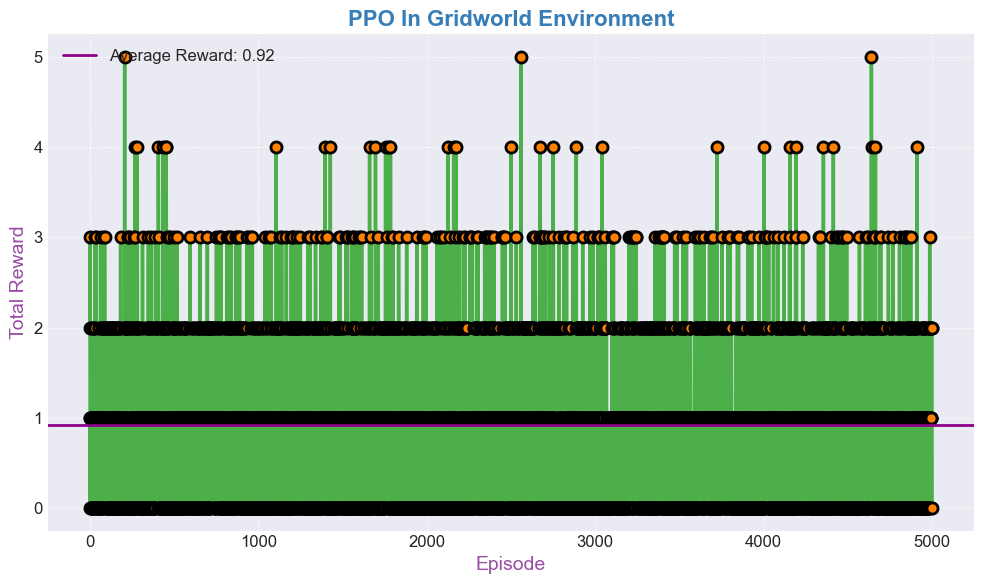

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.distributions import Categorical

# Actor-Critic Model
class ActorCritic(nn.Module):
    def __init__(self, state_dim, action_dim, hidden_size=128):  # Reduced hidden size
        super(ActorCritic, self).__init__()
        self.fc = nn.Linear(state_dim, hidden_size)
        self.actor = nn.Linear(hidden_size, action_dim)
        self.critic = nn.Linear(hidden_size, 1)

    def forward(self, state):
        x = torch.relu(self.fc(state))
        action_probs = torch.softmax(self.actor(x), dim=-1)
        value = self.critic(x)
        return action_probs, value

# SAC Agent
class SACAgent:
    def __init__(self, state_dim, action_dim, hidden_size=256, lr=3e-4, gamma=0.99, alpha=0.2):
        self.actor_critic = ActorCritic(state_dim, action_dim, hidden_size)
        self.optimizer = optim.Adam(self.actor_critic.parameters(), lr=lr)
        self.gamma = gamma
        self.alpha = alpha

    def select_action(self, state):
        state = torch.FloatTensor(state).unsqueeze(0)
        with torch.no_grad():
            action_probs, _ = self.actor_critic(state)
        action_dist = Categorical(action_probs)
        action = action_dist.sample()
        return action.item()

    def update_parameters(self, state, action, reward, next_state, done):
        state = torch.FloatTensor(state).unsqueeze(0)
        action = torch.tensor([action])
        reward = torch.tensor([reward], dtype=torch.float32)
        next_state = torch.FloatTensor(next_state).unsqueeze(0)
        done = torch.tensor([done], dtype=torch.float32)

        action_probs, state_value = self.actor_critic(state)
        _, next_state_value = self.actor_critic(next_state)
        action_log_prob = torch.log(action_probs.squeeze(0)[action])

        target_value = reward + self.gamma * next_state_value * (1 - done)
        advantage = target_value - state_value

        actor_loss = -action_log_prob * advantage.detach()
        critic_loss = 0.5 * advantage.pow(2)

        loss = actor_loss + critic_loss - self.alpha * action_log_prob

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

# Environment Interaction Function
def run_environment(agent, env, num_episodes, early_termination_threshold=200):
    episode_rewards = []  # List to store total rewards per episode

    for episode in range(num_episodes):
        state = env.reset().flatten()
        total_reward = 0
        step_count = 0  # Track the number of steps

        while True:
            action = agent.select_action(state)
            next_state, reward, done, _ = env.step(action)
            next_state = next_state.flatten()
            agent.update_parameters(state, action, reward, next_state, done)
            state = next_state
            total_reward += reward
            step_count += 1

            if step_count >= env.max_steps or (step_count > early_termination_threshold and total_reward < 1):
                print(f"Early termination at Episode {episode + 1}")
                break

            if done:
                break

        episode_rewards.append(total_reward)
        print(f"Episode: {episode + 1}, Total Reward: {total_reward}")

        if episode % 10 == 0:  # Debugging output every 10 episodes
            print(f"Debug: Episode {episode + 1}, Step {step_count}, Total Reward: {total_reward}")

    return episode_rewards

# Main Execution
env = WarehouseEnv(size=10, num_boxes=10, max_steps=max_steps_per_episode)
rewards = run_environment(agent, env, num_episodes=5000)
plot_rewards(rewards)

C:\Northeastern\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Northeastern\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Northeastern\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Northeastern\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

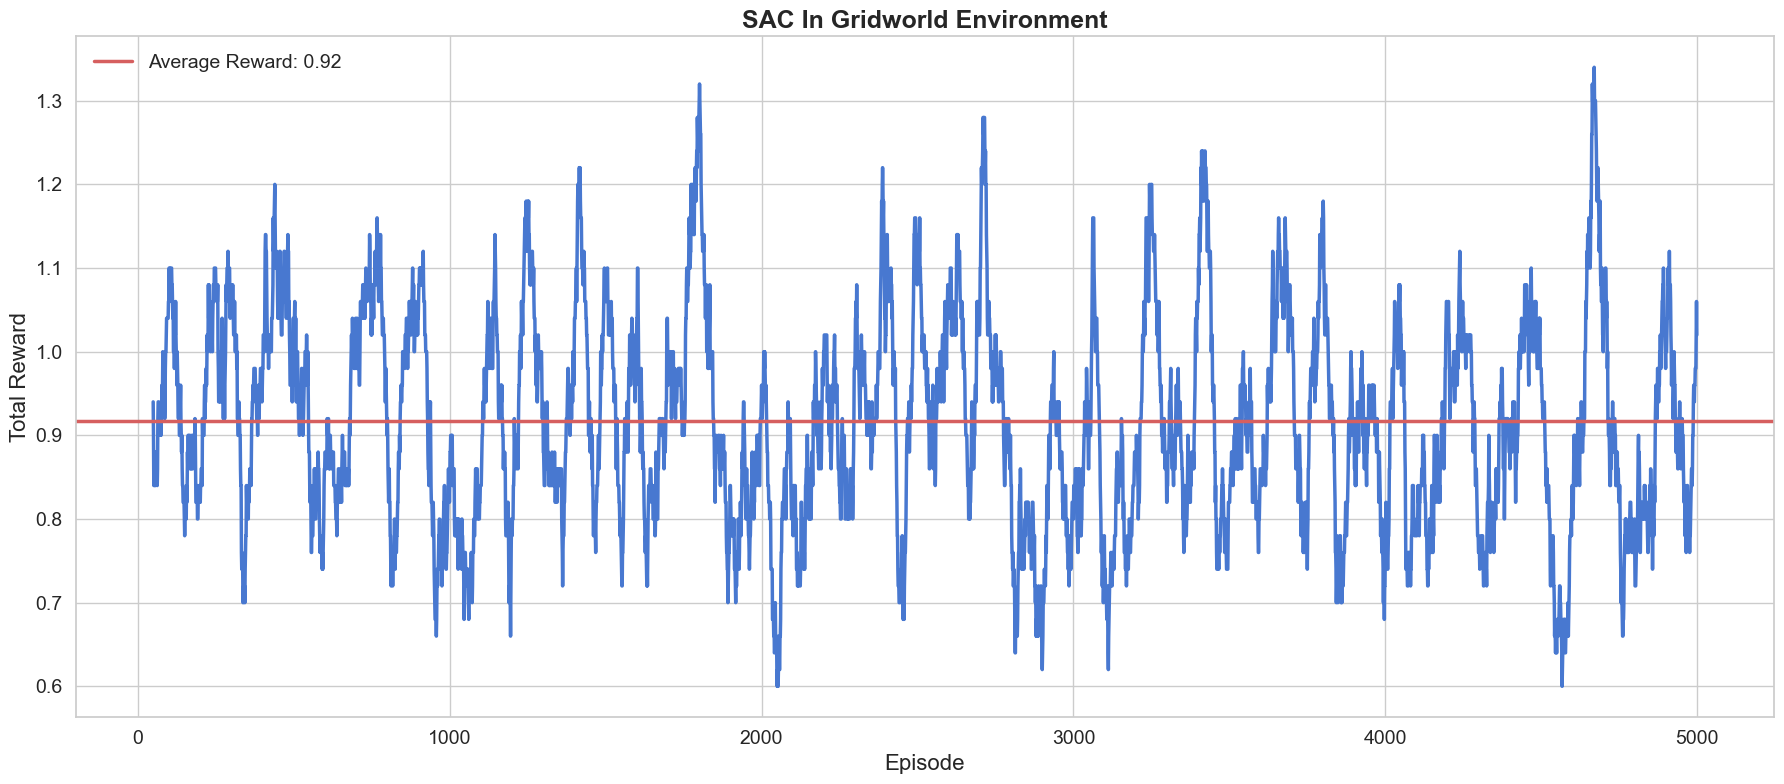

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

np.random.seed(42)  

# Convert rewards to DataFrame for rolling window calculation
df_rewards = pd.DataFrame(rewards, columns=['Reward'])

# Calculate rolling average with a window of 50 episodes
rolling_avg_reward = df_rewards['Reward'].rolling(window=50).mean()

sns.set(style="whitegrid", palette="muted", color_codes=True)
plt.figure(figsize=(18, 8))  # Set the figure size

sns.lineplot(data=rolling_avg_reward, lw=2.5, color='b')

# Title and labels
plt.title("SAC In Gridworld Environment", fontsize=18, fontweight='bold')
plt.xlabel("Episode", fontsize=16)
plt.ylabel("Total Reward", fontsize=16)

# Setting the size for tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

avg_reward = sum(rewards) / len(rewards)
plt.axhline(y=avg_reward, color='r', linestyle='-', linewidth=2.5, label=f'Average Reward: {avg_reward:.2f}')
plt.legend(fontsize=14, loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
class PPOA:
    def __init__(self, state_dim, action_dim):
        self.state_dim = state_dim
        self.action_dim = action_dim
        self.actor = Actor(self.state_dim, self.action_dim)
        self.critic = Critic(self.state_dim)
        self.actor_optimizer = optim.Adam(self.actor.parameters(), lr=1e-3)
        self.critic_optimizer = optim.Adam(self.critic.parameters(), lr=1e-3)
        self.eps_clip = 0.2
        self.gamma = 0.99

    def select_action(self, state):
        state = torch.from_numpy(state).float().unsqueeze(0)
        probs = self.actor(state)
        dist = torch.distributions.Categorical(probs)
        action = dist.sample()
        return action.item(), dist.log_prob(action)

    def update(self, memory):
        for _ in range(5):  # Update multiple times per batch
            for states, actions, old_log_probs, rewards, next_states, dones in memory.generate_batches():
                states = torch.tensor(states, dtype=torch.float)
                actions = torch.tensor(actions).long()  # Ensure actions are long tensors
                old_log_probs = torch.tensor(old_log_probs, dtype=torch.float)
                rewards = torch.tensor(rewards, dtype=torch.float)
                next_states = torch.tensor(next_states, dtype=torch.float)
                dones = torch.tensor(dones, dtype=torch.float)

                # Critic loss
                critic_values = self.critic(states)
                target_values = rewards + self.gamma * self.critic(next_states).detach() * (1 - dones)
                critic_loss = (target_values - critic_values).pow(2).mean()

                # Actor loss
                probs = self.actor(states)
                dist = torch.distributions.Categorical(probs)
                new_log_probs = dist.log_prob(actions)
                ratios = torch.exp(new_log_probs - old_log_probs)
                advantages = target_values - critic_values.detach()
                # Optionally normalize advantages here
                surr1 = ratios * advantages
                surr2 = torch.clamp(ratios, 1-self.eps_clip, 1+self.eps_clip) * advantages
                actor_loss = -torch.min(surr1, surr2).mean()

                # Update networks
                self.actor_optimizer.zero_grad()
                actor_loss.backward()
                self.actor_optimizer.step()

                self.critic_optimizer.zero_grad()
                critic_loss.backward()
                self.critic_optimizer.step()

In [ ]:
import numpy as np

class Memory:
    def __init__(self, batch_size=5):
        self.states = []
        self.actions = []
        self.log_probs = []
        self.rewards = []
        self.next_states = []
        self.dones = []
        self.batch_size = batch_size

    def add(self, state, action, log_prob, reward, next_state, done):
        self.states.append(state)
        self.actions.append(action)
        self.log_probs.append(log_prob)
        self.rewards.append(reward)
        self.next_states.append(next_state)
        self.dones.append(done)

    def generate_batches(self):
        n_states = len(self.states)
        for _ in range(n_states // self.batch_size):
            idx = np.random.choice(n_states, self.batch_size, replace=False)
            yield [self.states[i] for i in idx], [self.actions[i] for i in idx], [self.log_probs[i] for i in idx], [self.rewards[i] for i in idx], [self.next_states[i] for i in idx], [self.dones[i] for i in idx]

    def clear(self):
        self.states = []
        self.actions = []
        self.log_probs = []
        self.rewards = []
        self.next_states = []
        self.dones = []

In [ ]:
def traine(env, ppo, episodes=1000, max_timesteps=200):
    memory = Memory()
    episode_rewards = []

    for episode in range(episodes):
        state = env.reset().flatten()
        total_reward = 0

        for t in range(max_timesteps):
            action, log_prob = ppo.select_action(state)
            next_state, reward, done, _ = env.step(Action(action))  # Unpack all returned values
            next_state = next_state.flatten()

            memory.add(state, action, log_prob, reward, next_state, done)
            state = next_state
            total_reward += reward

            if done:  # Check if the episode is done
                break

            if reward == 1:  # If a box is picked up
                ppo.update(memory)
                memory.clear()

        episode_rewards.append(total_reward)
        print(f"Episode: {episode}, Total Reward: {total_reward}")

    return episode_rewards


In [ ]:
env = WarehouseEnv()
state_dim = 100  # Assuming a flat state space of size 100
action_dim = 4
ppo_agent = PPOA(state_dim, action_dim)
# Train the agent
rewards = traine(env, ppo_agent, episodes=500, max_timesteps=200)

# Plot the rewards
plot_rewards(rewards)

In [6]:
import gym
from gym import spaces
import numpy as np
import random
from typing import List, Tuple

MAZE_H, MAZE_W, UNIT = 20, 20, 40  # Grid height, width, and size of each unit

class Action(IntEnum):
    LEFT = 0
    DOWN = 1
    RIGHT = 2
    UP = 3

def actions_to_dxdy(action: Action) -> Tuple[int, int]:
    mapping = {
        0: (0, -1),  # up
        1: (0, 1),   # down
        2: (-1, 0),  # left
        3: (1, 0),   # right
        4: (0, 0),   # wait (no movement)
    }
    return mapping.get(action, (0, 0)) 
    return mapping[action]

class MazeEnv(gym.Env):
    def __init__(self):
        super(MazeEnv, self).__init__()
        self.action_space = spaces.Discrete(5)  # 4 directions + wait
        self.observation_space = spaces.Box(low=0, high=255,
                                            shape=(MAZE_H, MAZE_W, 3),
                                            dtype=np.uint8)
        self.state = None
        self.robot_position = None
        self.boxes = None
        self.num_boxes = 5  # Number of boxes to collect
        self.size = MAZE_H
        self.reset()

    def reset(self):
        self.robot_position = (0, 0)
        self.boxes = self._generate_boxes()
        self._build_maze()
        return self._get_state()

    def _build_maze(self):
        # Initialize the state with zeros (or any other representation of the maze)
        self.state = np.zeros((self.size, self.size, 3), dtype=np.uint8)
        # Add maze structure here (walls, shelves, etc.)

    def _generate_boxes(self) -> List[Tuple[int, int]]:
        boxes = []
        while len(boxes) < self.num_boxes:
            box_position = (random.randint(0, self.size - 1), random.randint(0, self.size - 1))
            if box_position not in boxes and box_position != self.robot_position:
                boxes.append(box_position)
        return boxes

    def _get_state(self):
        # Update the state representation with the robot and boxes
        state = np.copy(self.state)
        x, y = self.robot_position
        state[x, y, :] = [255, 0, 0]  # Represent the robot with a red color
        for bx, by in self.boxes:
            state[bx, by, :] = [0, 255, 0]  # Represent boxes with a green color
        return state

    def step(self, action: Action):
        # Convert action to movement
        dx, dy = actions_to_dxdy(action)
        new_x, new_y = self.robot_position[0] + dx, self.robot_position[1] + dy

        # Check for boundaries
        if 0 <= new_x < self.size and 0 <= new_y < self.size:
            self.robot_position = (new_x, new_y)
        
        # Check for box collection
        reward = 0
        if self.robot_position in self.boxes:
            self.boxes.remove(self.robot_position)
            reward = 1  # Reward for picking up a box

        # Update the state
        self._get_state()

        # Check if all boxes are collected
        done = len(self.boxes) == 0
        return self.state, reward, done, {}

    def render(self, mode='human', close=False):
        # Implement a basic rendering of the maze
        if mode == 'human':
            # You can print the state or create a more advanced visualization
            print(self._get_state())

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

class Actor(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(Actor, self).__init__()
        # Assuming state_dim is a flattened version of the state
        self.fc = nn.Sequential(
            nn.Linear(state_dim, 64),
            nn.ReLU(),
            nn.Linear(64, action_dim),
            nn.Softmax(dim=-1)
        )

    def forward(self, x):
        # Flatten the state if it's a 2D grid or image
        x = x.flatten(start_dim=1) if x.dim() > 2 else x
        return self.fc(x)

class Critic(nn.Module):
    def __init__(self, state_dim):
        super(Critic, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(state_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        # Flatten the state if it's a 2D grid or image
        x = x.flatten(start_dim=1) if x.dim() > 2 else x
        return self.fc(x)

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np


class PPO:
    def __init__(self, state_dim, action_dim):
        self.state_dim = state_dim
        self.action_dim = action_dim
        self.actor = Actor(self.state_dim, self.action_dim)
        self.critic = Critic(self.state_dim)
        self.actor_optimizer = optim.Adam(self.actor.parameters(), lr=1e-3)
        self.critic_optimizer = optim.Adam(self.critic.parameters(), lr=1e-3)
        self.eps_clip = 0.2
        self.gamma = 0.99

    def select_action(self, state):
        state = torch.from_numpy(state).float().unsqueeze(0)
        probs = self.actor(state)
        dist = torch.distributions.Categorical(probs)
        action = dist.sample()
        return action.item(), dist.log_prob(action)


    def update(self, memory):
        for _ in range(5):  # Number of update iterations
            for states, actions, old_log_probs, rewards, next_states, dones in memory.generate_batches():
                states = torch.tensor(states, dtype=torch.float)
                actions = torch.tensor(actions, dtype=torch.long)
                old_log_probs = torch.tensor(old_log_probs, dtype=torch.float)
                rewards = torch.tensor(rewards, dtype=torch.float)
                next_states = torch.tensor(next_states, dtype=torch.float)
                dones = torch.tensor(dones, dtype=torch.float)

                # Calculate critic values and target values
                critic_values = self.critic(states).squeeze()
                next_critic_values = self.critic(next_states).squeeze().detach()
                target_values = rewards + self.gamma * next_critic_values * (1 - dones)

                # Calculate advantages and actor loss
                advantages = target_values - critic_values.detach()
                actor_loss = self.compute_actor_loss(states, actions, old_log_probs, advantages)

                # Update actor network
                self.actor_optimizer.zero_grad()
                actor_loss.backward()
                self.actor_optimizer.step()

                # Compute and update critic network
                critic_loss = (target_values - critic_values).pow(2).mean()
                self.critic_optimizer.zero_grad()
                critic_loss.backward()
                self.critic_optimizer.step()

    def compute_actor_loss(self, states, actions, old_log_probs, advantages):
        probs = self.actor(states)
        dist = torch.distributions.Categorical(probs)
        new_log_probs = dist.log_prob(actions)
        ratios = torch.exp(new_log_probs - old_log_probs)
        surr1 = ratios * advantages
        surr2 = torch.clamp(ratios, 1-self.eps_clip, 1+self.eps_clip) * advantages
        actor_loss = -torch.min(surr1, surr2).mean()
        return actor_loss


In [3]:
import numpy as np

class Memory:
    def __init__(self, batch_size=5):
        self.states = []
        self.actions = []
        self.log_probs = []
        self.rewards = []
        self.next_states = []
        self.dones = []
        self.batch_size = batch_size

    def add(self, state, action, log_prob, reward, next_state, done):
        self.states.append(state)
        self.actions.append(action)
        self.log_probs.append(log_prob)
        self.rewards.append(reward)
        self.next_states.append(next_state)
        self.dones.append(done)

    def generate_batches(self):
        n_states = len(self.states)
        if n_states >= self.batch_size:
            indices = np.arange(n_states)
            np.random.shuffle(indices)
            batch_starts = np.arange(0, n_states, self.batch_size)
            for start in batch_starts:
                batch_indices = indices[start:start + self.batch_size]
                yield (np.array([self.states[i] for i in batch_indices]),
                       np.array([self.actions[i] for i in batch_indices]),
                       np.array([self.log_probs[i].detach().numpy() if isinstance(self.log_probs[i], torch.Tensor) else self.log_probs[i] for i in batch_indices]),
                       np.array([self.rewards[i] for i in batch_indices]),
                       np.array([self.next_states[i] for i in batch_indices]),
                       np.array([self.dones[i] for i in batch_indices]))


    def clear(self):
        self.states = []
        self.actions = []
        self.log_probs = []
        self.rewards = []
        self.next_states = []
        self.dones = []

In [4]:
def train(env, ppo, episodes=1000, max_timesteps=200, update_timestep=2000):
    memory = Memory()
    episode_rewards = []
    timestep = 0

    for episode in range(episodes):
        state = env.reset().flatten()
        total_reward = 0

        for t in range(max_timesteps):
            timestep += 1
            action, log_prob = ppo.select_action(state)
            next_state, reward, done, _ = env.step(action)  # Ensure this matches your environment's expected format
            next_state = next_state.flatten()

            memory.add(state, action, log_prob, reward, next_state, done)

            state = next_state
            total_reward += reward

            if timestep % update_timestep == 0:
                ppo.update(memory)
                memory.clear()

            if done:
                break

        episode_rewards.append(total_reward)
        print(f"Episode: {episode}, Total Reward: {total_reward}")

    return episode_rewards

Episode: 0, Total Reward: 1
Episode: 1, Total Reward: 3
Episode: 2, Total Reward: 1
Episode: 3, Total Reward: 3
Episode: 4, Total Reward: 0
Episode: 5, Total Reward: 1
Episode: 6, Total Reward: 2
Episode: 7, Total Reward: 2
Episode: 8, Total Reward: 3
Episode: 9, Total Reward: 0
Episode: 10, Total Reward: 1
Episode: 11, Total Reward: 1
Episode: 12, Total Reward: 3
Episode: 13, Total Reward: 1
Episode: 14, Total Reward: 2
Episode: 15, Total Reward: 2
Episode: 16, Total Reward: 4
Episode: 17, Total Reward: 1
Episode: 18, Total Reward: 1
Episode: 19, Total Reward: 2
Episode: 20, Total Reward: 2
Episode: 21, Total Reward: 3
Episode: 22, Total Reward: 0
Episode: 23, Total Reward: 1
Episode: 24, Total Reward: 1
Episode: 25, Total Reward: 2
Episode: 26, Total Reward: 0
Episode: 27, Total Reward: 4
Episode: 28, Total Reward: 2
Episode: 29, Total Reward: 1
Episode: 30, Total Reward: 5
Episode: 31, Total Reward: 4
Episode: 32, Total Reward: 3
Episode: 33, Total Reward: 1
Episode: 34, Total Rewar

Episode: 277, Total Reward: 2
Episode: 278, Total Reward: 1
Episode: 279, Total Reward: 2
Episode: 280, Total Reward: 3
Episode: 281, Total Reward: 0
Episode: 282, Total Reward: 3
Episode: 283, Total Reward: 4
Episode: 284, Total Reward: 3
Episode: 285, Total Reward: 1
Episode: 286, Total Reward: 3
Episode: 287, Total Reward: 0
Episode: 288, Total Reward: 4
Episode: 289, Total Reward: 1
Episode: 290, Total Reward: 1
Episode: 291, Total Reward: 2
Episode: 292, Total Reward: 2
Episode: 293, Total Reward: 2
Episode: 294, Total Reward: 4
Episode: 295, Total Reward: 2
Episode: 296, Total Reward: 1
Episode: 297, Total Reward: 4
Episode: 298, Total Reward: 3
Episode: 299, Total Reward: 2
Episode: 300, Total Reward: 0
Episode: 301, Total Reward: 2
Episode: 302, Total Reward: 0
Episode: 303, Total Reward: 2
Episode: 304, Total Reward: 0
Episode: 305, Total Reward: 2
Episode: 306, Total Reward: 0
Episode: 307, Total Reward: 1
Episode: 308, Total Reward: 1
Episode: 309, Total Reward: 2
Episode: 3

Episode: 551, Total Reward: 1
Episode: 552, Total Reward: 1
Episode: 553, Total Reward: 6
Episode: 554, Total Reward: 1
Episode: 555, Total Reward: 0
Episode: 556, Total Reward: 1
Episode: 557, Total Reward: 0
Episode: 558, Total Reward: 4
Episode: 559, Total Reward: 3
Episode: 560, Total Reward: 0
Episode: 561, Total Reward: 2
Episode: 562, Total Reward: 3
Episode: 563, Total Reward: 2
Episode: 564, Total Reward: 1
Episode: 565, Total Reward: 4
Episode: 566, Total Reward: 3
Episode: 567, Total Reward: 2
Episode: 568, Total Reward: 2
Episode: 569, Total Reward: 2
Episode: 570, Total Reward: 1
Episode: 571, Total Reward: 3
Episode: 572, Total Reward: 2
Episode: 573, Total Reward: 2
Episode: 574, Total Reward: 0
Episode: 575, Total Reward: 0
Episode: 576, Total Reward: 2
Episode: 577, Total Reward: 2
Episode: 578, Total Reward: 2
Episode: 579, Total Reward: 4
Episode: 580, Total Reward: 2
Episode: 581, Total Reward: 3
Episode: 582, Total Reward: 2
Episode: 583, Total Reward: 1
Episode: 5

Episode: 825, Total Reward: 3
Episode: 826, Total Reward: 3
Episode: 827, Total Reward: 3
Episode: 828, Total Reward: 2
Episode: 829, Total Reward: 2
Episode: 830, Total Reward: 2
Episode: 831, Total Reward: 1
Episode: 832, Total Reward: 4
Episode: 833, Total Reward: 1
Episode: 834, Total Reward: 2
Episode: 835, Total Reward: 2
Episode: 836, Total Reward: 1
Episode: 837, Total Reward: 1
Episode: 838, Total Reward: 2
Episode: 839, Total Reward: 0
Episode: 840, Total Reward: 4
Episode: 841, Total Reward: 1
Episode: 842, Total Reward: 1
Episode: 843, Total Reward: 0
Episode: 844, Total Reward: 1
Episode: 845, Total Reward: 3
Episode: 846, Total Reward: 0
Episode: 847, Total Reward: 2
Episode: 848, Total Reward: 3
Episode: 849, Total Reward: 2
Episode: 850, Total Reward: 2
Episode: 851, Total Reward: 0
Episode: 852, Total Reward: 2
Episode: 853, Total Reward: 3
Episode: 854, Total Reward: 1
Episode: 855, Total Reward: 1
Episode: 856, Total Reward: 3
Episode: 857, Total Reward: 1
Episode: 8

Episode: 1095, Total Reward: 3
Episode: 1096, Total Reward: 1
Episode: 1097, Total Reward: 1
Episode: 1098, Total Reward: 1
Episode: 1099, Total Reward: 2
Episode: 1100, Total Reward: 2
Episode: 1101, Total Reward: 1
Episode: 1102, Total Reward: 1
Episode: 1103, Total Reward: 4
Episode: 1104, Total Reward: 1
Episode: 1105, Total Reward: 2
Episode: 1106, Total Reward: 5
Episode: 1107, Total Reward: 5
Episode: 1108, Total Reward: 1
Episode: 1109, Total Reward: 3
Episode: 1110, Total Reward: 3
Episode: 1111, Total Reward: 3
Episode: 1112, Total Reward: 3
Episode: 1113, Total Reward: 3
Episode: 1114, Total Reward: 2
Episode: 1115, Total Reward: 1
Episode: 1116, Total Reward: 2
Episode: 1117, Total Reward: 1
Episode: 1118, Total Reward: 2
Episode: 1119, Total Reward: 4
Episode: 1120, Total Reward: 3
Episode: 1121, Total Reward: 1
Episode: 1122, Total Reward: 4
Episode: 1123, Total Reward: 2
Episode: 1124, Total Reward: 2
Episode: 1125, Total Reward: 1
Episode: 1126, Total Reward: 3
Episode:

Episode: 1361, Total Reward: 3
Episode: 1362, Total Reward: 4
Episode: 1363, Total Reward: 0
Episode: 1364, Total Reward: 1
Episode: 1365, Total Reward: 1
Episode: 1366, Total Reward: 1
Episode: 1367, Total Reward: 3
Episode: 1368, Total Reward: 0
Episode: 1369, Total Reward: 1
Episode: 1370, Total Reward: 4
Episode: 1371, Total Reward: 3
Episode: 1372, Total Reward: 0
Episode: 1373, Total Reward: 1
Episode: 1374, Total Reward: 1
Episode: 1375, Total Reward: 0
Episode: 1376, Total Reward: 2
Episode: 1377, Total Reward: 2
Episode: 1378, Total Reward: 2
Episode: 1379, Total Reward: 2
Episode: 1380, Total Reward: 4
Episode: 1381, Total Reward: 1
Episode: 1382, Total Reward: 2
Episode: 1383, Total Reward: 2
Episode: 1384, Total Reward: 1
Episode: 1385, Total Reward: 3
Episode: 1386, Total Reward: 4
Episode: 1387, Total Reward: 5
Episode: 1388, Total Reward: 1
Episode: 1389, Total Reward: 3
Episode: 1390, Total Reward: 0
Episode: 1391, Total Reward: 3
Episode: 1392, Total Reward: 0
Episode:

Episode: 1627, Total Reward: 1
Episode: 1628, Total Reward: 0
Episode: 1629, Total Reward: 2
Episode: 1630, Total Reward: 0
Episode: 1631, Total Reward: 2
Episode: 1632, Total Reward: 1
Episode: 1633, Total Reward: 1
Episode: 1634, Total Reward: 3
Episode: 1635, Total Reward: 1
Episode: 1636, Total Reward: 1
Episode: 1637, Total Reward: 1
Episode: 1638, Total Reward: 2
Episode: 1639, Total Reward: 0
Episode: 1640, Total Reward: 0
Episode: 1641, Total Reward: 2
Episode: 1642, Total Reward: 1
Episode: 1643, Total Reward: 2
Episode: 1644, Total Reward: 2
Episode: 1645, Total Reward: 0
Episode: 1646, Total Reward: 2
Episode: 1647, Total Reward: 1
Episode: 1648, Total Reward: 4
Episode: 1649, Total Reward: 0
Episode: 1650, Total Reward: 2
Episode: 1651, Total Reward: 1
Episode: 1652, Total Reward: 0
Episode: 1653, Total Reward: 1
Episode: 1654, Total Reward: 2
Episode: 1655, Total Reward: 1
Episode: 1656, Total Reward: 2
Episode: 1657, Total Reward: 1
Episode: 1658, Total Reward: 2
Episode:

Episode: 1893, Total Reward: 2
Episode: 1894, Total Reward: 2
Episode: 1895, Total Reward: 2
Episode: 1896, Total Reward: 0
Episode: 1897, Total Reward: 1
Episode: 1898, Total Reward: 2
Episode: 1899, Total Reward: 2
Episode: 1900, Total Reward: 2
Episode: 1901, Total Reward: 2
Episode: 1902, Total Reward: 2
Episode: 1903, Total Reward: 2
Episode: 1904, Total Reward: 2
Episode: 1905, Total Reward: 4
Episode: 1906, Total Reward: 3
Episode: 1907, Total Reward: 2
Episode: 1908, Total Reward: 1
Episode: 1909, Total Reward: 2
Episode: 1910, Total Reward: 3
Episode: 1911, Total Reward: 3
Episode: 1912, Total Reward: 1
Episode: 1913, Total Reward: 0
Episode: 1914, Total Reward: 2
Episode: 1915, Total Reward: 0
Episode: 1916, Total Reward: 0
Episode: 1917, Total Reward: 3
Episode: 1918, Total Reward: 3
Episode: 1919, Total Reward: 2
Episode: 1920, Total Reward: 2
Episode: 1921, Total Reward: 3
Episode: 1922, Total Reward: 2
Episode: 1923, Total Reward: 2
Episode: 1924, Total Reward: 2
Episode:

Episode: 2158, Total Reward: 0
Episode: 2159, Total Reward: 2
Episode: 2160, Total Reward: 4
Episode: 2161, Total Reward: 2
Episode: 2162, Total Reward: 3
Episode: 2163, Total Reward: 5
Episode: 2164, Total Reward: 2
Episode: 2165, Total Reward: 2
Episode: 2166, Total Reward: 2
Episode: 2167, Total Reward: 3
Episode: 2168, Total Reward: 1
Episode: 2169, Total Reward: 2
Episode: 2170, Total Reward: 0
Episode: 2171, Total Reward: 2
Episode: 2172, Total Reward: 3
Episode: 2173, Total Reward: 3
Episode: 2174, Total Reward: 0
Episode: 2175, Total Reward: 2
Episode: 2176, Total Reward: 1
Episode: 2177, Total Reward: 0
Episode: 2178, Total Reward: 2
Episode: 2179, Total Reward: 2
Episode: 2180, Total Reward: 0
Episode: 2181, Total Reward: 2
Episode: 2182, Total Reward: 1
Episode: 2183, Total Reward: 2
Episode: 2184, Total Reward: 2
Episode: 2185, Total Reward: 2
Episode: 2186, Total Reward: 1
Episode: 2187, Total Reward: 4
Episode: 2188, Total Reward: 2
Episode: 2189, Total Reward: 0
Episode:

Episode: 2424, Total Reward: 0
Episode: 2425, Total Reward: 2
Episode: 2426, Total Reward: 2
Episode: 2427, Total Reward: 0
Episode: 2428, Total Reward: 1
Episode: 2429, Total Reward: 0
Episode: 2430, Total Reward: 4
Episode: 2431, Total Reward: 0
Episode: 2432, Total Reward: 3
Episode: 2433, Total Reward: 3
Episode: 2434, Total Reward: 1
Episode: 2435, Total Reward: 2
Episode: 2436, Total Reward: 1
Episode: 2437, Total Reward: 1
Episode: 2438, Total Reward: 3
Episode: 2439, Total Reward: 0
Episode: 2440, Total Reward: 3
Episode: 2441, Total Reward: 2
Episode: 2442, Total Reward: 3
Episode: 2443, Total Reward: 0
Episode: 2444, Total Reward: 0
Episode: 2445, Total Reward: 1
Episode: 2446, Total Reward: 2
Episode: 2447, Total Reward: 2
Episode: 2448, Total Reward: 1
Episode: 2449, Total Reward: 0
Episode: 2450, Total Reward: 1
Episode: 2451, Total Reward: 1
Episode: 2452, Total Reward: 3
Episode: 2453, Total Reward: 2
Episode: 2454, Total Reward: 2
Episode: 2455, Total Reward: 2
Episode:

Episode: 2689, Total Reward: 6
Episode: 2690, Total Reward: 1
Episode: 2691, Total Reward: 1
Episode: 2692, Total Reward: 2
Episode: 2693, Total Reward: 2
Episode: 2694, Total Reward: 1
Episode: 2695, Total Reward: 5
Episode: 2696, Total Reward: 2
Episode: 2697, Total Reward: 4
Episode: 2698, Total Reward: 1
Episode: 2699, Total Reward: 1
Episode: 2700, Total Reward: 2
Episode: 2701, Total Reward: 0
Episode: 2702, Total Reward: 0
Episode: 2703, Total Reward: 0
Episode: 2704, Total Reward: 4
Episode: 2705, Total Reward: 0
Episode: 2706, Total Reward: 2
Episode: 2707, Total Reward: 0
Episode: 2708, Total Reward: 3
Episode: 2709, Total Reward: 1
Episode: 2710, Total Reward: 3
Episode: 2711, Total Reward: 1
Episode: 2712, Total Reward: 0
Episode: 2713, Total Reward: 2
Episode: 2714, Total Reward: 2
Episode: 2715, Total Reward: 3
Episode: 2716, Total Reward: 2
Episode: 2717, Total Reward: 2
Episode: 2718, Total Reward: 1
Episode: 2719, Total Reward: 2
Episode: 2720, Total Reward: 2
Episode:

Episode: 2955, Total Reward: 0
Episode: 2956, Total Reward: 2
Episode: 2957, Total Reward: 3
Episode: 2958, Total Reward: 2
Episode: 2959, Total Reward: 1
Episode: 2960, Total Reward: 0
Episode: 2961, Total Reward: 2
Episode: 2962, Total Reward: 3
Episode: 2963, Total Reward: 1
Episode: 2964, Total Reward: 2
Episode: 2965, Total Reward: 2
Episode: 2966, Total Reward: 1
Episode: 2967, Total Reward: 1
Episode: 2968, Total Reward: 0
Episode: 2969, Total Reward: 1
Episode: 2970, Total Reward: 2
Episode: 2971, Total Reward: 0
Episode: 2972, Total Reward: 3
Episode: 2973, Total Reward: 3
Episode: 2974, Total Reward: 1
Episode: 2975, Total Reward: 2
Episode: 2976, Total Reward: 1
Episode: 2977, Total Reward: 2
Episode: 2978, Total Reward: 0
Episode: 2979, Total Reward: 1
Episode: 2980, Total Reward: 3
Episode: 2981, Total Reward: 2
Episode: 2982, Total Reward: 2
Episode: 2983, Total Reward: 2
Episode: 2984, Total Reward: 3
Episode: 2985, Total Reward: 4
Episode: 2986, Total Reward: 5
Episode:

Episode: 3221, Total Reward: 1
Episode: 3222, Total Reward: 3
Episode: 3223, Total Reward: 0
Episode: 3224, Total Reward: 2
Episode: 3225, Total Reward: 1
Episode: 3226, Total Reward: 1
Episode: 3227, Total Reward: 0
Episode: 3228, Total Reward: 2
Episode: 3229, Total Reward: 2
Episode: 3230, Total Reward: 3
Episode: 3231, Total Reward: 4
Episode: 3232, Total Reward: 0
Episode: 3233, Total Reward: 4
Episode: 3234, Total Reward: 2
Episode: 3235, Total Reward: 2
Episode: 3236, Total Reward: 2
Episode: 3237, Total Reward: 1
Episode: 3238, Total Reward: 3
Episode: 3239, Total Reward: 2
Episode: 3240, Total Reward: 5
Episode: 3241, Total Reward: 2
Episode: 3242, Total Reward: 1
Episode: 3243, Total Reward: 3
Episode: 3244, Total Reward: 2
Episode: 3245, Total Reward: 3
Episode: 3246, Total Reward: 3
Episode: 3247, Total Reward: 2
Episode: 3248, Total Reward: 4
Episode: 3249, Total Reward: 2
Episode: 3250, Total Reward: 2
Episode: 3251, Total Reward: 2
Episode: 3252, Total Reward: 3
Episode:

Episode: 3487, Total Reward: 3
Episode: 3488, Total Reward: 1
Episode: 3489, Total Reward: 3
Episode: 3490, Total Reward: 1
Episode: 3491, Total Reward: 2
Episode: 3492, Total Reward: 2
Episode: 3493, Total Reward: 3
Episode: 3494, Total Reward: 4
Episode: 3495, Total Reward: 0
Episode: 3496, Total Reward: 2
Episode: 3497, Total Reward: 0
Episode: 3498, Total Reward: 2
Episode: 3499, Total Reward: 4
Episode: 3500, Total Reward: 2
Episode: 3501, Total Reward: 2
Episode: 3502, Total Reward: 3
Episode: 3503, Total Reward: 4
Episode: 3504, Total Reward: 0
Episode: 3505, Total Reward: 4
Episode: 3506, Total Reward: 2
Episode: 3507, Total Reward: 1
Episode: 3508, Total Reward: 3
Episode: 3509, Total Reward: 3
Episode: 3510, Total Reward: 3
Episode: 3511, Total Reward: 2
Episode: 3512, Total Reward: 2
Episode: 3513, Total Reward: 1
Episode: 3514, Total Reward: 1
Episode: 3515, Total Reward: 1
Episode: 3516, Total Reward: 2
Episode: 3517, Total Reward: 3
Episode: 3518, Total Reward: 2
Episode:

Episode: 3752, Total Reward: 4
Episode: 3753, Total Reward: 0
Episode: 3754, Total Reward: 4
Episode: 3755, Total Reward: 3
Episode: 3756, Total Reward: 2
Episode: 3757, Total Reward: 2
Episode: 3758, Total Reward: 1
Episode: 3759, Total Reward: 2
Episode: 3760, Total Reward: 3
Episode: 3761, Total Reward: 1
Episode: 3762, Total Reward: 1
Episode: 3763, Total Reward: 3
Episode: 3764, Total Reward: 2
Episode: 3765, Total Reward: 3
Episode: 3766, Total Reward: 2
Episode: 3767, Total Reward: 2
Episode: 3768, Total Reward: 1
Episode: 3769, Total Reward: 2
Episode: 3770, Total Reward: 2
Episode: 3771, Total Reward: 1
Episode: 3772, Total Reward: 0
Episode: 3773, Total Reward: 2
Episode: 3774, Total Reward: 3
Episode: 3775, Total Reward: 2
Episode: 3776, Total Reward: 0
Episode: 3777, Total Reward: 1
Episode: 3778, Total Reward: 1
Episode: 3779, Total Reward: 2
Episode: 3780, Total Reward: 3
Episode: 3781, Total Reward: 4
Episode: 3782, Total Reward: 2
Episode: 3783, Total Reward: 4
Episode:

Episode: 4017, Total Reward: 3
Episode: 4018, Total Reward: 4
Episode: 4019, Total Reward: 3
Episode: 4020, Total Reward: 2
Episode: 4021, Total Reward: 2
Episode: 4022, Total Reward: 4
Episode: 4023, Total Reward: 2
Episode: 4024, Total Reward: 2
Episode: 4025, Total Reward: 2
Episode: 4026, Total Reward: 1
Episode: 4027, Total Reward: 2
Episode: 4028, Total Reward: 2
Episode: 4029, Total Reward: 3
Episode: 4030, Total Reward: 3
Episode: 4031, Total Reward: 0
Episode: 4032, Total Reward: 5
Episode: 4033, Total Reward: 3
Episode: 4034, Total Reward: 1
Episode: 4035, Total Reward: 4
Episode: 4036, Total Reward: 1
Episode: 4037, Total Reward: 3
Episode: 4038, Total Reward: 4
Episode: 4039, Total Reward: 3
Episode: 4040, Total Reward: 2
Episode: 4041, Total Reward: 5
Episode: 4042, Total Reward: 2
Episode: 4043, Total Reward: 3
Episode: 4044, Total Reward: 1
Episode: 4045, Total Reward: 2
Episode: 4046, Total Reward: 2
Episode: 4047, Total Reward: 3
Episode: 4048, Total Reward: 1
Episode:

Episode: 4283, Total Reward: 3
Episode: 4284, Total Reward: 1
Episode: 4285, Total Reward: 7
Episode: 4286, Total Reward: 3
Episode: 4287, Total Reward: 3
Episode: 4288, Total Reward: 2
Episode: 4289, Total Reward: 1
Episode: 4290, Total Reward: 4
Episode: 4291, Total Reward: 4
Episode: 4292, Total Reward: 2
Episode: 4293, Total Reward: 1
Episode: 4294, Total Reward: 0
Episode: 4295, Total Reward: 2
Episode: 4296, Total Reward: 4
Episode: 4297, Total Reward: 2
Episode: 4298, Total Reward: 4
Episode: 4299, Total Reward: 2
Episode: 4300, Total Reward: 3
Episode: 4301, Total Reward: 1
Episode: 4302, Total Reward: 0
Episode: 4303, Total Reward: 0
Episode: 4304, Total Reward: 0
Episode: 4305, Total Reward: 3
Episode: 4306, Total Reward: 3
Episode: 4307, Total Reward: 4
Episode: 4308, Total Reward: 2
Episode: 4309, Total Reward: 1
Episode: 4310, Total Reward: 4
Episode: 4311, Total Reward: 1
Episode: 4312, Total Reward: 2
Episode: 4313, Total Reward: 2
Episode: 4314, Total Reward: 2
Episode:

Episode: 4548, Total Reward: 1
Episode: 4549, Total Reward: 5
Episode: 4550, Total Reward: 1
Episode: 4551, Total Reward: 4
Episode: 4552, Total Reward: 2
Episode: 4553, Total Reward: 3
Episode: 4554, Total Reward: 1
Episode: 4555, Total Reward: 1
Episode: 4556, Total Reward: 2
Episode: 4557, Total Reward: 1
Episode: 4558, Total Reward: 1
Episode: 4559, Total Reward: 3
Episode: 4560, Total Reward: 7
Episode: 4561, Total Reward: 2
Episode: 4562, Total Reward: 3
Episode: 4563, Total Reward: 3
Episode: 4564, Total Reward: 2
Episode: 4565, Total Reward: 2
Episode: 4566, Total Reward: 3
Episode: 4567, Total Reward: 1
Episode: 4568, Total Reward: 1
Episode: 4569, Total Reward: 1
Episode: 4570, Total Reward: 3
Episode: 4571, Total Reward: 4
Episode: 4572, Total Reward: 4
Episode: 4573, Total Reward: 2
Episode: 4574, Total Reward: 3
Episode: 4575, Total Reward: 4
Episode: 4576, Total Reward: 2
Episode: 4577, Total Reward: 2
Episode: 4578, Total Reward: 1
Episode: 4579, Total Reward: 3
Episode:

Episode: 4813, Total Reward: 1
Episode: 4814, Total Reward: 0
Episode: 4815, Total Reward: 1
Episode: 4816, Total Reward: 1
Episode: 4817, Total Reward: 2
Episode: 4818, Total Reward: 2
Episode: 4819, Total Reward: 2
Episode: 4820, Total Reward: 5
Episode: 4821, Total Reward: 1
Episode: 4822, Total Reward: 0
Episode: 4823, Total Reward: 1
Episode: 4824, Total Reward: 2
Episode: 4825, Total Reward: 2
Episode: 4826, Total Reward: 2
Episode: 4827, Total Reward: 1
Episode: 4828, Total Reward: 2
Episode: 4829, Total Reward: 2
Episode: 4830, Total Reward: 1
Episode: 4831, Total Reward: 4
Episode: 4832, Total Reward: 1
Episode: 4833, Total Reward: 1
Episode: 4834, Total Reward: 1
Episode: 4835, Total Reward: 1
Episode: 4836, Total Reward: 2
Episode: 4837, Total Reward: 2
Episode: 4838, Total Reward: 2
Episode: 4839, Total Reward: 2
Episode: 4840, Total Reward: 1
Episode: 4841, Total Reward: 2
Episode: 4842, Total Reward: 3
Episode: 4843, Total Reward: 0
Episode: 4844, Total Reward: 1
Episode:

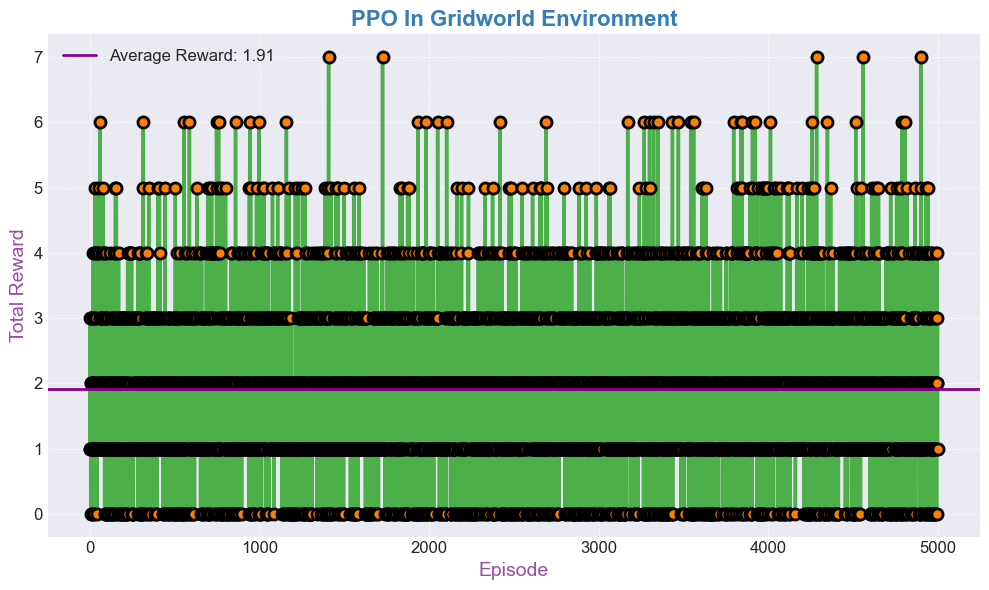

In [10]:
env = MazeEnv()
# Adjusting state_dim to match the flattened size of the environment's observation space
state_dim = MAZE_H * MAZE_W * 3  # 20 * 20 * 3 = 1200
action_dim = env.action_space.n  # Assuming 5 actions (4 directions + wait)

# Create the PPO agent with the correct state dimension
ppo_agent = PPO(state_dim, action_dim)

rewards = train(env, ppo_agent, episodes=5000, max_timesteps=200)

# Plot the rewards
plot_rewards(rewards)

C:\Northeastern\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Northeastern\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Northeastern\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Northeastern\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

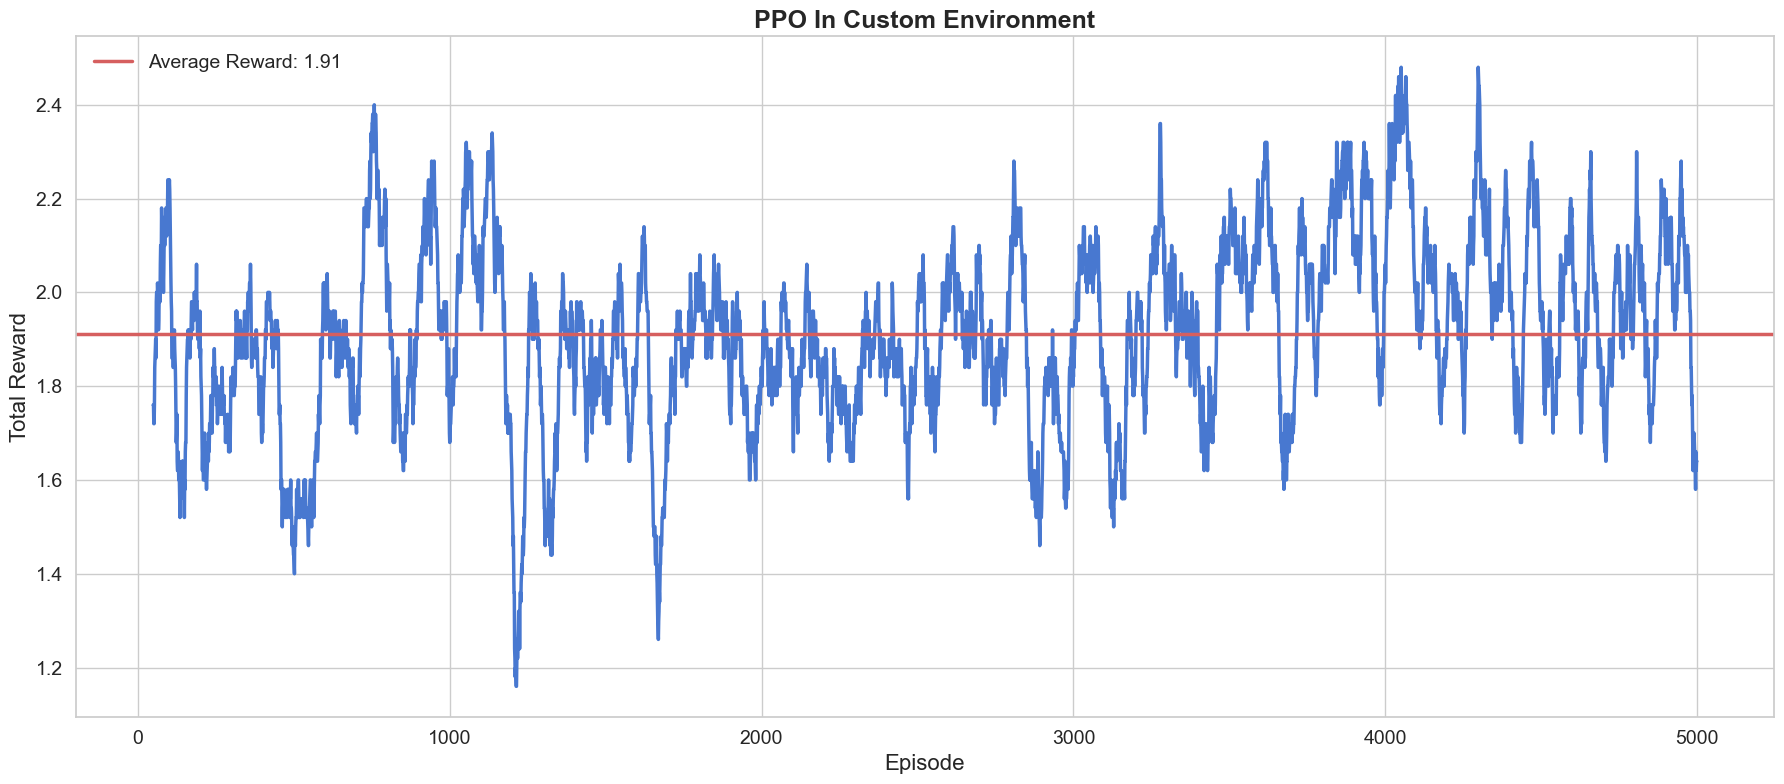

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

np.random.seed(42)  

# Convert rewards to DataFrame for rolling window calculation
df_rewards = pd.DataFrame(rewards, columns=['Reward'])

# Calculate rolling average with a window of 50 episodes
rolling_avg_reward = df_rewards['Reward'].rolling(window=50).mean()

sns.set(style="whitegrid", palette="muted", color_codes=True)
plt.figure(figsize=(18, 8))  # Set the figure size

sns.lineplot(data=rolling_avg_reward, lw=2.5, color='b')

# Title and labels
plt.title("PPO In Custom Environment", fontsize=18, fontweight='bold')
plt.xlabel("Episode", fontsize=16)
plt.ylabel("Total Reward", fontsize=16)

# Setting the size for tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

avg_reward = sum(rewards) / len(rewards)
plt.axhline(y=avg_reward, color='r', linestyle='-', linewidth=2.5, label=f'Average Reward: {avg_reward:.2f}')
plt.legend(fontsize=14, loc='upper left')

plt.tight_layout()
plt.show()

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.distributions import Categorical
import gym
from enum import IntEnum

# Actor-Critic Model
class ActorCritic(nn.Module):
    def __init__(self, state_dim, action_dim, hidden_size=256):
        super(ActorCritic, self).__init__()
        self.fc = nn.Linear(state_dim, hidden_size)
        self.actor = nn.Linear(hidden_size, action_dim)
        self.critic = nn.Linear(hidden_size, 1)

    def forward(self, state):
        x = torch.relu(self.fc(state))
        action_probs = torch.softmax(self.actor(x), dim=-1)
        value = self.critic(x)
        return action_probs, value

# SAC Agent
class SACAgent:
    def __init__(self, state_dim, action_dim, hidden_size=256, lr=3e-4, gamma=0.99, alpha=0.2):
        self.actor_critic = ActorCritic(state_dim, action_dim, hidden_size)
        self.optimizer = optim.Adam(self.actor_critic.parameters(), lr=lr)
        self.gamma = gamma
        self.alpha = alpha

    def select_action(self, state):
        state = torch.FloatTensor(state.flatten()).unsqueeze(0)
        with torch.no_grad():
            action_probs, _ = self.actor_critic(state)
        action_dist = Categorical(action_probs)
        action = action_dist.sample()
        return action.item()

    def update_parameters(self, state, action, reward, next_state, done):
        state = torch.FloatTensor(state.flatten()).unsqueeze(0)
        action = torch.tensor([action])
        reward = torch.tensor([reward], dtype=torch.float32)
        next_state = torch.FloatTensor(next_state.flatten()).unsqueeze(0)
        done = torch.tensor([done], dtype=torch.float32)

        action_probs, state_value = self.actor_critic(state)
        _, next_state_value = self.actor_critic(next_state)
        action_log_prob = torch.log(action_probs.squeeze(0)[action])

        target_value = reward + self.gamma * next_state_value * (1 - done)
        advantage = target_value - state_value

        actor_loss = -action_log_prob * advantage.detach()
        critic_loss = 0.5 * advantage.pow(2)

        loss = actor_loss + critic_loss - self.alpha * action_log_prob

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

# Environment Interaction Function
def run_environment(agent, env, num_episodes, no_progress_limit=100):
    episode_rewards = []  # Initialize the list to store rewards for each episode

    for episode in range(num_episodes):
        state = env.reset()
        total_reward = 0
        no_progress_steps = 0

        while True:
            action = agent.select_action(state)
            next_state, reward, done, _ = env.step(action)
            agent.update_parameters(state, action, reward, next_state, done)
            state = next_state
            total_reward += reward

            # Check for no progress
            if reward == 0:
                no_progress_steps += 1
                if no_progress_steps >= no_progress_limit:
                    break
            else:
                no_progress_steps = 0

            if done:
                break

        episode_rewards.append(total_reward)  # Store the total reward for this episode
        print(f"Episode: {episode + 1}, Total Reward: {total_reward}")

    return episode_rewards  # Return the list of rewards for each episode

# Main Execution
env = MazeEnv()
state_dim = MAZE_H * MAZE_W * 3  # 20 * 20 * 3 = 1200
action_dim = env.action_space.n
agent = SACAgent(state_dim=state_dim, action_dim=action_dim)
rewards=run_environment(agent, env, num_episodes=5000)
plot_rewards(rewards)

Episode: 1, Total Reward: 0
Episode: 2, Total Reward: 1
Episode: 3, Total Reward: 1
Episode: 4, Total Reward: 0
Episode: 5, Total Reward: 3
Episode: 6, Total Reward: 0
Episode: 7, Total Reward: 1
Episode: 8, Total Reward: 1
Episode: 9, Total Reward: 2
Episode: 10, Total Reward: 0
Episode: 11, Total Reward: 0
Episode: 12, Total Reward: 0
Episode: 13, Total Reward: 0
Episode: 14, Total Reward: 1
Episode: 15, Total Reward: 0
Episode: 16, Total Reward: 0
Episode: 17, Total Reward: 1
Episode: 18, Total Reward: 1
Episode: 19, Total Reward: 0
Episode: 20, Total Reward: 1
Episode: 21, Total Reward: 1
Episode: 22, Total Reward: 0
Episode: 23, Total Reward: 0
Episode: 24, Total Reward: 0
Episode: 25, Total Reward: 0
Episode: 26, Total Reward: 2
Episode: 27, Total Reward: 1
Episode: 28, Total Reward: 0
Episode: 29, Total Reward: 1
Episode: 30, Total Reward: 3
Episode: 31, Total Reward: 5
Episode: 32, Total Reward: 1
Episode: 33, Total Reward: 1
Episode: 34, Total Reward: 2
Episode: 35, Total Rewa

Episode: 278, Total Reward: 2
Episode: 279, Total Reward: 2
Episode: 280, Total Reward: 0
Episode: 281, Total Reward: 3
Episode: 282, Total Reward: 1
Episode: 283, Total Reward: 1
Episode: 284, Total Reward: 0
Episode: 285, Total Reward: 0
Episode: 286, Total Reward: 0
Episode: 287, Total Reward: 1
Episode: 288, Total Reward: 0
Episode: 289, Total Reward: 0
Episode: 290, Total Reward: 1
Episode: 291, Total Reward: 0
Episode: 292, Total Reward: 1
Episode: 293, Total Reward: 0
Episode: 294, Total Reward: 2
Episode: 295, Total Reward: 0
Episode: 296, Total Reward: 3
Episode: 297, Total Reward: 2
Episode: 298, Total Reward: 1
Episode: 299, Total Reward: 1
Episode: 300, Total Reward: 0
Episode: 301, Total Reward: 0
Episode: 302, Total Reward: 0
Episode: 303, Total Reward: 1
Episode: 304, Total Reward: 1
Episode: 305, Total Reward: 0
Episode: 306, Total Reward: 1
Episode: 307, Total Reward: 0
Episode: 308, Total Reward: 2
Episode: 309, Total Reward: 1
Episode: 310, Total Reward: 0
Episode: 3

Episode: 552, Total Reward: 1
Episode: 553, Total Reward: 2
Episode: 554, Total Reward: 2
Episode: 555, Total Reward: 4
Episode: 556, Total Reward: 1
Episode: 557, Total Reward: 2
Episode: 558, Total Reward: 1
Episode: 559, Total Reward: 1
Episode: 560, Total Reward: 1
Episode: 561, Total Reward: 2
Episode: 562, Total Reward: 2
Episode: 563, Total Reward: 2
Episode: 564, Total Reward: 1
Episode: 565, Total Reward: 2
Episode: 566, Total Reward: 1
Episode: 567, Total Reward: 0
Episode: 568, Total Reward: 2
Episode: 569, Total Reward: 0
Episode: 570, Total Reward: 1
Episode: 571, Total Reward: 0
Episode: 572, Total Reward: 1
Episode: 573, Total Reward: 1
Episode: 574, Total Reward: 1
Episode: 575, Total Reward: 1
Episode: 576, Total Reward: 1
Episode: 577, Total Reward: 0
Episode: 578, Total Reward: 1
Episode: 579, Total Reward: 2
Episode: 580, Total Reward: 3
Episode: 581, Total Reward: 1
Episode: 582, Total Reward: 0
Episode: 583, Total Reward: 3
Episode: 584, Total Reward: 1
Episode: 5

Episode: 826, Total Reward: 1
Episode: 827, Total Reward: 2
Episode: 828, Total Reward: 1
Episode: 829, Total Reward: 1
Episode: 830, Total Reward: 1
Episode: 831, Total Reward: 1
Episode: 832, Total Reward: 1
Episode: 833, Total Reward: 0
Episode: 834, Total Reward: 1
Episode: 835, Total Reward: 0
Episode: 836, Total Reward: 1
Episode: 837, Total Reward: 1
Episode: 838, Total Reward: 1
Episode: 839, Total Reward: 0
Episode: 840, Total Reward: 1
Episode: 841, Total Reward: 2
Episode: 842, Total Reward: 1
Episode: 843, Total Reward: 1
Episode: 844, Total Reward: 1
Episode: 845, Total Reward: 0
Episode: 846, Total Reward: 2
Episode: 847, Total Reward: 1
Episode: 848, Total Reward: 0
Episode: 849, Total Reward: 2
Episode: 850, Total Reward: 3
Episode: 851, Total Reward: 2
Episode: 852, Total Reward: 1
Episode: 853, Total Reward: 0
Episode: 854, Total Reward: 1
Episode: 855, Total Reward: 1
Episode: 856, Total Reward: 0
Episode: 857, Total Reward: 2
Episode: 858, Total Reward: 0
Episode: 8

Episode: 1096, Total Reward: 0
Episode: 1097, Total Reward: 2
Episode: 1098, Total Reward: 1
Episode: 1099, Total Reward: 1
Episode: 1100, Total Reward: 1
Episode: 1101, Total Reward: 1
Episode: 1102, Total Reward: 2
Episode: 1103, Total Reward: 0
Episode: 1104, Total Reward: 2
Episode: 1105, Total Reward: 1
Episode: 1106, Total Reward: 1
Episode: 1107, Total Reward: 2
Episode: 1108, Total Reward: 2
Episode: 1109, Total Reward: 1
Episode: 1110, Total Reward: 1
Episode: 1111, Total Reward: 1
Episode: 1112, Total Reward: 0
Episode: 1113, Total Reward: 0
Episode: 1114, Total Reward: 0
Episode: 1115, Total Reward: 0
Episode: 1116, Total Reward: 0
Episode: 1117, Total Reward: 1
Episode: 1118, Total Reward: 3
Episode: 1119, Total Reward: 0
Episode: 1120, Total Reward: 0
Episode: 1121, Total Reward: 1
Episode: 1122, Total Reward: 2
Episode: 1123, Total Reward: 2
Episode: 1124, Total Reward: 1
Episode: 1125, Total Reward: 2
Episode: 1126, Total Reward: 0
Episode: 1127, Total Reward: 2
Episode:

Episode: 1361, Total Reward: 2
Episode: 1362, Total Reward: 0
Episode: 1363, Total Reward: 1
Episode: 1364, Total Reward: 0
Episode: 1365, Total Reward: 1
Episode: 1366, Total Reward: 0
Episode: 1367, Total Reward: 0
Episode: 1368, Total Reward: 1
Episode: 1369, Total Reward: 1
Episode: 1370, Total Reward: 2
Episode: 1371, Total Reward: 0
Episode: 1372, Total Reward: 0
Episode: 1373, Total Reward: 1
Episode: 1374, Total Reward: 2
Episode: 1375, Total Reward: 1
Episode: 1376, Total Reward: 2
Episode: 1377, Total Reward: 1
Episode: 1378, Total Reward: 2
Episode: 1379, Total Reward: 1
Episode: 1380, Total Reward: 2
Episode: 1381, Total Reward: 1
Episode: 1382, Total Reward: 1
Episode: 1383, Total Reward: 2
Episode: 1384, Total Reward: 1
Episode: 1385, Total Reward: 2
Episode: 1386, Total Reward: 1
Episode: 1387, Total Reward: 2
Episode: 1388, Total Reward: 1
Episode: 1389, Total Reward: 1
Episode: 1390, Total Reward: 1
Episode: 1391, Total Reward: 0
Episode: 1392, Total Reward: 1
Episode:

Episode: 1626, Total Reward: 0
Episode: 1627, Total Reward: 2
Episode: 1628, Total Reward: 2
Episode: 1629, Total Reward: 2
Episode: 1630, Total Reward: 0
Episode: 1631, Total Reward: 0
Episode: 1632, Total Reward: 1
Episode: 1633, Total Reward: 1
Episode: 1634, Total Reward: 2
Episode: 1635, Total Reward: 2
Episode: 1636, Total Reward: 1
Episode: 1637, Total Reward: 2
Episode: 1638, Total Reward: 0
Episode: 1639, Total Reward: 2
Episode: 1640, Total Reward: 0
Episode: 1641, Total Reward: 1
Episode: 1642, Total Reward: 4
Episode: 1643, Total Reward: 0
Episode: 1644, Total Reward: 1
Episode: 1645, Total Reward: 1
Episode: 1646, Total Reward: 1
Episode: 1647, Total Reward: 1
Episode: 1648, Total Reward: 1
Episode: 1649, Total Reward: 1
Episode: 1650, Total Reward: 2
Episode: 1651, Total Reward: 1
Episode: 1652, Total Reward: 1
Episode: 1653, Total Reward: 0
Episode: 1654, Total Reward: 0
Episode: 1655, Total Reward: 2
Episode: 1656, Total Reward: 3
Episode: 1657, Total Reward: 0
Episode:

Episode: 1891, Total Reward: 0
Episode: 1892, Total Reward: 0
Episode: 1893, Total Reward: 1
Episode: 1894, Total Reward: 0
Episode: 1895, Total Reward: 0
Episode: 1896, Total Reward: 1
Episode: 1897, Total Reward: 0
Episode: 1898, Total Reward: 2
Episode: 1899, Total Reward: 0
Episode: 1900, Total Reward: 2
Episode: 1901, Total Reward: 1
Episode: 1902, Total Reward: 1
Episode: 1903, Total Reward: 1
Episode: 1904, Total Reward: 1
Episode: 1905, Total Reward: 1
Episode: 1906, Total Reward: 1
Episode: 1907, Total Reward: 2
Episode: 1908, Total Reward: 2
Episode: 1909, Total Reward: 1
Episode: 1910, Total Reward: 0
Episode: 1911, Total Reward: 1
Episode: 1912, Total Reward: 0
Episode: 1913, Total Reward: 1
Episode: 1914, Total Reward: 1
Episode: 1915, Total Reward: 2
Episode: 1916, Total Reward: 1
Episode: 1917, Total Reward: 1
Episode: 1918, Total Reward: 1
Episode: 1919, Total Reward: 2
Episode: 1920, Total Reward: 0
Episode: 1921, Total Reward: 1
Episode: 1922, Total Reward: 0
Episode:

Episode: 2156, Total Reward: 2
Episode: 2157, Total Reward: 2
Episode: 2158, Total Reward: 0
Episode: 2159, Total Reward: 1
Episode: 2160, Total Reward: 0
Episode: 2161, Total Reward: 2
Episode: 2162, Total Reward: 0
Episode: 2163, Total Reward: 1
Episode: 2164, Total Reward: 0
Episode: 2165, Total Reward: 1
Episode: 2166, Total Reward: 1
Episode: 2167, Total Reward: 1
Episode: 2168, Total Reward: 2
Episode: 2169, Total Reward: 3
Episode: 2170, Total Reward: 3
Episode: 2171, Total Reward: 1
Episode: 2172, Total Reward: 0
Episode: 2173, Total Reward: 0
Episode: 2174, Total Reward: 1
Episode: 2175, Total Reward: 1
Episode: 2176, Total Reward: 1
Episode: 2177, Total Reward: 1
Episode: 2178, Total Reward: 1
Episode: 2179, Total Reward: 2
Episode: 2180, Total Reward: 3
Episode: 2181, Total Reward: 1
Episode: 2182, Total Reward: 0
Episode: 2183, Total Reward: 2
Episode: 2184, Total Reward: 3
Episode: 2185, Total Reward: 0
Episode: 2186, Total Reward: 1
Episode: 2187, Total Reward: 0
Episode:

Episode: 2421, Total Reward: 2
Episode: 2422, Total Reward: 1
Episode: 2423, Total Reward: 0
Episode: 2424, Total Reward: 1
Episode: 2425, Total Reward: 1
Episode: 2426, Total Reward: 2
Episode: 2427, Total Reward: 0
Episode: 2428, Total Reward: 0
Episode: 2429, Total Reward: 1
Episode: 2430, Total Reward: 0
Episode: 2431, Total Reward: 1
Episode: 2432, Total Reward: 0
Episode: 2433, Total Reward: 0
Episode: 2434, Total Reward: 1
Episode: 2435, Total Reward: 1
Episode: 2436, Total Reward: 0
Episode: 2437, Total Reward: 0
Episode: 2438, Total Reward: 1
Episode: 2439, Total Reward: 1
Episode: 2440, Total Reward: 0
Episode: 2441, Total Reward: 1
Episode: 2442, Total Reward: 1
Episode: 2443, Total Reward: 1
Episode: 2444, Total Reward: 1
Episode: 2445, Total Reward: 1
Episode: 2446, Total Reward: 0
Episode: 2447, Total Reward: 0
Episode: 2448, Total Reward: 0
Episode: 2449, Total Reward: 2
Episode: 2450, Total Reward: 1
Episode: 2451, Total Reward: 0
Episode: 2452, Total Reward: 0
Episode:

Episode: 2686, Total Reward: 2
Episode: 2687, Total Reward: 2
Episode: 2688, Total Reward: 0
Episode: 2689, Total Reward: 3
Episode: 2690, Total Reward: 2
Episode: 2691, Total Reward: 1
Episode: 2692, Total Reward: 1
Episode: 2693, Total Reward: 0
Episode: 2694, Total Reward: 0
Episode: 2695, Total Reward: 0
Episode: 2696, Total Reward: 0
Episode: 2697, Total Reward: 0
Episode: 2698, Total Reward: 2
Episode: 2699, Total Reward: 0
Episode: 2700, Total Reward: 1
Episode: 2701, Total Reward: 1
Episode: 2702, Total Reward: 0
Episode: 2703, Total Reward: 2
Episode: 2704, Total Reward: 0
Episode: 2705, Total Reward: 0
Episode: 2706, Total Reward: 2
Episode: 2707, Total Reward: 1
Episode: 2708, Total Reward: 2
Episode: 2709, Total Reward: 0
Episode: 2710, Total Reward: 0
Episode: 2711, Total Reward: 1
Episode: 2712, Total Reward: 0
Episode: 2713, Total Reward: 0
Episode: 2714, Total Reward: 1
Episode: 2715, Total Reward: 0
Episode: 2716, Total Reward: 0
Episode: 2717, Total Reward: 1
Episode:

Episode: 2951, Total Reward: 1
Episode: 2952, Total Reward: 1
Episode: 2953, Total Reward: 0
Episode: 2954, Total Reward: 0
Episode: 2955, Total Reward: 1
Episode: 2956, Total Reward: 2
Episode: 2957, Total Reward: 2
Episode: 2958, Total Reward: 1
Episode: 2959, Total Reward: 1
Episode: 2960, Total Reward: 1
Episode: 2961, Total Reward: 0
Episode: 2962, Total Reward: 1
Episode: 2963, Total Reward: 0
Episode: 2964, Total Reward: 0
Episode: 2965, Total Reward: 1
Episode: 2966, Total Reward: 1
Episode: 2967, Total Reward: 0
Episode: 2968, Total Reward: 1
Episode: 2969, Total Reward: 0
Episode: 2970, Total Reward: 0
Episode: 2971, Total Reward: 3
Episode: 2972, Total Reward: 1
Episode: 2973, Total Reward: 2
Episode: 2974, Total Reward: 2
Episode: 2975, Total Reward: 0
Episode: 2976, Total Reward: 1
Episode: 2977, Total Reward: 1
Episode: 2978, Total Reward: 0
Episode: 2979, Total Reward: 2
Episode: 2980, Total Reward: 1
Episode: 2981, Total Reward: 1
Episode: 2982, Total Reward: 0
Episode:

Episode: 3216, Total Reward: 1
Episode: 3217, Total Reward: 1
Episode: 3218, Total Reward: 0
Episode: 3219, Total Reward: 1
Episode: 3220, Total Reward: 0
Episode: 3221, Total Reward: 3
Episode: 3222, Total Reward: 1
Episode: 3223, Total Reward: 3
Episode: 3224, Total Reward: 3
Episode: 3225, Total Reward: 2
Episode: 3226, Total Reward: 0
Episode: 3227, Total Reward: 1
Episode: 3228, Total Reward: 0
Episode: 3229, Total Reward: 0
Episode: 3230, Total Reward: 1
Episode: 3231, Total Reward: 0
Episode: 3232, Total Reward: 2
Episode: 3233, Total Reward: 1
Episode: 3234, Total Reward: 1
Episode: 3235, Total Reward: 1
Episode: 3236, Total Reward: 0
Episode: 3237, Total Reward: 0
Episode: 3238, Total Reward: 0
Episode: 3239, Total Reward: 1
Episode: 3240, Total Reward: 0
Episode: 3241, Total Reward: 1
Episode: 3242, Total Reward: 1
Episode: 3243, Total Reward: 1
Episode: 3244, Total Reward: 1
Episode: 3245, Total Reward: 1
Episode: 3246, Total Reward: 2
Episode: 3247, Total Reward: 3
Episode:

Episode: 3481, Total Reward: 2
Episode: 3482, Total Reward: 1
Episode: 3483, Total Reward: 1
Episode: 3484, Total Reward: 1
Episode: 3485, Total Reward: 1
Episode: 3486, Total Reward: 1
Episode: 3487, Total Reward: 3
Episode: 3488, Total Reward: 1
Episode: 3489, Total Reward: 0
Episode: 3490, Total Reward: 2
Episode: 3491, Total Reward: 0
Episode: 3492, Total Reward: 2
Episode: 3493, Total Reward: 1
Episode: 3494, Total Reward: 1
Episode: 3495, Total Reward: 1
Episode: 3496, Total Reward: 1
Episode: 3497, Total Reward: 1
Episode: 3498, Total Reward: 0
Episode: 3499, Total Reward: 0
Episode: 3500, Total Reward: 3
Episode: 3501, Total Reward: 0
Episode: 3502, Total Reward: 0
Episode: 3503, Total Reward: 1
Episode: 3504, Total Reward: 0
Episode: 3505, Total Reward: 1
Episode: 3506, Total Reward: 0
Episode: 3507, Total Reward: 2
Episode: 3508, Total Reward: 0
Episode: 3509, Total Reward: 0
Episode: 3510, Total Reward: 2
Episode: 3511, Total Reward: 0
Episode: 3512, Total Reward: 2
Episode:

Episode: 3746, Total Reward: 1
Episode: 3747, Total Reward: 1
Episode: 3748, Total Reward: 1
Episode: 3749, Total Reward: 0
Episode: 3750, Total Reward: 0
Episode: 3751, Total Reward: 2
Episode: 3752, Total Reward: 2
Episode: 3753, Total Reward: 1
Episode: 3754, Total Reward: 0
Episode: 3755, Total Reward: 1
Episode: 3756, Total Reward: 0
Episode: 3757, Total Reward: 1
Episode: 3758, Total Reward: 4
Episode: 3759, Total Reward: 3
Episode: 3760, Total Reward: 0
Episode: 3761, Total Reward: 2
Episode: 3762, Total Reward: 0
Episode: 3763, Total Reward: 0
Episode: 3764, Total Reward: 0
Episode: 3765, Total Reward: 1
Episode: 3766, Total Reward: 0
Episode: 3767, Total Reward: 1
Episode: 3768, Total Reward: 2
Episode: 3769, Total Reward: 2
Episode: 3770, Total Reward: 0
Episode: 3771, Total Reward: 0
Episode: 3772, Total Reward: 1
Episode: 3773, Total Reward: 1
Episode: 3774, Total Reward: 2
Episode: 3775, Total Reward: 1
Episode: 3776, Total Reward: 1
Episode: 3777, Total Reward: 0
Episode:

Episode: 4011, Total Reward: 1
Episode: 4012, Total Reward: 1
Episode: 4013, Total Reward: 0
Episode: 4014, Total Reward: 1
Episode: 4015, Total Reward: 3
Episode: 4016, Total Reward: 1
Episode: 4017, Total Reward: 2
Episode: 4018, Total Reward: 0
Episode: 4019, Total Reward: 1
Episode: 4020, Total Reward: 4
Episode: 4021, Total Reward: 1
Episode: 4022, Total Reward: 0
Episode: 4023, Total Reward: 0
Episode: 4024, Total Reward: 0
Episode: 4025, Total Reward: 0
Episode: 4026, Total Reward: 0
Episode: 4027, Total Reward: 1
Episode: 4028, Total Reward: 2
Episode: 4029, Total Reward: 3
Episode: 4030, Total Reward: 0
Episode: 4031, Total Reward: 1
Episode: 4032, Total Reward: 2
Episode: 4033, Total Reward: 3
Episode: 4034, Total Reward: 1
Episode: 4035, Total Reward: 1
Episode: 4036, Total Reward: 1
Episode: 4037, Total Reward: 0
Episode: 4038, Total Reward: 0
Episode: 4039, Total Reward: 1
Episode: 4040, Total Reward: 1
Episode: 4041, Total Reward: 2
Episode: 4042, Total Reward: 0
Episode:

Episode: 4276, Total Reward: 0
Episode: 4277, Total Reward: 1
Episode: 4278, Total Reward: 0
Episode: 4279, Total Reward: 1
Episode: 4280, Total Reward: 1
Episode: 4281, Total Reward: 2
Episode: 4282, Total Reward: 2
Episode: 4283, Total Reward: 0
Episode: 4284, Total Reward: 1
Episode: 4285, Total Reward: 0
Episode: 4286, Total Reward: 1
Episode: 4287, Total Reward: 2
Episode: 4288, Total Reward: 0
Episode: 4289, Total Reward: 1
Episode: 4290, Total Reward: 2
Episode: 4291, Total Reward: 0
Episode: 4292, Total Reward: 1
Episode: 4293, Total Reward: 0
Episode: 4294, Total Reward: 1
Episode: 4295, Total Reward: 0
Episode: 4296, Total Reward: 0
Episode: 4297, Total Reward: 0
Episode: 4298, Total Reward: 1
Episode: 4299, Total Reward: 1
Episode: 4300, Total Reward: 1
Episode: 4301, Total Reward: 0
Episode: 4302, Total Reward: 1
Episode: 4303, Total Reward: 2
Episode: 4304, Total Reward: 0
Episode: 4305, Total Reward: 3
Episode: 4306, Total Reward: 1
Episode: 4307, Total Reward: 3
Episode:

Episode: 4541, Total Reward: 1
Episode: 4542, Total Reward: 1
Episode: 4543, Total Reward: 1
Episode: 4544, Total Reward: 1
Episode: 4545, Total Reward: 1
Episode: 4546, Total Reward: 1
Episode: 4547, Total Reward: 1
Episode: 4548, Total Reward: 1
Episode: 4549, Total Reward: 0
Episode: 4550, Total Reward: 1
Episode: 4551, Total Reward: 0
Episode: 4552, Total Reward: 0
Episode: 4553, Total Reward: 1
Episode: 4554, Total Reward: 1
Episode: 4555, Total Reward: 1
Episode: 4556, Total Reward: 1
Episode: 4557, Total Reward: 1
Episode: 4558, Total Reward: 1
Episode: 4559, Total Reward: 2
Episode: 4560, Total Reward: 2
Episode: 4561, Total Reward: 0
Episode: 4562, Total Reward: 2
Episode: 4563, Total Reward: 2
Episode: 4564, Total Reward: 1
Episode: 4565, Total Reward: 0
Episode: 4566, Total Reward: 0
Episode: 4567, Total Reward: 1
Episode: 4568, Total Reward: 1
Episode: 4569, Total Reward: 2
Episode: 4570, Total Reward: 0
Episode: 4571, Total Reward: 0
Episode: 4572, Total Reward: 0
Episode:

Episode: 4806, Total Reward: 0
Episode: 4807, Total Reward: 1
Episode: 4808, Total Reward: 0
Episode: 4809, Total Reward: 0
Episode: 4810, Total Reward: 0
Episode: 4811, Total Reward: 1
Episode: 4812, Total Reward: 2
Episode: 4813, Total Reward: 2
Episode: 4814, Total Reward: 1
Episode: 4815, Total Reward: 0
Episode: 4816, Total Reward: 0
Episode: 4817, Total Reward: 2
Episode: 4818, Total Reward: 0
Episode: 4819, Total Reward: 1
Episode: 4820, Total Reward: 0
Episode: 4821, Total Reward: 1
Episode: 4822, Total Reward: 0
Episode: 4823, Total Reward: 0
Episode: 4824, Total Reward: 3
Episode: 4825, Total Reward: 1
Episode: 4826, Total Reward: 0
Episode: 4827, Total Reward: 1
Episode: 4828, Total Reward: 2
Episode: 4829, Total Reward: 1
Episode: 4830, Total Reward: 1
Episode: 4831, Total Reward: 1
Episode: 4832, Total Reward: 1
Episode: 4833, Total Reward: 0
Episode: 4834, Total Reward: 0
Episode: 4835, Total Reward: 2
Episode: 4836, Total Reward: 0
Episode: 4837, Total Reward: 0
Episode:

NameError: name 'plot_rewards' is not defined

C:\Northeastern\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Northeastern\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Northeastern\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Northeastern\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

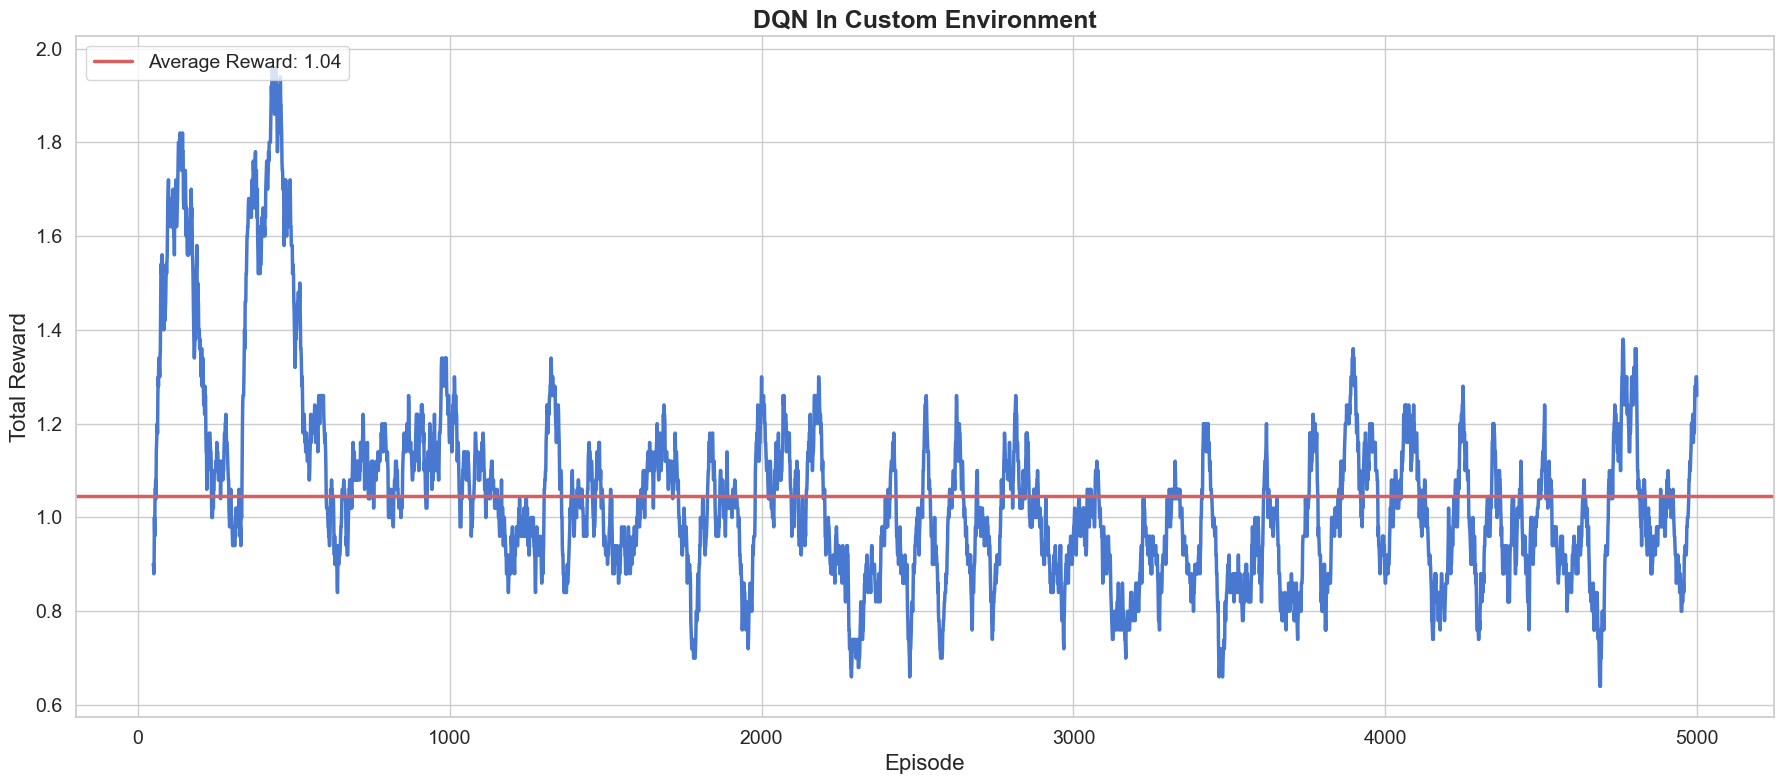

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

np.random.seed(42)  

# Convert rewards to DataFrame for rolling window calculation
df_rewards = pd.DataFrame(rewards, columns=['Reward'])

# Calculate rolling average with a window of 50 episodes
rolling_avg_reward = df_rewards['Reward'].rolling(window=50).mean()

sns.set(style="whitegrid", palette="muted", color_codes=True)
plt.figure(figsize=(18, 8))  # Set the figure size

sns.lineplot(data=rolling_avg_reward, lw=2.5, color='b')

# Title and labels
plt.title("DQN In Custom Environment", fontsize=18, fontweight='bold')
plt.xlabel("Episode", fontsize=16)
plt.ylabel("Total Reward", fontsize=16)

# Setting the size for tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

avg_reward = sum(rewards) / len(rewards)
plt.axhline(y=avg_reward, color='r', linestyle='-', linewidth=2.5, label=f'Average Reward: {avg_reward:.2f}')
plt.legend(fontsize=14, loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# Convert the environment to a vectorized environment
env = DummyVecEnv([lambda: WarehouseEnv()])

# Create the DQN agent
model = DQN("MlpPolicy", env, verbose=1)

# Train the agent
total_episodes = 5000
episode_rewards = []

for episode in range(total_episodes):
    obs = env.reset()
    episode_reward = 0

    while True:
        action, _ = model.predict(obs)
        obs, rewards, done, _ = env.step(action)
        episode_reward += rewards[0]  # Summing up the rewards

        if done[0]:
            break

    episode_rewards.append(episode_reward)
    print(f"Episode {episode + 1}/{total_episodes}, Total Reward: {episode_reward}")

# Plotting rewards
plt.plot(episode_rewards)
plt.title('Episode Rewards over Time')
plt.xlabel('Episode')
plt.ylabel('Total Reward')

# Show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming episode_rewards is a list of rewards from each episode
df_rewards = pd.DataFrame(episode_rewards, columns=['Reward'])

# Calculate rolling average with a window of 50 episodes
rolling_avg_reward = df_rewards['Reward'].rolling(window=50).mean()

sns.set(style="whitegrid", palette="muted", color_codes=True)
plt.figure(figsize=(18, 8))  # Set the figure size

sns.lineplot(data=rolling_avg_reward, lw=2.5, color='b')

# Title and labels
plt.title("DQN In Gridworld Environment", fontsize=18, fontweight='bold')
plt.xlabel("Episode", fontsize=16)
plt.ylabel("Total Reward", fontsize=16)

# Setting the size for tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

avg_reward = df_rewards['Reward'].mean()
plt.axhline(y=avg_reward, color='r', linestyle='-', linewidth=2.5, label=f'Average Reward: {avg_reward:.2f}')
plt.legend(fontsize=14, loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# Convert the environment to a vectorized environment
env = DummyVecEnv([lambda: WarehouseEnvironmentA()])

# Create the DDPG agent
model = DQN("MlpPolicy", env, verbose=1)

# Train the agent
model.learn(total_timesteps=100000)

# Test the trained agent
obs = env.reset()
for _ in range(1000):
    action, _ = model.predict(obs)
    obs, reward, done, _ = env.step(action)
    env.render()
    if done:
        break

In [ ]:
# Train the agent
total_episodes = 5000
episode_rewards = []

for episode in range(total_episodes):
    obs = env.reset()
    episode_reward = 0

    while True:
        action, _ = model.predict(obs)
        obs, reward, done, _ = env.step(action)
        episode_reward += reward

        if done:
            break

    episode_rewards.append(episode_reward)
    print(f"Episode {episode + 1}/{total_episodes}, Total Reward: {episode_reward}")

# Plotting rewards
plt.plot(episode_rewards)
plt.title('Episode Rewards over Time')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


flattened_rewards = [reward[0] for reward in episode_rewards]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

np.random.seed(42)  

# Convert rewards to DataFrame for rolling window calculation
df_rewards = pd.DataFrame(flattened_rewards, columns=['Reward'])

# Calculate rolling average with a window of 50 episodes
rolling_avg_reward = df_rewards['Reward'].rolling(window=50).mean()

sns.set(style="whitegrid", palette="muted", color_codes=True)
plt.figure(figsize=(18, 8))  # Set the figure size

sns.lineplot(data=rolling_avg_reward, lw=2.5, color='b')

# Title and labels
plt.title("DQN In 4-Rooms Environment", fontsize=18, fontweight='bold')
plt.xlabel("Episode", fontsize=16)
plt.ylabel("Total Reward", fontsize=16)

# Setting the size for tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

avg_reward = sum(flattened_rewards) / len(flattened_rewards)
plt.axhline(y=avg_reward, color='r', linestyle='-', linewidth=2.5, label=f'Average Reward: {avg_reward:.2f}')
plt.legend(fontsize=14, loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
env = DummyVecEnv([lambda: MazeEnv()])

# Create the DDPG agent
model = DQN("MlpPolicy", env, verbose=1)

# Train the agent
model.learn(total_timesteps=100000)

# Test the trained agent
obs = env.reset()
for _ in range(1000):
    action, _ = model.predict(obs)
    obs, reward, done, _ = env.step(action)
    env.render()
    if done:
        break

In [ ]:
# Train the agent
total_episodes = 5000
episode_rewards = []

for episode in range(total_episodes):
    obs = env.reset()
    episode_reward = 0

    while True:
        action, _ = model.predict(obs)
        obs, reward, done, _ = env.step(action)
        episode_reward += reward

        if done:
            break

    episode_rewards.append(episode_reward)
    print(f"Episode {episode + 1}/{total_episodes}, Total Reward: {episode_reward}")

# Plotting rewards
plt.plot(episode_rewards)
plt.title('Episode Rewards over Time')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()